# DATA 606 Capstone Project: Evaluating the Efficacy of Public Works Projects on Reducing Crime in San Francisco 
# Phase 2
### In this notebook, I will:
- Import San Francisco Neighborhood Census Dataset
    - Perform EDA to get a sense of what the Pit Stop Neighborhoods are like
- Import San Francisco Police Department Incident Report Dataset
    - Clean the dataset
        - Deal with missing values
    - Make a new dataset (called Incident Counter Dataset) that contains counts of certain incident categories that occurred in Pit Stop Neighborhoods 
- Import Incident Counter Dataset
    - Perform EDA
    - Make animated maps of where and how many incidents occur in Pit Stop Neighborhoods
- Perform Mann-Kendall and Pearson correlation coefficient tests between number of pit stops and incident categories in each Pit Stop Neighborhood

In [1]:
#import statements
import pandas as pd
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
!pip install "notebook>=5.3" "ipywidgets>=7.2"
!pip install plotly==4.10.0

import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from scipy.stats import pearsonr

You should consider upgrading via the 'c:\users\becky\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\becky\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\becky\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
pd.set_option('display.max_rows', 2000)

## San Francisco Neighborhood Census Dataset

In [3]:
#Import San Francisco Neighborhood Census dataset
#Dataset also available on Github project page
all_neighborhood_census_data = pd.read_csv(r"C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\SF Neighborhood Census.csv",
                           dtype = {'Year': str, 'Neighborhood': str, 'Total Population': int, '% Female': float,
                                   '% Male': float, 'Total Num of Households': float, '% Family Households': float,
                                   '% Households with Children': float, '% Non-Family Households': float,
                                   '% Single Person Households': float, 'Avg Household Size': float,
                                   'Avg Family Household Size': float, '% Black/African American': float, '% Asian': float,
                                   '% White': float, '% Native American Indian': float, 
                                   '% Native Hawaiian/Pacific Islander': float, '% Other/Two or More Races': float,
                                   '% Latino (of Any Race)': float, '% 0-4 years': float, '% 5-17 years': float,
                                   '% 18-34 years': float, '% 35-59 years': float, '% 60 and older': float, 
                                   'Median Age (years)': float, '% High School or Less': float,
                                   '% Some College/Associate Degree': float, '% College Degree': float, 
                                   '% Graduate/Professional Degree': float, '% Foreign Born': float, 
                                   '% English Only Spoken at Home': float, '% Spanish Only Spoken at Home': float,
                                   '% Asian/Pacific Islander Language Spoken at Home': float, 
                                   '% Other European Language Spoken at Home': float, 
                                   '% Other Languages Spoken at Home': float, 'Total Num of Housing Units': float,
                                   'Num of Units Built During 2010': float, 'Median Year Structure Built': str,
                                   '% Occupied Units': float, '% Vacant Units': float, '% Owner Occupied Units': float,
                                   '% Renter Occupied Units': float, 'Median Year Moved In to Unit (Own)': str,
                                   'Median Year Moved In to Unit (Rent)': str, '% in Same House Last Year': float,
                                   '% Single Family Housing': float, '% 2-4 Units': float, '% 5-9 Units': float,
                                   '% 10-19 Units': float, '% 20 Units or more': float, 'Median Rent ($)': float,
                                   'Median Home Value ($)': float, 'Median Rent as % of Household Income': float,
                                   'Vehicles Available': float, '% Homeowners who Own Cars': float,
                                   '% Renters who Own Cars': float, 'Num of Households With No Vehicle': float,
                                   '% Homeowning Households With No Vehicle': float, 
                                   '% Renting Households With No Vehicle': float, 'Median Household Income ($)': float,
                                   'Median Family Income ($)': float, 'Per Capita Income ($)': float, '% in Poverty': float,
                                   'Unemployment Rate (%)': float, 'Num of Employed Residents': float,
                                   '% Managerial and Professional Occupations': float, '% Service Occupations': float,
                                   '% Sales and Office Occupations': float,
                                   '% Construction and Maintenance Occupations': float,
                                   '% Production and Transportation Occupations': float,
                                   'Num of Workers 16 years and over': float, '% Workers who Drove a Car to Work': float,
                                   '% Workers Who Drove Alone': float, '% Workers Who Carpooled': float,
                                   '% Workers Who Used Transit': float, '% Workers Who Rode a Bike to Work': float,
                                   '% Workers Who Walked to Work': float, '% Workers Who Used Other Transportation': float,
                                   '% Workers Who Worked at Home': float, 'Population Density per Acre': float})

In [4]:
#Convert to a dataframe
all_neighborhood_census_df = pd.DataFrame(all_neighborhood_census_data, 
                                      columns = ['Year', 'Neighborhood', 'Total Population', '% Female', '% Male',
                                                 'Total Num of Households', '% Family Households', '% Households with Children',
                                                 '% Non-Family Households', '% Single Person Households', 'Avg Household Size',
                                                 'Avg Family Household Size', '% Black/African American', '% Asian','% White',
                                                 '% Native American Indian', '% Native Hawaiian/Pacific Islander', 
                                                 '% Other/Two or More Races', '% Latino (of Any Race)', '% 0-4 years',
                                                 '% 5-17 years', '% 18-34 years', '% 35-59 years', '% 60 and older', 
                                                 'Median Age (years)', '% High School or Less', 
                                                 '% Some College/Associate Degree', '% College Degree', 
                                                 '% Graduate/Professional Degree', '% Foreign Born', 
                                                 '% English Only Spoken at Home', '% Spanish Only Spoken at Home',
                                                 '% Asian/Pacific Islander Language Spoken at Home', 
                                                 '% Other European Language Spoken at Home', '% Other Languages Spoken at Home',
                                                 'Total Num of Housing Units', 'Num of Units Built During 2010',
                                                 'Median Year Structure Built', '% Occupied Units', '% Vacant Units',
                                                 '% Owner Occupied Units', '% Renter Occupied Units', 
                                                 'Median Year Moved In to Unit (Own)', 'Median Year Moved In to Unit (Rent)',
                                                 '% in Same House Last Year', '% Single Family Housing', '% 2-4 Units',
                                                 '% 5-9 Units', '% 10-19 Units', '% 20 Units or more', 'Median Rent ($)',
                                                 'Median Home Value ($)', 'Median Rent as % of Household Income',
                                                 'Vehicles Available', '% Homeowners who Own Cars', '% Renters who Own Cars',
                                                 'Num of Households With No Vehicle', '% Homeowning Households With No Vehicle', 
                                                 '% Renting Households With No Vehicle', 'Median Household Income ($)',
                                                 'Median Family Income ($)', 'Per Capita Income ($)', '% in Poverty',
                                                 'Unemployment Rate (%)', 'Num of Employed Residents',
                                                 '% Managerial and Professional Occupations', '% Service Occupations',
                                                 '% Sales and Office Occupations', '% Construction and Maintenance Occupations',
                                                 '% Production and Transportation Occupations', 
                                                 'Num of Workers 16 years and over', '% Workers who Drove a Car to Work',
                                                 '% Workers Who Drove Alone', '% Workers Who Carpooled', 
                                                 '% Workers Who Used Transit', '% Workers Who Rode a Bike to Work',
                                                 '% Workers Who Walked to Work', '% Workers Who Used Other Transportation',
                                                 '% Workers Who Worked at Home', 'Population Density per Acre'])

In [5]:
all_neighborhood_census_df.head()

Year                    Neighborhood  Total Population  % Female  % Male  \
0  2010                             All            805240      49.0    51.0   
1  2010           Bayview Hunters Point             35890      51.0    49.0   
2  2010             Castro/Upper Market             19790      36.0    64.0   
3  2010                      Tenderloin             44240      40.0    60.0   
4  2010  Financial District/South Beach              1780      45.0    55.0   

   Total Num of Households  % Family Households  % Households with Children  \
0                 345810.0                 44.0                        18.0   
1                  10270.0                 73.0                        43.0   
2                  10880.0                 22.0                         9.0   
3                  25000.0                 21.0                         6.0   
4                   1010.0                 29.0                         7.0   

   % Non-Family Households  % Single Person Households  \
0                     54.0                        39.0   
1                     27.0                        23.0   
2                     79.0                        48.0   
3                     74.0                        64.0   
4                     73.0                        60.0   

              ...               Num of Workers 16 years and over  \
0             ...                                       433670.0   
1             ...                                        13980.0   
2             ...                                        13620.0   
3             ...                                        17700.0   
4             ...                                          680.0   

   % Workers who Drove a Car to Work  % Workers Who Drove Alone  \
0                               46.0                       38.0   
1                               63.0                       52.0   
2                               39.0                       34.0   
3                               13.0                       12.0   
4                               16.0                       13.0   

   % Workers Who Carpooled  % Workers Who Used Transit  \
0                      8.0                        33.0   
1                     11.0                        29.0   
2                      6.0                        40.0   
3                      1.0                        45.0   
4                      4.0                        20.0   

   % Workers Who Rode a Bike to Work  % Workers Who Walked to Work  \
0                                3.0                          10.0   
1                                0.0                           4.0   
2                                4.0                           8.0   
3                                4.0                          27.0   
4                                1.0                          60.0   

   % Workers Who Used Other Transportation  % Workers Who Worked at Home  \
0                                      2.0                           7.0   
1                                      2.0                           2.0   
2                                      2.0                           7.0   
3                                      1.0                           9.0   
4                                      0.0                           3.0   

   Population Density per Acre  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 80 columns]

In [6]:
#Make a new dataframe that doesn't include All or Inner Sunset as a neighborhood
neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Neighborhood'] != 'All']

In [7]:
neighborhood_census_df = neighborhood_census_df[neighborhood_census_df['Neighborhood'] != 'Inner Sunset']

In [8]:
neighborhood_census_df.head()

Year                    Neighborhood  Total Population  % Female  % Male  \
1  2010           Bayview Hunters Point             35890      51.0    49.0   
2  2010             Castro/Upper Market             19790      36.0    64.0   
3  2010                      Tenderloin             44240      40.0    60.0   
4  2010  Financial District/South Beach              1780      45.0    55.0   
5  2010                  Haight Ashbury             21800      49.0    51.0   

   Total Num of Households  % Family Households  % Households with Children  \
1                  10270.0                 73.0                        43.0   
2                  10880.0                 22.0                         9.0   
3                  25000.0                 21.0                         6.0   
4                   1010.0                 29.0                         7.0   
5                  10520.0                 31.0                        13.0   

   % Non-Family Households  % Single Person Households  \
1                     27.0                        23.0   
2                     79.0                        48.0   
3                     74.0                        64.0   
4                     73.0                        60.0   
5                     68.0                        41.0   

              ...               Num of Workers 16 years and over  \
1             ...                                        13980.0   
2             ...                                        13620.0   
3             ...                                        17700.0   
4             ...                                          680.0   
5             ...                                        15260.0   

   % Workers who Drove a Car to Work  % Workers Who Drove Alone  \
1                               63.0                       52.0   
2                               39.0                       34.0   
3                               13.0                       12.0   
4                               16.0                       13.0   
5                               32.0                       27.0   

   % Workers Who Carpooled  % Workers Who Used Transit  \
1                     11.0                        29.0   
2                      6.0                        40.0   
3                      1.0                        45.0   
4                      4.0                        20.0   
5                      5.0                        42.0   

   % Workers Who Rode a Bike to Work  % Workers Who Walked to Work  \
1                                0.0                           4.0   
2                                4.0                           8.0   
3                                4.0                          27.0   
4                                1.0                          60.0   
5                                7.0                           8.0   

   % Workers Who Used Other Transportation  % Workers Who Worked at Home  \
1                                      2.0                           2.0   
2                                      2.0                           7.0   
3                                      1.0                           9.0   
4                                      0.0                           3.0   
5                                      3.0                           8.0   

   Population Density per Acre  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
5                          NaN  

[5 rows x 80 columns]

In [9]:
neighborhood_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 60
Data columns (total 80 columns):
Year                                                49 non-null object
Neighborhood                                        49 non-null object
Total Population                                    49 non-null int32
% Female                                            49 non-null float64
% Male                                              49 non-null float64
Total Num of Households                             49 non-null float64
% Family Households                                 49 non-null float64
% Households with Children                          49 non-null float64
% Non-Family Households                             49 non-null float64
% Single Person Households                          49 non-null float64
Avg Household Size                                  49 non-null float64
Avg Family Household Size                           46 non-null float64
% Black/African American             

In [10]:
#Remove Inner Sunset from dataset
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Neighborhood'] != 'Inner Sunset']

In [11]:
#Remove years that only include data for "All" neighborhood
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2012']
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2013']
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2017']
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2018']
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2019']
all_neighborhood_census_df = all_neighborhood_census_df[all_neighborhood_census_df['Year'] != '2020']

In [12]:
all_neighborhood_census_df

Year                    Neighborhood  Total Population  % Female  % Male  \
0   2010                             All            805240      49.0    51.0   
1   2010           Bayview Hunters Point             35890      51.0    49.0   
2   2010             Castro/Upper Market             19790      36.0    64.0   
3   2010                      Tenderloin             44240      40.0    60.0   
4   2010  Financial District/South Beach              1780      45.0    55.0   
5   2010                  Haight Ashbury             21800      49.0    51.0   
7   2010                         Mission             57300      45.0    55.0   
8   2010                     North Beach             14860      49.0    51.0   
9   2010                 Sunset/Parkside             25920      52.0    48.0   
10  2010                 South of Market             31370      41.0    59.0   
11  2011                             All            812826      49.0    51.0   
12  2011           Bayview Hunters Point             35890      51.0    49.0   
13  2011             Castro/Upper Market             19790      36.0    64.0   
14  2011                      Tenderloin             44240      40.0    60.0   
15  2011  Financial District/South Beach              1780      45.0    55.0   
16  2011                Golden Gate Park               170      33.0    67.0   
17  2011                  Haight Ashbury             21800      49.0    51.0   
19  2011                         Mission             57300      45.0    55.0   
20  2011                     North Beach             14860      49.0    51.0   
21  2011                 Sunset/Parkside             25920      52.0    48.0   
22  2011                 South of Market             31370      41.0    59.0   
25  2014                             All            829070      49.0    51.0   
26  2014           Bayview Hunters Point             37540      50.0    50.0   
27  2014             Castro/Upper Market             20260      36.0    64.0   
28  2014  Financial District/South Beach             16540      46.0    54.0   
29  2014                Golden Gate Park                50      40.0    60.0   
30  2014                  Haight Ashbury             17920      45.0    55.0   
32  2014                         Mission             56480      45.0    55.0   
33  2014                     North Beach             12760      46.0    54.0   
34  2014                 South of Market             17830      45.0    55.0   
35  2014                 Sunset/Parkside             79790      52.0    48.0   
36  2014                      Tenderloin             27640      40.0    60.0   
37  2015                             All            840770      49.0    51.0   
38  2015           Bayview Hunters Point             37250      51.0    49.0   
39  2015             Castro/Upper Market             20380      37.0    63.0   
40  2015  Financial District/South Beach             16740      47.0    53.0   
41  2015                Golden Gate Park                80      42.0    58.0   
42  2015                  Haight Ashbury             17460      46.0    54.0   
44  2015                         Mission             57880      44.0    56.0   
45  2015                     North Beach             12550      46.0    54.0   
46  2015                 South of Market             18100      44.0    56.0   
47  2015                 Sunset/Parkside             80530      52.0    48.0   
48  2015                      Tenderloin             28820      39.0    61.0   
49  2016                             All            841820      49.0    51.0   
50  2016           Bayview Hunters Point             37600      51.0    49.0   
51  2016             Castro/Upper Market             21090      37.0    63.0   
52  2016  Financial District/South Beach             17460      47.0    53.0   
53  2016                Golden Gate Park                90      35.0    65.0   
54  2016                  Haight Ashbury             18050      47.0    53.0   
56  

### EDA

Text(0.5,1,'Total Population in Each Neighborhood Over Time')

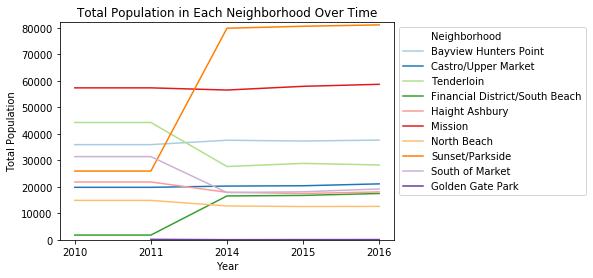

In [13]:
#Plot Total Population in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_pop_plot = sns.lineplot(data = neighborhood_census_df, x = 'Year', y = 'Total Population',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_pop_plot.set_ylim(0, 82000)
all_nb_pop_plot.set_title("Total Population in Each Neighborhood Over Time")

The big increase in Sunset/Parkside's population is because the two neighborhoods used to be separate neighborhoods. The data from 2010 up until 2014 only included Parkside. The data from 2014 on includes Outer Sunset also. 

Text(0.5,1,'% Female in Each Neighborhood Over Time')

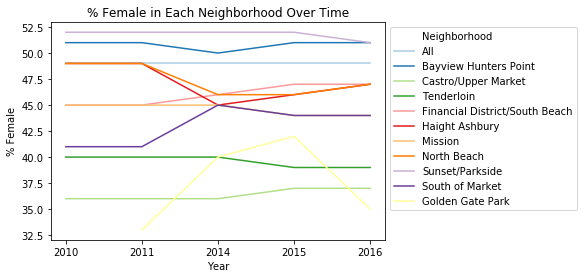

In [756]:
#Plot % Female in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_female_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Female',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_female_plot.set_title("% Female in Each Neighborhood Over Time")

Text(0.5,1,'Total Num of Households in Each Neighborhood Over Time')

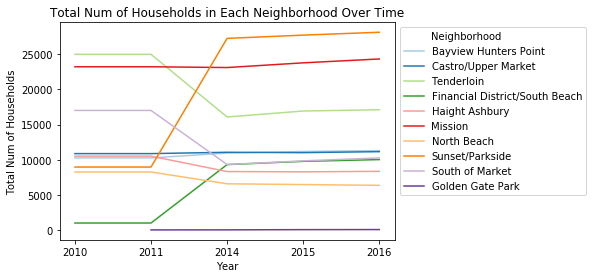

In [758]:
#Plot Total Number of Households in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_house_plot = sns.lineplot(data = neighborhood_census_df, x = 'Year', y = 'Total Num of Households',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_house_plot.set_title("Total Num of Households in Each Neighborhood Over Time")

Text(0.5,1,'% of Family Households in Each Neighborhood Over Time')

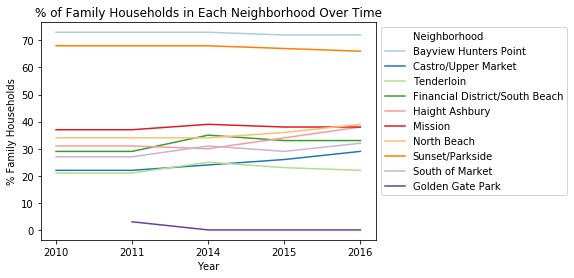

In [759]:
#Plot % Family Households in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_famhouse_plot = sns.lineplot(data = neighborhood_census_df, x = 'Year', y = '% Family Households',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_famhouse_plot.set_title("% of Family Households in Each Neighborhood Over Time")

Text(0.5,1,'% Black/African American in Each Neighborhood Over Time')

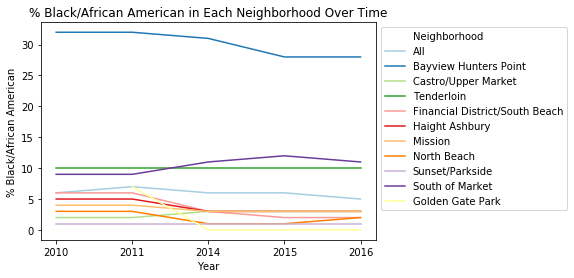

In [760]:
#Plot % Black/African American in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_black_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Black/African American',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_black_plot.set_title("% Black/African American in Each Neighborhood Over Time")

Text(0.5,1,'% Asian in Each Neighborhood Over Time')

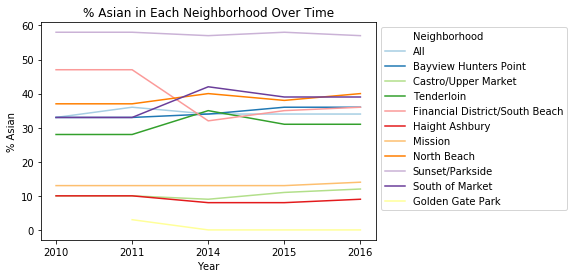

In [761]:
#Plot % Asian in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_asian_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Asian',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_asian_plot.set_title("% Asian in Each Neighborhood Over Time")

Text(0.5,1,'% White in Each Neighborhood Over Time')

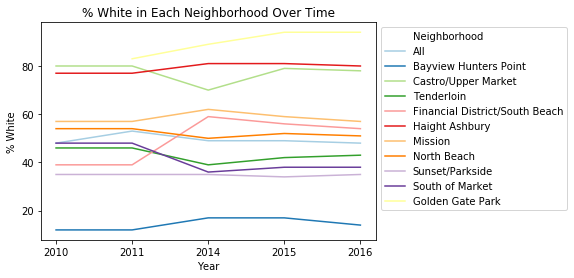

In [762]:
#Plot % White in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_white_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% White',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_white_plot.set_title("% White in Each Neighborhood Over Time")

Text(0.5,1,'% Latino (of any race) in Each Neighborhood Over Time')

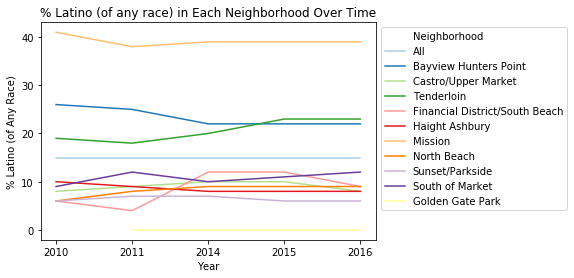

In [763]:
#Plot % Latino (of any race) in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_latino_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Latino (of Any Race)',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_latino_plot.set_title("% Latino (of any race) in Each Neighborhood Over Time")

Text(0.5,1,'Median Age (years) in Each Neighborhood Over Time')

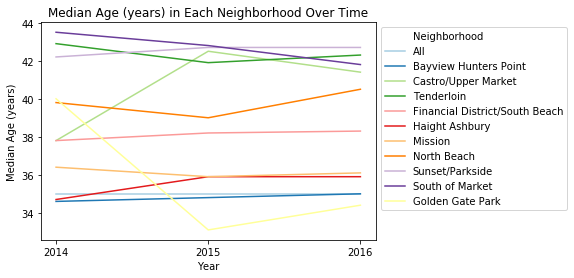

In [764]:
#Plot Median Age in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_medage_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Median Age (years)',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_medage_plot.set_title("Median Age (years) in Each Neighborhood Over Time")

In [782]:
#Put years into the order that I want because the following graphs were plotting the years out of order
#code adapted from: https://stackoverflow.com/questions/15541440/how-to-apply-custom-column-order-on-categorical-to-pandas-boxplot
years = ['2010', '2011', '2014', '2015', '2016']
Years = pd.api.types.CategoricalDtype(ordered= True, categories=years)
all_neighborhood_census_df['Year'] = all_neighborhood_census_df['Year'].astype(Years)

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% High School or Less in Each Neighborhood Over Time')

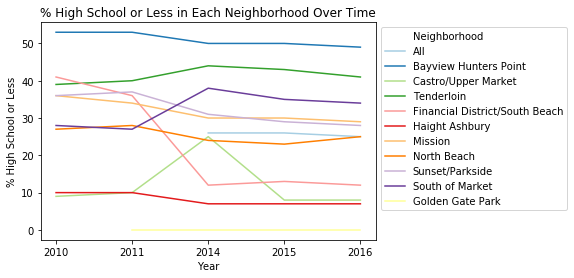

In [783]:
#Plot % of residents > 25yo who have received a high school degree or less in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_hs_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% High School or Less',
                              hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_hs_plot.set_title("% High School or Less in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% Some College/Associate Degree in Each Neighborhood Over Time')

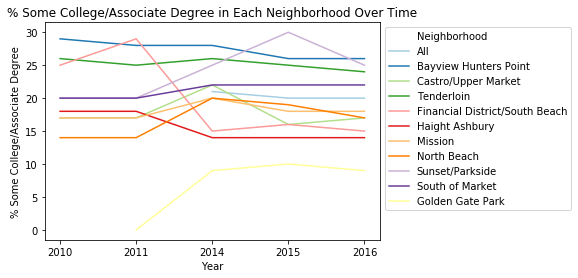

In [784]:
#Plot % of residents > 25yo who have received some college/associate degree in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_scol_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Some College/Associate Degree',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_scol_plot.set_title("% Some College/Associate Degree in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% College Degree in Each Neighborhood Over Time')

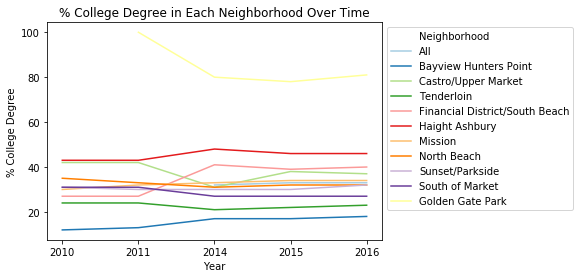

In [785]:
#Plot % of residents > 25yo who have received a college degree in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_college_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% College Degree',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_college_plot.set_title("% College Degree in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% Graduate/Professional Degree in Each Neighborhood Over Time')

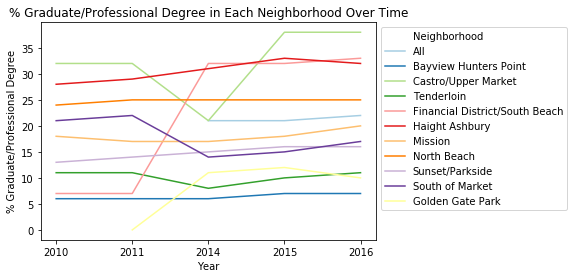

In [786]:
#Plot % of residents > 25yo who have received a graduate/professional degree in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_grad_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Graduate/Professional Degree',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_grad_plot.set_title("% Graduate/Professional Degree in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% Occupied Housing Units in Each Neighborhood Over Time')

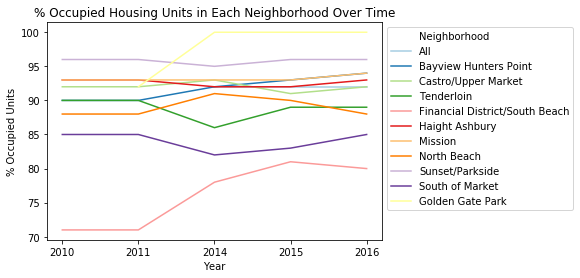

In [787]:
#Plot % of occupied housing units in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Occupied Units',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_occ_plot.set_title("% Occupied Housing Units in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% Owner Occupied Housing Units in Each Neighborhood Over Time')

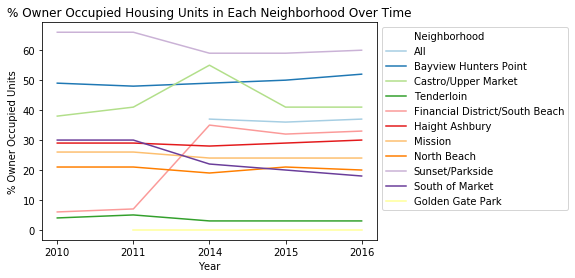

In [788]:
#Plot % owner occupied housing units in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_oocc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Owner Occupied Units',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_oocc_plot.set_title("% Owner Occupied Housing Units in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% Renter Occupied Housing Units in Each Neighborhood Over Time')

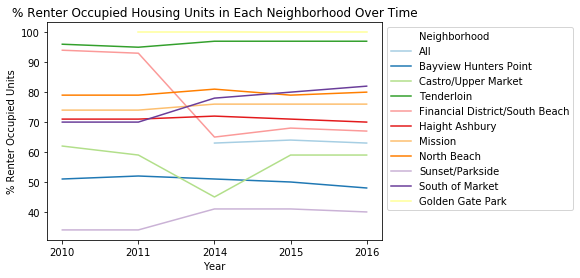

In [789]:
#Plot % renter occupied housing units in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_rocc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Renter Occupied Units',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_rocc_plot.set_title("% Renter Occupied Housing Units in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Median Rent ($) in Each Neighborhood Over Time')

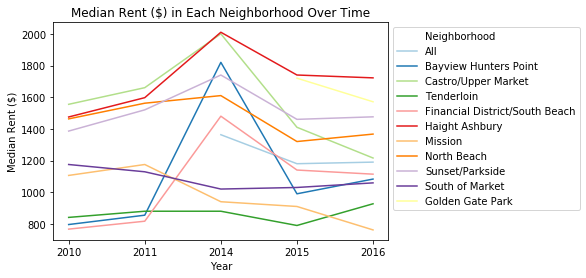

In [790]:
#Plot median rent in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_medrent_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Median Rent ($)',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_medrent_plot.set_title("Median Rent ($) in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Median Home Value ($) in Each Neighborhood Over Time')

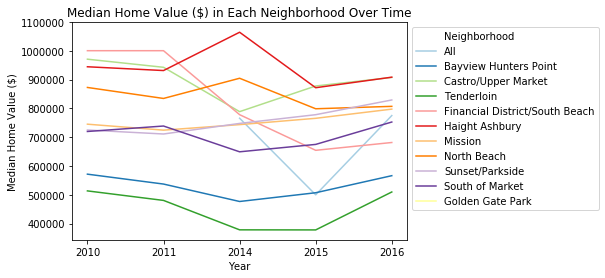

In [791]:
#Plot median home value in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_homeval_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Median Home Value ($)',
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_homeval_plot.set_title("Median Home Value ($) in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Median Rent as % of Household Income in Each Neighborhood Over Time')

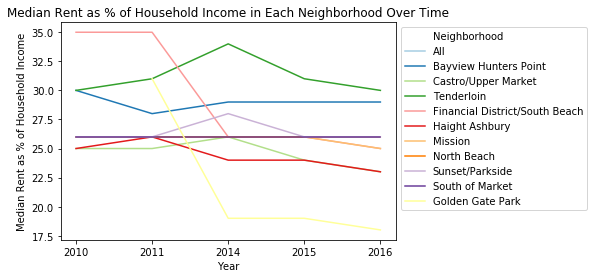

In [792]:
#Plot median rent as % of household income in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_medrent_houseinc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', 
                                            y = 'Median Rent as % of Household Income', hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_medrent_houseinc_plot.set_title("Median Rent as % of Household Income in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Median Household Income ($) in Each Neighborhood Over Time')

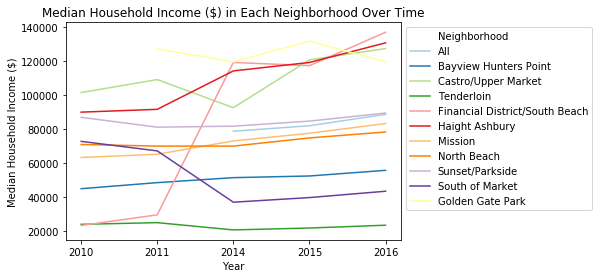

In [793]:
#Plot median household income in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_medhouseinc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Median Household Income ($)', 
                                       hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_medhouseinc_plot.set_title("Median Household Income ($) in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Median Family Income ($) in Each Neighborhood Over Time')

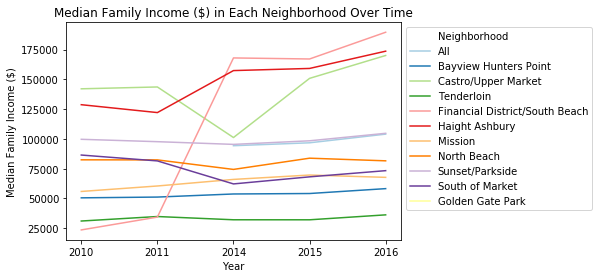

In [794]:
#Plot median family income in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_medfaminc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Median Family Income ($)', 
                                       hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_medfaminc_plot.set_title("Median Family Income ($) in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Per Capita Income ($) in Each Neighborhood Over Time')

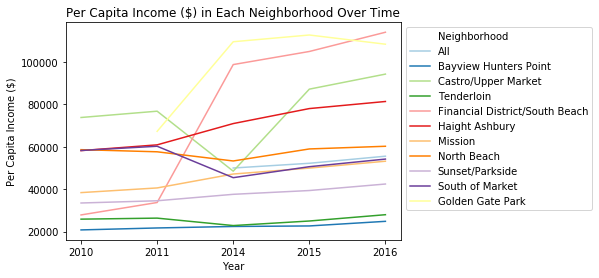

In [795]:
#Plot per capita income in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_percapinc_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Per Capita Income ($)', 
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_percapinc_plot.set_title("Per Capita Income ($) in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% in Poverty in Each Neighborhood Over Time')

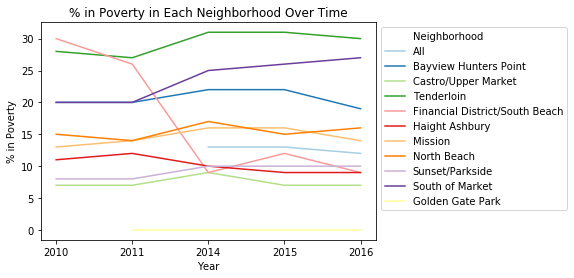

In [796]:
#Plot % in poverty in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_poverty_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% in Poverty', 
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_poverty_plot.set_title("% in Poverty in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Unemployment Rate (%) in Each Neighborhood Over Time')

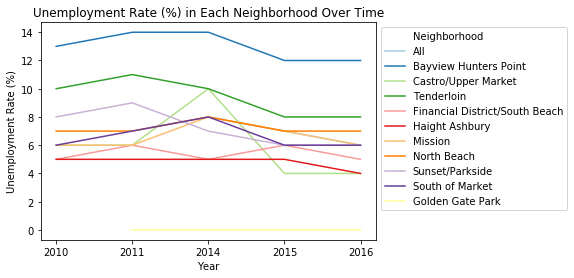

In [797]:
#Plot unemployment rate in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_unemp_rate_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Unemployment Rate (%)', 
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_unemp_rate_plot.set_title("Unemployment Rate (%) in Each Neighborhood Over Time")

Text(0.5,1,'Num of Employed Residents in Each Neighborhood Over Time')

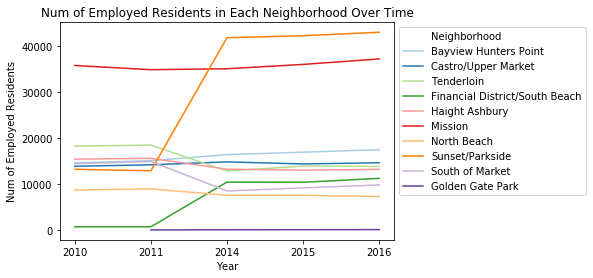

In [654]:
#Plot number of employed residents in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_emp_res_plot = sns.lineplot(data = neighborhood_census_df, x = 'Year', y = 'Num of Employed Residents', 
                                   hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_emp_res_plot.set_title("Num of Employed Residents in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% of Residents with Managerial and Professional Occupations in Each Neighborhood Over Time')

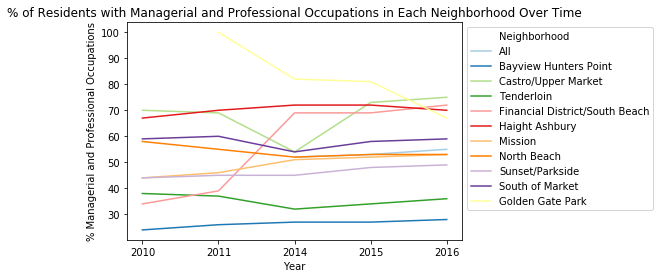

In [798]:
#Plot % of residents with managerial and professional occupations in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_prof_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', 
                                    y = '% Managerial and Professional Occupations', hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_prof_occ_plot.set_title("% of Residents with Managerial and Professional Occupations in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% of Residents with Service Occupations in Each Neighborhood Over Time')

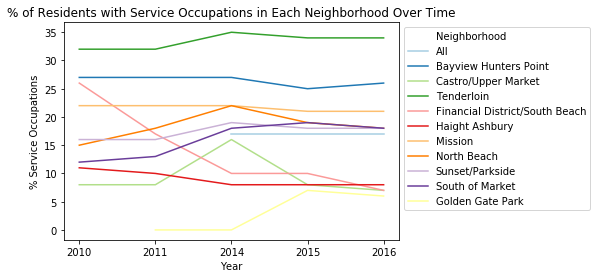

In [799]:
#Plot % of residents with service occupations in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_service_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Service Occupations', 
                                    hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_service_occ_plot.set_title("% of Residents with Service Occupations in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% of Residents with Sales and Office Occupations in Each Neighborhood Over Time')

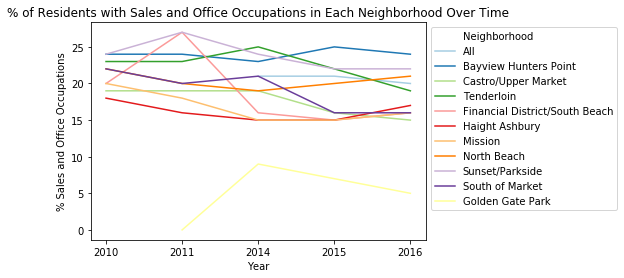

In [800]:
#Plot % of residents with sales and office occupations in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_sales_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = '% Sales and Office Occupations', 
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_sales_occ_plot.set_title("% of Residents with Sales and Office Occupations in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% of Residents with Construction and Maintenance Occupations in Each Neighborhood Over Time')

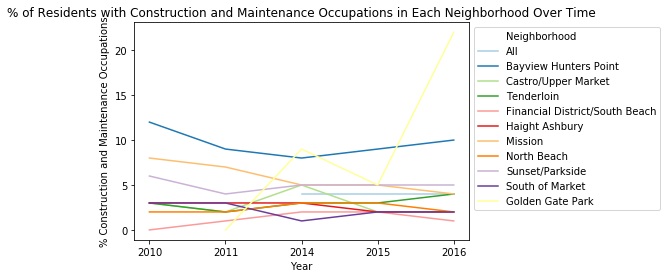

In [801]:
#Plot % of residents with construction and maintenance occupations in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_maint_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', 
                                     y = '% Construction and Maintenance Occupations', hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_maint_occ_plot.set_title("% of Residents with Construction and Maintenance Occupations in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'% of Residents with Production and Transportation Occupations in Each Neighborhood Over Time')

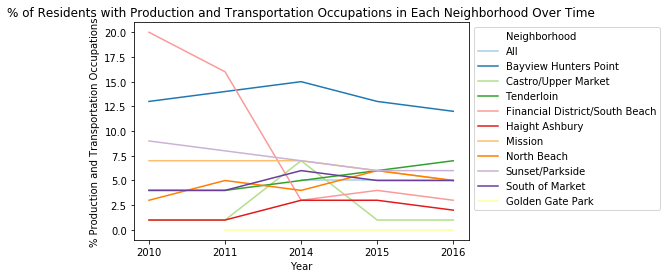

In [802]:
#Plot % of residents with production and transportation occupations in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_prod_occ_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', 
                                     y = '% Production and Transportation Occupations', hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_prod_occ_plot.set_title("% of Residents with Production and Transportation Occupations in Each Neighborhood Over Time")

C:\Users\Becky\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning:

Mean of empty slice.

C:\Users\Becky\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Becky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Population Density per Acre in Each Neighborhood Over Time')

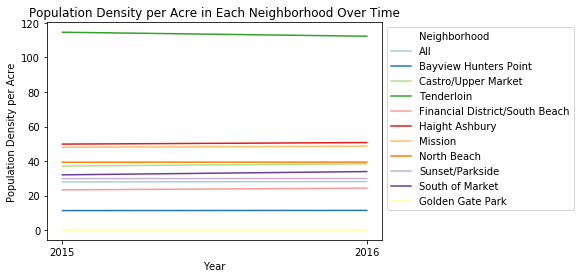

In [803]:
#Plot population density per acre in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 11)
all_nb_pop_dense_plot = sns.lineplot(data = all_neighborhood_census_df, x = 'Year', y = 'Population Density per Acre', 
                                     hue = 'Neighborhood', palette = palette)
plt.legend(bbox_to_anchor=(1, 1))
all_nb_pop_dense_plot.set_title("Population Density per Acre in Each Neighborhood Over Time")

# Police Department Incident Report Dataset
## Cleaning

In [3]:
#Import Combined PD Incidents 2003-Present data set
#data set also available on my Github project page
incident_data = pd.read_csv(r"C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\Combined PD Incidents 2003-Present.csv",
                           dtype = {'Address': str, "Analysis Neighborhood": str, 'Analysis Neighborhoods': str,
                                   'Areas of Vulnerability, 2016': str, 'Current Police Districts': float, 
                                   'Current Supervisor Districts': float, 'Incident Category': str, 'Incident Code': int,
                                   'Incident Date': str, 'Incident Day of Week': str, 'Incident Description': str,
                                   'Incident Number': int, 'Incident Time': str, 'Incident Year': int,
                                   'Latitude': float, 'Longitude': float, 'Police District': str, 'Resolution': str,
                                   'SF Find Neighborhoods': float})

In [4]:
#Convert to a dataframe
incident_df = pd.DataFrame(incident_data, columns = ['Address', 'Analysis Neighborhood', 'Analysis Neighborhoods',
                                   'Areas of Vulnerability, 2016', 'Current Police Districts', 'Current Supervisor Districts',
                                   'Incident Category', 'Incident Code', 'Incident Date', 'Incident Day of Week',
                                   'Incident Description', 'Incident Number', 'Incident Time', 'Incident Year', 'Latitude', 
                                   'Longitude', 'Police District', 'Resolution', 'SF Find Neighborhoods'])

In [5]:
incident_df.head()

Address Analysis Neighborhood Analysis Neighborhoods  \
0      3400 Block of PIERCE ST                   NaN                   13.0   
1  0 Block of UNITEDNATIONS PZ                   NaN                   36.0   
2    1500 Block of KIRKWOOD AV                   NaN                    1.0   
3     900 Block of COLUMBUS AV                   NaN                   32.0   
4   1500 Block of BAY SHORE BL                   NaN                    1.0   

  Areas of Vulnerability, 2016  Current Police Districts  \
0                          1.0                       4.0   
1                          2.0                       5.0   
2                          2.0                       2.0   
3                          1.0                       6.0   
4                          2.0                       2.0   

   Current Supervisor Districts    Incident Category  Incident Code  \
0                           6.0             WARRANTS          63010   
1                          10.0        DRUG/NARCOTIC          16010   
2                           9.0  MOTOR VEHICLE THEFT           7055   
3                           3.0         NON-CRIMINAL          64020   
4                           9.0  MOTOR VEHICLE THEFT           7024   

  Incident Date Incident Day of Week                   Incident Description  \
0      7/1/2011               Friday                         WARRANT ARREST   
1    10/18/2005              Tuesday                POSSESSION OF MARIJUANA   
2     1/29/2005             Saturday  RECOVERED VEHICLE - STOLEN OUTSIDE SF   
3      6/2/2011             Thursday           AIDED CASE, MENTAL DISTURBED   
4      2/1/2003             Saturday                         STOLEN TRAILER   

   Incident Number Incident Time  Incident Year   Latitude   Longitude  \
0        110879414          8:00           2011  37.802151 -122.439758   
1         51177703         14:30           2005  37.779944 -122.414318   
2         50112097         13:45           2005  37.737576 -122.388799   
3        110444681          2:52           2011  37.803109 -122.414354   
4         30383111          8:00           2003  37.724556 -122.401097   

  Police District         Resolution  SF Find Neighborhoods  
0        NORTHERN     ARREST, BOOKED                   17.0  
1      TENDERLOIN     ARREST, BOOKED                   21.0  
2         BAYVIEW               NONE                   86.0  
3         CENTRAL  PSYCHOPATHIC CASE                  107.0  
4         BAYVIEW               NONE                   86.0

In [6]:
incident_df.shape

(1425558, 19)

In [7]:
#Convert data type of Incident Date and Incident Time column values from string to datetime64
incident_df['Incident Date'] = pd.to_datetime(incident_df['Incident Date'], format = '%m/%d/%Y')
incident_df['Incident Time'] = pd.to_datetime(incident_df['Incident Time'], format = '%H:%M')

I will be putting the incident categories into four categories so that I can visualize which neighborhoods have higher prevalences of more serious crimes, and so that the machine learning algorithm will have an easier time with the classification problem. The four categories will be Part I Crimes (represented by 0), Part II crimes (represented by 1), Missing Persons or Property (represented by 2), and Other (represented by 3).

Part I Crimes, as defined by the FBI for Uniform Crime Reporting (UCR), include the following crimes, chosen because they are serious crimes, occur with regularity in all parts of the country, and are likely to be reported by police:
- criminal homicide
- forcible rape
- robbery
- aggravated assault
- burglary (breaking or entering)
- larceny-theft
- motor vehicle theft
- arson

Part II Crimes, as defined by the FBI for UCR, include:
- forgery and counterfeiting
- fraud
- embezzlement
- stolen property: buying, receiving, possessing
- vandalism
- weapons: carrying, possessing, etc.
- prostitution and commercialized vice
- sex offenses (except forcible rape)
- drug abuse violations
- gambling
- offenses against the family and children
- driving under the influence
- liquor laws
- drunkenness
- disorderly conduct
- vagrancy
- suspicion
- curfew and loitering laws (persons under age 18)
- runaways (persons under age 18)

Missing persons or property will include categories such as missing person, lost property, recovered vehicle, vehicle impounded, and vehicle misplaced. 

Other will include all other incidents and crimes that do not fall into Part I Crimes, Part II Crimes, or Missing Persons or Property categories.

Reference:
U.S. Department of Justice - Federal Bureau of Investigation, "Uniform crime report: Crime in the United States, 2011: Offense definitions." [Online]. Available: https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/11offensedefinitions_final.pdf

In [8]:
incident_df['Incident Category'].describe()

count           1425326
unique               56
top       LARCENY/THEFT
freq             344468
Name: Incident Category, dtype: object

In [10]:
incident_df['Incident Category'].value_counts()

LARCENY/THEFT                                   344468
OTHER OFFENSES                                  153386
NON-CRIMINAL                                    140306
ASSAULT                                         115439
MOTOR VEHICLE THEFT                              77061
DRUG/NARCOTIC                                    65421
BURGLARY                                         63301
WARRANTS                                         62027
VANDALISM                                        54917
SUSPICIOUS OCC                                   45863
ROBBERY                                          35502
FRAUD                                            31758
MISSING PERSON                                   30886
OTHER MISCELLANEOUS                              28446
MALICIOUS MISCHIEF                               23907
RECOVERED VEHICLE                                16409
WEAPONS OFFENSE                                  14415
LOST PROPERTY                                    12996
FORGERY/CO

In [11]:
#define a function that will place each Incident Category into a severity category
def severity_category(row):
    if ('LARCENY/THEFT' in row or 'ASSAULT' in row or'BURGLARY' in row or 'ROBBERY' in row or 
        'SECONDARY CODES' in row or 'SEX OFFENSES, FORCIBLE' in row or 'ARSON' in row or 
        'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS' in row or 'HOMICIDE' in row or 
        'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE' in row or 'MOTOR VEHICLE THEFT' in row or 
        'RAPE' in row):
        return '0'
    elif ('DRUG/NARCOTIC' in row or 'VANDALISM' in row or 'SUSPICIOUS OCC' in row or 
          'FRAUD' in row or 'MALICIOUS MISCHIEF' in row or 'WEAPONS OFFENSE' in row or 
          'FORGERY/COUNTERFEITING' in row or 'DISORDERLY CONDUCT' in row or 'TRESPASS' in row or
          'PROSTITUTION' in row or 'OFFENCES AGAINST THE FAMILY AND CHILDREN' in row or 
          'STOLEN PROPERTY' in row or 'DRUNKENNESS' in row or 'TRAFFIC VIOLATION ARREST' in row or 
          'DRIVING UNDER THE INFLUENCE' in row or 'KIDNAPPING' in row or 'EMBEZZLEMENT' in row or 
          'LIQUOR LAWS' in row or 'SEX OFFENSE' in row or 'LOITERING' in row or 
          'BAD CHECKS' in row or 'BRIBERY' in row or 'EXTORTION' in row or 
          'SEX OFFENSES, NON FORCIBLE' in row or 'GAMBLING' in row or 'SUSPICIOUS' in row or 
          'PORNOGRAPHY/OBSCENE MAT' in row or 'TREA' in row):
        return '1'
    elif ('MISSING PERSON' in row or 'RECOVERED VEHICLE' in row or 'LOST PROPERTY' in row or 
              'VEHICLE IMPOUNDED' in row or 'VEHICLE MISPLACED' in row):
        return '2'
    elif ('OTHER OFFENSES' in row or 'NON-CRIMINAL' in row or 'WARRANTS' in row or 
              'OTHER MISCELLANEOUS' in row or 'MISCELLANEOUS INVESTIGATION' in row or 
              'CASE CLOSURE' in row or 'COURTESY REPORT' in row or 'CIVIL SIDEWALKS' in row or
              'SUICIDE' in row or 'TRAFFIC COLLISION' in row or 'FIRE REPORT' in row or 'nan' in row):
        return '3'

In [12]:
#Change datatype of values in Incident Category column
incident_df['Incident Category'] = incident_df['Incident Category'].astype(str)

In [13]:
#Apply severity_category function to Incident Category column and add a new column called Incident Severity Category to data frame
incident_df['Incident Severity Category'] = incident_df['Incident Category'].apply(severity_category)

In [14]:
#See how many incident categories fall into each severity category
incident_df['Incident Severity Category'].value_counts()

0    655170
3    393510
1    316150
2     60728
Name: Incident Severity Category, dtype: int64

Text(0.5,1,'Number of Incidents in Each Severity Category')

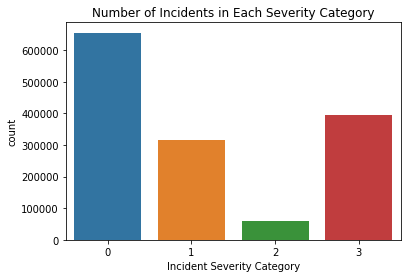

In [15]:
#Graph Incident Severity Category column
severity_category_plot = sns.countplot(x = incident_df['Incident Severity Category'], order = ['0', '1', '2', '3'])
severity_category_plot.set_title('Number of Incidents in Each Severity Category')

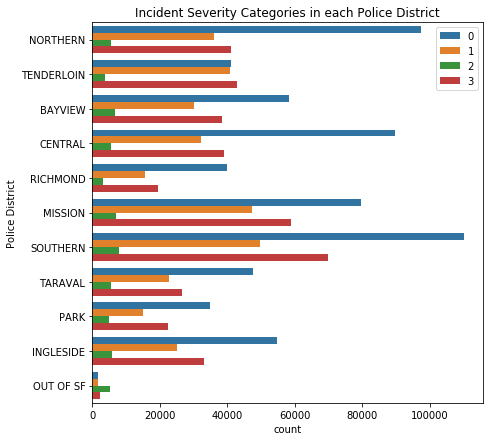

In [16]:
#Graph the number of each incident severity category that occur in each Police District
fig = plt.figure(figsize=(7,7))
severity_pd_plot = sns.countplot(y = incident_df['Police District'], hue = incident_df['Incident Severity Category'])
severity_pd_plot.set_title('Incident Severity Categories in each Police District')
plt.legend(labels = ['0', '1', '2', '3'])

# Dealing with Missing Values

In [18]:
#Check to see which columns have missing values
incident_df.isnull().sum()

Address                          384033
Analysis Neighborhood           1061503
Analysis Neighborhoods            20545
Areas of Vulnerability, 2016      20545
Current Police Districts          20930
Current Supervisor Districts      20281
Incident Category                     0
Incident Code                         0
Incident Date                         0
Incident Day of Week                  0
Incident Description                  0
Incident Number                       0
Incident Time                         0
Incident Year                         0
Latitude                          19905
Longitude                         19905
Police District                       0
Resolution                            0
SF Find Neighborhoods             30629
Incident Severity Category            0
dtype: int64

PD Incident Report 2003-2018 has a column called Analysis Neighborhoods, which contains a number that corresponds to a specific neighborhood. PD Incident Report 2018-Present has a column called Analysis Neighborhood, which contains the name of the neighborhood where the incident occurred.
I will use the number in the Analysis Neighborhoods column to put the name of the neighborhood in the Analysis Neighborhood column.

In [19]:
#Define a function that will take the number in Analysis Neighborhoods column and return the neighborhood name
def neighborhood_name(row):
    if (row == '1.0' or row == '1.0 ' or row == ' 1.0' or row == ' 1.0 '): return 'Bayview Hunters Point'
    elif (row == '2.0' or row == '2.0 ' or row == ' 2.0' or row == ' 2.0 '): return 'Bernal Heights'
    elif (row == '3.0' or row == '3.0 ' or row == ' 3.0' or row == ' 3.0 '): return 'Haight Ashbury'
    elif (row == '4.0' or row == '4.0 ' or row == ' 4.0' or row == ' 4.0 '): return 'Mission Bay'
    elif (row == '5.0' or row == '5.0 ' or row == ' 5.0' or row == ' 5.0 '): return 'Castro/Upper Market'
    elif (row == '6.0' or row == '6.0 ' or row == ' 6.0' or row == ' 6.0 '): return 'Chinatown'
    elif (row == '7.0' or row == '7.0 ' or row == ' 7.0' or row == ' 7.0 '): return 'Excelsior'
    elif (row == '8.0' or row == '8.0 ' or row == ' 8.0' or row == ' 8.0 '): return 'Financial District/South Beach'
    elif (row == '9.0' or row == '9.0 ' or row == ' 9.0' or row == ' 9.0 '): return 'Hayes Valley'
    elif (row == '10.0' or row == '10.0 ' or row == ' 10.0' or row == ' 10.0 '): return 'Glen Park'
    elif (row == '11.0' or row == '11.0 ' or row == ' 11.0' or row == ' 11.0 '): return 'Inner Richmond'
    elif (row == '12.0' or row == '12.0 ' or row == ' 12.0' or row == ' 12.0 '): return 'Golden Gate Park'
    elif (row == '13.0' or row == '13.0 ' or row == ' 13.0' or row == ' 13.0 '): return 'Marina'
    elif (row == '14.0' or row == '14.0 ' or row == ' 14.0' or row == ' 14.0 '): return 'Inner Sunset'
    elif (row == '15.0' or row == '15.0 ' or row == ' 15.0' or row == ' 15.0 '): return 'Japantown'
    elif (row == '16.0' or row == '16.0 ' or row == ' 16.0' or row == ' 16.0 '): return 'Lakeshore'
    elif (row == '17.0' or row == '17.0 ' or row == ' 17.0' or row == ' 17.0 '): return 'Lincoln Park'
    elif (row == '18.0' or row == '18.0 ' or row == ' 18.0' or row == ' 18.0 '): return 'Lone Mountain/USF'
    elif (row == '19.0' or row == '19.0 ' or row == ' 19.0' or row == ' 19.0 '): return 'McLaren Park'
    elif (row == '20.0' or row == '20.0 ' or row == ' 20.0' or row == ' 20.0 '): return 'Mission'
    elif (row == '21.0' or row == '21.0 ' or row == ' 21.0' or row == ' 21.0 '): return 'Nob Hill'
    elif (row == '22.0' or row == '22.0 ' or row == ' 22.0' or row == ' 22.0 '): return 'Noe Valley'
    elif (row == '23.0' or row == '23.0 ' or row == ' 23.0' or row == ' 23.0 '): return 'North Beach'
    elif (row == '24.0' or row == '24.0 ' or row == ' 24.0' or row == ' 24.0 '): return 'Oceanview/Merced/Ingleside'
    elif (row == '25.0' or row == '25.0 ' or row == ' 25.0' or row == ' 25.0 '): return 'Portola'
    elif (row == '26.0' or row == '26.0 ' or row == ' 26.0' or row == ' 26.0 '): return 'Potrero Hill'
    elif (row == '27.0' or row == '27.0 ' or row == ' 27.0' or row == ' 27.0 '): return 'Presidio'
    elif (row == '28.0' or row == '28.0 ' or row == ' 28.0' or row == ' 28.0 '): return 'Outer Mission'
    elif (row == '29.0' or row == '29.0 ' or row == ' 29.0' or row == ' 29.0 '): return 'Outer Richmond'
    elif (row == '30.0' or row == '30.0 ' or row == ' 30.0' or row == ' 30.0 '): return 'Pacific Heights'
    elif (row == '31.0' or row == '31.0 ' or row == ' 31.0' or row == ' 31.0 '): return 'Presidio Heights'
    elif (row == '32.0' or row == '32.0 ' or row == ' 32.0' or row == ' 32.0 '): return 'Russian Hill'
    elif (row == '33.0' or row == '33.0 ' or row == ' 33.0' or row == ' 33.0 '): return 'Seacliff'
    elif (row == '34.0' or row == '34.0 ' or row == ' 34.0' or row == ' 34.0 '): return 'South of Market'
    elif (row == '35.0' or row == '35.0 ' or row == ' 35.0' or row == ' 35.0 '): return 'Sunset/Parkside'
    elif (row == '36.0' or row == '36.0 ' or row == ' 36.0' or row == ' 36.0 '): return 'Tenderloin'
    elif (row == '37.0' or row == '37.0 ' or row == ' 37.0' or row == ' 37.0 '): return 'Treasure Island'
    elif (row == '38.0' or row == '38.0 ' or row == ' 38.0' or row == ' 38.0 '): return 'Twin Peaks'
    elif (row == '39.0' or row == '39.0 ' or row == ' 39.0' or row == ' 39.0 '): return 'Western Addition'
    elif (row == '40.0' or row == '40.0 ' or row == ' 40.0' or row == ' 40.0 '): return 'Visitacion Valley'
    elif (row == '41.0' or row == '41.0 ' or row == ' 41.0' or row == ' 41.0 '): return 'West of Twin Peaks'
    elif (row == 'nan' or row == 'nan ' or row == ' nan' or row == ' nan '): return 'SF Neighborhood ??'

In [20]:
incident_df['Analysis Neighborhoods'] = incident_df['Analysis Neighborhoods'].astype(str)

In [21]:
#Apply neighborhood_name function to Analysis Neighborhoods column 
#and add a new column called Neighborhood Name to dataframe
incident_df['Neighborhood Name'] = incident_df['Analysis Neighborhoods'].apply(neighborhood_name)

In [22]:
incident_df['Neighborhood Name'].value_counts()

Mission                           165643
Tenderloin                        163583
South of Market                   152139
Financial District/South Beach    102905
Bayview Hunters Point              89889
Western Addition                   48563
Nob Hill                           41757
Castro/Upper Market                41013
Sunset/Parkside                    40819
North Beach                        35780
Hayes Valley                       34485
Marina                             30126
Bernal Heights                     28412
West of Twin Peaks                 27753
Outer Richmond                     27264
Excelsior                          26280
Haight Ashbury                     25962
Potrero Hill                       24458
Pacific Heights                    24400
Chinatown                          23991
Russian Hill                       23965
Outer Mission                      22069
SF Neighborhood ??                 20545
Oceanview/Merced/Ingleside         18841
Visitacion Valle

In [23]:
incident_df['Neighborhood Name'].describe()

count     1425558
unique         42
top       Mission
freq       165643
Name: Neighborhood Name, dtype: object

In [25]:
#Can drop Analysis Neighborhood column because it has the same information as the Neighborhood Name column
incident_df = incident_df.drop(['Analysis Neighborhood'], axis = 1)

In [38]:
#In columns with categorical variables, replace NaN with "missing"
incident_df = incident_df.replace(to_replace = {'Address': str('NaN'), 'Areas of Vulnerability, 2016': str('NaN'), 
                                               'Incident Category': str('nan'), 'Analysis Neighborhoods': str('nan')}, 
                                  value = 'missing', method = 'ffill')

In [28]:
#Find the mean to fill in missing values in Current Police Districts column
incident_df['Current Police Districts'].describe()

count    1.404628e+06
mean     4.868744e+00
std      2.758620e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Current Police Districts, dtype: float64

In [29]:
#Find the mean to fill in missing values in Current Supervisor Districts column
incident_df['Current Supervisor Districts'].describe()

count    1.405277e+06
mean     6.788311e+00
std      3.382794e+00
min      1.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      1.100000e+01
Name: Current Supervisor Districts, dtype: float64

In [30]:
#Find the mean to fill in missing values in SF Find Neighborhoods column
incident_df['SF Find Neighborhoods'].describe()

count    1.394929e+06
mean     5.215522e+01
std      3.184646e+01
min      1.000000e+00
25%      2.400000e+01
50%      4.400000e+01
75%      8.400000e+01
max      1.170000e+02
Name: SF Find Neighborhoods, dtype: float64

In [31]:
#Fill in missing values in Current Police Districts, Current Supervisor Districts, and SF Find Neighborhoods columns
#with their means (rounded to the nearest whole number)
incident_df = incident_df.replace(to_replace = {'Current Police Districts': {float('NaN'): float(5.0)},
                                               'Current Supervisor Districts': {float('NaN'): float(7.0)},
                                               'SF Find Neighborhoods': {float('NaN'): float(52.0)}})

In [41]:
#Drop any rows that have null values
#This should only drop 19,905 rows (the rows where Latitude and Longitude are missing)
#These rows are only 1.4% of the dataset, so I feel ok dropping that amount of rows
incident_df = incident_df.dropna()

In [42]:
#Make sure that there are no missing values anymore
incident_df.isnull().sum()

Address                         0
Analysis Neighborhoods          0
Areas of Vulnerability, 2016    0
Current Police Districts        0
Current Supervisor Districts    0
Incident Category               0
Incident Code                   0
Incident Date                   0
Incident Day of Week            0
Incident Description            0
Incident Number                 0
Incident Time                   0
Incident Year                   0
Latitude                        0
Longitude                       0
Police District                 0
Resolution                      0
SF Find Neighborhoods           0
Incident Severity Category      0
Neighborhood Name               0
dtype: int64

In [43]:
incident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405653 entries, 0 to 1425557
Data columns (total 20 columns):
Address                         1405653 non-null object
Analysis Neighborhoods          1405653 non-null object
Areas of Vulnerability, 2016    1405653 non-null object
Current Police Districts        1405653 non-null float64
Current Supervisor Districts    1405653 non-null float64
Incident Category               1405653 non-null object
Incident Code                   1405653 non-null int32
Incident Date                   1405653 non-null datetime64[ns]
Incident Day of Week            1405653 non-null object
Incident Description            1405653 non-null object
Incident Number                 1405653 non-null int32
Incident Time                   1405653 non-null datetime64[ns]
Incident Year                   1405653 non-null int32
Latitude                        1405653 non-null float64
Longitude                       1405653 non-null float64
Police District               

In [44]:
#Make a new column, called Location Coordinates, that puts the Latitude and Longitude together in one column
#This new column will be needed to make choropleth maps
incident_df['Location Coordinates'] = incident_df[['Longitude', 'Latitude']].apply(lambda x: ', '.join(x.fillna('').map(str)), 
                                                                                 axis = 1)
incident_df['Location Coordinates'] = incident_df['Location Coordinates'].str.strip(',')

In [45]:
#Insert a column named Incident Counter and fill the column with 1's so that sums of incidents can be caluclated
incident_df.insert(21, 'Incident Counter', 1)

In [47]:
#Save dataframe as a csv so that I can load the cleaned dataset into other Jupyter Notebooks 
incident_df.to_csv(r'C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\CLEANED Combined PD Incidents 2003-Present.csv',
                   index = False)

In [5]:
#Import CLEANED Combined PD Incidents 2003-Present data set
#data set also available on Github project page
cleaned_incident_data = pd.read_csv(r"C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\CLEANED Combined PD Incidents 2003-Present.csv",
                                    dtype = {'Address': str, 'Analysis Neighborhoods': str, 'Areas of Vulnerability, 2016': str,
                                    'Current Police Districts': float, 'Current Supervisor Districts': float, 
                                    'Incident Category': str, 'Incident Code': int, 'Incident Date': str,
                                    'Incident Day of Week': str, 'Incident Description': str, 'Incident Number': int, 
                                    'Incident Time': str, 'Incident Year': int, 'Latitude': float, 'Longitude': float, 
                                    'Police District': str, 'Resolution': str, 'SF Find Neighborhoods': float, 
                                    'Incident Severity Category': int, 'Neighborhood Name': str, 'Location Coordinates': str, 
                                    'Incident Counter': int})

In [6]:
#Convert to a dataframe
cleaned_incident_df = pd.DataFrame(cleaned_incident_data, columns = ['Address', 'Analysis Neighborhoods',
                                   'Areas of Vulnerability, 2016', 'Current Police Districts', 'Current Supervisor Districts',
                                   'Incident Category', 'Incident Code', 'Incident Date', 'Incident Day of Week',
                                   'Incident Description', 'Incident Number', 'Incident Time', 'Incident Year', 'Latitude', 
                                   'Longitude', 'Police District', 'Resolution', 'SF Find Neighborhoods', 
                                   'Incident Severity Category', 'Neighborhood Name', 'Location Coordinates', 
                                   'Incident Counter'])

### Make Incident Counter Dataset
Make pivot tables to put into a new dataset with counts of incidents in most common incident categories. Only include neighborhoods that have at least one pit stop.

In [54]:
#Make pivot tables of varying information about incident category prevalence in neighborhoods with pit stops to put into an Excel file
#This data will make it easier to make line graphs 

#Make a pivot table of counts of each Incident Category in each Neighborhood broken down by year
table = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year', 'Neighborhood Name'],
                                columns = ['Incident Category'], aggfunc = np.sum, fill_value = 0)

table

Incident Category                             ARSON  ASSAULT  BAD CHECKS  \
Incident Year Neighborhood Name                                            
2003          Bayview Hunters Point              34      565           3   
              Bernal Heights                      9      168           2   
              Castro/Upper Market                 1      142           0   
              Chinatown                           1      101           1   
              Excelsior                           2      180           1   
              Financial District/South Beach      2      266          10   
              Glen Park                           0       42           1   
              Golden Gate Park                    1       38           0   
              Haight Ashbury                      1       65           0   
              Hayes Valley                        1      152           0   
              Inner Richmond                      1       61           1   
              Inner Sunset                        0       58           2   
              Japantown                           2       35           0   
              Lakeshore                           1       46           1   
              Lincoln Park                        0        0           0   
              Lone Mountain/USF                   0       61           1   
              Marina                              1       72           5   
              McLaren Park                        4       22           0   
              Mission                             7      664           6   
              Mission Bay                         0       29           0   
              Nob Hill                            0      167           3   
              Noe Valley                          2       48           0   
              North Beach                         0      104           1   
              Oceanview/Merced/Ingleside          4      126           1   
              Outer Mission                       3      103           3   
              Outer Richmond                      0      108           0   
              Pacific Heights                     0       68           3   
              Portola                             3       78           1   
              Potrero Hill                        9      133           0   
              Presidio                            0        1           0   
              Presidio Heights                    2       23           0   
              Russian Hill                        3       66           1   
              SF Neighborhood ??                  0        6           0   
              Seacliff                            0        2           0   
              South of Market                     7      531           5   
              Sunset/Parkside                     6      161           2   
              Tenderloin                          5      760           3   
              Treasure Island                     1       31           0   
              Twin Peaks                          0       50           0   
              Visitacion Valley                   6      164           0   
              West of Twin Peaks                  1      118           1   
              Western Addition                    1      246           2   
2004          Bayview Hunters Point              22      541           2   
              Bernal Heights                      8      168           0   
              Castro/Upper Market                 0      122           1   
              Chinatown                           0       98           3   
              Excelsior                           3      141           0   
              Financial District/South Beach      1      222           1   
              Glen Park                           0       27           0   
              Golden Gate Park                    3       36           0   
              Haight Ashbury                    

In [55]:
#Make a pivot table of the counts of each Incident Category in each year (all neighborhoods included in count)
table2 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year'], 
                       columns = 'Incident Category', aggfunc = np.sum, fill_value = 0)

table2

Incident Category  ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  \
Incident Year                                                      
2003                 121     5861          60       11      2592   
2004                 121     5607          32       18      3048   
2005                 111     5095          43       17      3103   
2006                 110     5484          44       17      3084   
2007                 106     5441          36       26      2422   
2008                 112     5554          36       22      2511   
2009                 117     5504          26       16      2423   
2010                  90     5410          16       23      2190   
2011                  95     5420          19       14      2236   
2012                 103     5265          21       28      2730   
2013                  99     5460           9       26      2751   
2014                 251    12170          34       54      6033   
2015                 211     9039          20       51      4146   
2016                 107     5434          15       22      2273   
2017                 135     6064          11       31      2554   
2018                 366     9032           0        0      7039   
2019                 312     8848           0        0      5944   
2020                 303     4678           0        0      5996   

Incident Category  CASE CLOSURE  CIVIL SIDEWALKS  COURTESY REPORT  \
Incident Year                                                       
2003                          0                0                0   
2004                          0                0                0   
2005                          0                0                0   
2006                          0                0                0   
2007                          0                0                0   
2008                          0                0                0   
2009                          0                0                0   
2010                          0                0                0   
2011                          0                0                0   
2012                          0                0                0   
2013                          0                0                0   
2014                          0                0                0   
2015                          0                0                0   
2016                          0                0                0   
2017                          0                0                0   
2018                        724              502              412   
2019                        614              332              488   
2020                        252               25              200   

Incident Category  DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE   ...     \
Incident Year                                                        ...      
2003                              402                          136   ...      
2004                              357                          125   ...      
2005                              305                           74   ...      
2006                              228                          111   ...      
2007                              249                          136   ...      
2008                              349                          173   ...      
2009                              437                          243   ...      
2010                              366                          197   ...      
2011                              314                          190   ...      
2012                              337                          173   ...      
2013                              207                          203   ...      
2014                              343                          379   ...      
2015                              341                          300   ...      
2016                              260                          143   ... 

In [56]:
#Print out the total counts of the top 15 Incident Categories in each year (all neighborhoods included)

#Print out the total count of assaults in each year (all neighborhoods included)
table2['ASSAULT']

Incident Year
2003     5861
2004     5607
2005     5095
2006     5484
2007     5441
2008     5554
2009     5504
2010     5410
2011     5420
2012     5265
2013     5460
2014    12170
2015     9039
2016     5434
2017     6064
2018     9032
2019     8848
2020     4678
Name: ASSAULT, dtype: int64

In [57]:
#Print out the total count of burglaries in each year (all neighborhoods included)
table2['BURGLARY']

Incident Year
2003    2592
2004    3048
2005    3103
2006    3084
2007    2422
2008    2511
2009    2423
2010    2190
2011    2236
2012    2730
2013    2751
2014    6033
2015    4146
2016    2273
2017    2554
2018    7039
2019    5944
2020    5996
Name: BURGLARY, dtype: int64

In [58]:
#Print out the total count of disorderly conduct offenses in each year (all neighborhoods included)
table2['DISORDERLY CONDUCT']

Incident Year
2003     402
2004     357
2005     305
2006     228
2007     249
2008     349
2009     437
2010     366
2011     314
2012     337
2013     207
2014     343
2015     341
2016     260
2017     173
2018    2521
2019    2820
2020    1304
Name: DISORDERLY CONDUCT, dtype: int64

In [59]:
#Print out the total count of drug/narcotic offenses in each year (all neighborhoods included)
table2['DRUG/NARCOTIC']

Incident Year
2003    4361
2004    4350
2005    3780
2006    3982
2007    4759
2008    5018
2009    5286
2010    3986
2011    3009
2012    2844
2013    3043
2014    5327
2015    2833
2016    1590
2017    1482
2018    4103
2019    3670
2020    1927
Name: DRUG/NARCOTIC, dtype: int64

In [60]:
#Print out the total count of fraud offenses in each year (all neighborhoods included)
table2['FRAUD']

Incident Year
2003    1480
2004    1206
2005    1117
2006    1145
2007    1011
2008    1145
2009    1110
2010    1195
2011    1250
2012    1210
2013    1223
2014    2976
2015    2148
2016    1014
2017    1155
2018    4674
2019    4525
2020    2079
Name: FRAUD, dtype: int64

In [61]:
#Print out the total count of larceny/theft offenses in each year (all neighborhoods included)
table2['LARCENY/THEFT']

Incident Year
2003    11722
2004    10984
2005    11308
2006    12161
2007    11395
2008    11499
2009    11318
2010    10787
2011    11505
2012    13696
2013    16150
2014    37860
2015    15670
2016    16701
2017    22499
2018    44166
2019    44095
2020    19784
Name: LARCENY/THEFT, dtype: int64

In [62]:
#Print out the total count of malicious mischief offenses in each year (all neighborhoods included)
table2['MALICIOUS MISCHIEF']

Incident Year
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018    8460
2019    8616
2020    5769
Name: MALICIOUS MISCHIEF, dtype: int64

In [63]:
#Print out the total count of missing persons in each year (all neighborhoods included)
table2['MISSING PERSON']

Incident Year
2003     903
2004     959
2005    1005
2006    1055
2007    1017
2008    1090
2009     945
2010    1397
2011    1479
2012    1468
2013    1625
2014    3728
2015    2503
2016    1369
2017    1568
2018    3691
2019    3300
2020    1776
Name: MISSING PERSON, dtype: int64

In [64]:
#Print out the total count of motor vehicle thefts in each year (all neighborhoods included)
table2['MOTOR VEHICLE THEFT']

Incident Year
2003    6844
2004    8041
2005    8070
2006    3241
2007    2876
2008    2690
2009    2363
2010    1955
2011    2144
2012    2813
2013    2751
2014    7101
2015    5470
2016    2487
2017    2574
2018    5258
2019    5314
2020    4860
Name: MOTOR VEHICLE THEFT, dtype: int64

In [65]:
#Print out the total count of non-criminal offenses in each year (all neighborhoods included)
table2['NON-CRIMINAL']

Incident Year
2003     5806
2004     6128
2005     6249
2006     5873
2007     5669
2008     5443
2009     5575
2010     6212
2011     6897
2012     7463
2013     9360
2014    19319
2015    11949
2016     7097
2017     7736
2018     9533
2019     8973
2020     4731
Name: NON-CRIMINAL, dtype: int64

In [66]:
#Print out the total count of robberies in each year (all neighborhoods included)
table2['ROBBERY']

Incident Year
2003    1338
2004    1459
2005    1614
2006    1801
2007    1750
2008    1868
2009    1579
2010    1468
2011    1424
2012    1733
2013    1859
2014    3344
2015    2606
2016    1239
2017    1447
2018    3605
2019    3426
2020    1874
Name: ROBBERY, dtype: int64

In [67]:
#Print out the total count of suspicious occurence offenses in each year (all neighborhoods included)
table2['SUSPICIOUS OCC']

Incident Year
2003    1883
2004    1940
2005    2051
2006    2084
2007    2148
2008    2093
2009    2002
2010    2655
2011    2745
2012    2539
2013    2487
2014    5179
2015    3777
2016    2278
2017    2669
2018    2825
2019    2839
2020    1657
Name: SUSPICIOUS OCC, dtype: int64

In [68]:
#Print out the total count of vandalism offenses in each year (all neighborhoods included)
table2['VANDALISM']

Incident Year
2003    2829
2004    2895
2005    3094
2006    3412
2007    3374
2008    3259
2009    3393
2010    3443
2011    3072
2012    3375
2013    3034
2014    7102
2015    4030
2016    3467
2017    4547
2018     176
2019     198
2020     217
Name: VANDALISM, dtype: int64

In [69]:
#Print out the total count of warrants issued in each year (all neighborhoods included)
table2['WARRANTS']

Incident Year
2003    4027
2004    3588
2005    2939
2006    2746
2007    3067
2008    2512
2009    2573
2010    2748
2011    2810
2012    2731
2013    3271
2014    6637
2015    4759
2016    2195
2017    2125
2018    5526
2019    5374
2020    2275
Name: WARRANTS, dtype: int64

In [70]:
#Print out the total count of weapons offenses in each year (all neighborhoods included)
table2['WEAPONS OFFENSE']

Incident Year
2003     535
2004     542
2005     586
2006     583
2007     583
2008     576
2009     584
2010     542
2011     526
2012     624
2013     630
2014    1478
2015    1137
2016     608
2017     732
2018    1589
2019    1515
2020     974
Name: WEAPONS OFFENSE, dtype: int64

In [71]:
#Print out a pivot table of the counts of each Incident Severity Category in each year (all neighborhoods included)
table3 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year'], 
                       columns = 'Incident Severity Category', aggfunc = np.sum, fill_value = 0)

table3

Incident Severity Category      0      1      2      3
Incident Year                                         
2003                        29262  15410    903  19047
2004                        30069  14738    959  18733
2005                        29975  14019   1005  17055
2006                        26674  14719   1536  16607
2007                        24835  16000   1469  17219
2008                        25192  16274   1468  18237
2009                        24310  16539   1223  19055
2010                        23020  15112   1666  18172
2011                        23954  13510   1779  18268
2012                        27389  13514   1787  18230
2013                        30175  13504   1964  21249
2014                        69031  27845   3728  46413
2015                        38872  17911   3180  30531
2016                        29106  11432   1670  16951
2017                        36387  12895   1872  17876
2018                        69627  32272  11762  32212
2019                        68016  31459  10904  30434
2020                        37529  17602   6012  16299

In [72]:
#Make a pivot table of the sums of each incident category in each Pit Stop Neighborhood each year
table8 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year', 'Neighborhood Name'],
                       columns = 'Incident Severity Category', aggfunc = np.sum, fill_value = 0)

In [73]:
table8

Incident Severity Category                       0     1     2     3
Incident Year Neighborhood Name                                     
2003          Bayview Hunters Point           1866   901    75  1543
              Bernal Heights                   741   291    44   395
              Castro/Upper Market              866   362    16   426
              Chinatown                        445   188    20   290
              Excelsior                        696   233    32   333
              Financial District/South Beach  2263   742    33   973
              Glen Park                        202    66     3    65
              Golden Gate Park                 276    99     3   186
              Haight Ashbury                   534   271    25   258
              Hayes Valley                     821   281    14   390
              Inner Richmond                   376   181    14   237
              Inner Sunset                     383   157    26   196
              Japantown                        202    68     7    87
              Lakeshore                        485   131     6   129
              Lincoln Park                       5     7     4     5
              Lone Mountain/USF                496   161    34   166
              Marina                           764   234     9   224
              McLaren Park                      55    27     1    29
              Mission                         2861  2270    91  2914
              Mission Bay                      242   100     4   171
              Nob Hill                         843   717    26   596
              Noe Valley                       462   148     9   146
              North Beach                      675   274     9   385
              Oceanview/Merced/Ingleside       444   223    53   339
              Outer Mission                    526   179    26   343
              Outer Richmond                   555   295    15   273
              Pacific Heights                  731   218    19   212
              Portola                          415   151    13   203
              Potrero Hill                     686   252     5   288
              Presidio                          16     2     0    12
              Presidio Heights                 194    92    12    77
              Russian Hill                     460   147    13   179
              SF Neighborhood ??                21     9     0    21
              Seacliff                          30    15     1     3
              South of Market                 2825  1715    60  2550
              Sunset/Parkside                  865   399    43   463
              Tenderloin                      2183  2712    48  2702
              Treasure Island                   86    31     2    38
              Twin Peaks                       155    45     9    45
              Visitacion Valley                495   229    22   233
              West of Twin Peaks               638   284    17   315
              Western Addition                1378   503    40   607
2004          Bayview Hunters Point           1805  1117    87  1563
              Bernal Heights                   821   277    49   403
              Castro/Upper Market              904   357    19   399
              Chinatown                        392   187    20   337
              Excelsior                        644   239    21   346
              Financial District/South Beach  2149   637    22   829
              Glen Park                        201    67     6    74
              Golden Gate Park                 218    98     5   179
              Haight Ashbury                   571   286    30   305
              Hayes Valley                     869   373    30   370
              Inner Richmond                   454   160    14   214
              Inner Sunset                     463   161    20   183
              Japantown                        168    64     5    87
              Lakeshore                        457    99     7   14

In [74]:
#Make a pivot table of the sums of each incident severity category in each Pit Stop neighborhood each year
#This pivot table makes the neighborhoods the columns
table4 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year', 'Incident Severity Category'], 
                       columns = 'Neighborhood Name', aggfunc = np.sum, fill_value = 0)

In [75]:
table4

Neighborhood Name                         Bayview Hunters Point  \
Incident Year Incident Severity Category                          
2003          0                                            1866   
              1                                             901   
              2                                              75   
              3                                            1543   
2004          0                                            1805   
              1                                            1117   
              2                                              87   
              3                                            1563   
2005          0                                            1742   
              1                                             992   
              2                                              90   
              3                                            1294   
2006          0                                            1544   
              1                                            1109   
              2                                             229   
              3                                            1361   
2007          0                                            1482   
              1                                            1086   
              2                                             177   
              3                                            1258   
2008          0                                            1552   
              1                                             963   
              2                                             208   
              3                                            1323   
2009          0                                            1478   
              1                                            1010   
              2                                             140   
              3                                            1390   
2010          0                                            1403   
              1                                             937   
              2                                             267   
              3                                            1316   
2011          0                                            1465   
              1                                             984   
              2                                             299   
              3                                            1442   
2012          0                                            1491   
              1                                            1046   
              2                                             249   
              3                                            1464   
2013          0                                            1605   
              1                                             898   
              2                                             154   
              3                                            1567   
2014          0                                            3275   
              1                                            2000   
              2                                             296   
              3                                            3362   
2015          0                                            2218   
              1                                            1251   
              2                                             317   
              3                                            2339   
2016          0                                            1503   
              1                                             659   
              2                                             134   
              3                                            1077   
2017          0                                            1653   
              1                                

In [76]:
table4['Bayview Hunters Point']

Incident Year  Incident Severity Category
2003           0                             1866
               1                              901
               2                               75
               3                             1543
2004           0                             1805
               1                             1117
               2                               87
               3                             1563
2005           0                             1742
               1                              992
               2                               90
               3                             1294
2006           0                             1544
               1                             1109
               2                              229
               3                             1361
2007           0                             1482
               1                             1086
               2                              177
        

In [77]:
#Make a pivot table with the counts of each Incident Category in each year (all neighborhoods included)
table5 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Category'], 
                       columns = 'Incident Year', aggfunc = np.sum, fill_value = 0)

table5

Incident Year                                  2003   2004   2005   2006  \
Incident Category                                                          
ARSON                                           121    121    111    110   
ASSAULT                                        5861   5607   5095   5484   
BAD CHECKS                                       60     32     43     44   
BRIBERY                                          11     18     17     17   
BURGLARY                                       2592   3048   3103   3084   
CASE CLOSURE                                      0      0      0      0   
CIVIL SIDEWALKS                                   0      0      0      0   
COURTESY REPORT                                   0      0      0      0   
DISORDERLY CONDUCT                              402    357    305    228   
DRIVING UNDER THE INFLUENCE                     136    125     74    111   
DRUG/NARCOTIC                                  4361   4350   3780   3982   
DRUNKENNESS                                     301    252    262    309   
EMBEZZLEMENT                                    116     93     89    114   
EXTORTION                                        15     27     14     15   
FIRE REPORT                                       0      0      0      0   
FORGERY/COUNTERFEITING                         1055   1022   1022   1046   
FRAUD                                          1480   1206   1117   1145   
GAMBLING                                         11     12      7     10   
HOMICIDE                                          0      0      0      0   
HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE      0      0      0      0   
HUMAN TRAFFICKING, COMMERCIAL SEX ACTS            0      0      0      0   
KIDNAPPING                                      117    121    107    138   
LARCENY/THEFT                                 11722  10984  11308  12161   
LIQUOR LAWS                                     121    145    107     98   
LOITERING                                        90     93    117     28   
LOST PROPERTY                                     0      0      0      0   
MALICIOUS MISCHIEF                                0      0      0      0   
MISCELLANEOUS INVESTIGATION                       0      0      0      0   
MISSING PERSON                                  903    959   1005   1055   
MOTOR VEHICLE THEFT                            6844   8041   8070   3241   
NON-CRIMINAL                                   5806   6128   6249   5873   
OFFENCES AGAINST THE FAMILY AND CHILDREN         39     39     20     32   
OTHER MISCELLANEOUS                               0      0      0      0   
OTHER OFFENSES                                 9170   8965   7828   7942   
PORNOGRAPHY/OBSCENE MAT                           2      1      2      2   
PROSTITUTION                                    888    655    501    578   
RAPE                                              0      0      0      0   
RECOVERED VEHICLE                                 0      0      0    481   
ROBBERY                                        1338   1459   1614   1801   
SECONDARY CODES                                 509    564    397    568   
SEX OFFENSE                                       0      0      0      0   
SEX OFFENSES, FORCIBLE                          275    245    277    225   
SEX OFFENSES, NON FORCIBLE                       13     17     11      8   
STOLEN PROPERTY                                 313    278    218    248   
SUICIDE                                          44     52     39     46   
SUSPICIOUS                                        0      0      0      0   
SUSPICIOUS OCC                                 1883   1940   2051   2084   
TRAFFIC COLLISION                                 0      0      0      0   
TRAFFIC VIOLATION ARREST                          0      0      0      0   
TREA                                              0      0      0      0   
TRESPASS                                        

In [78]:
#Print out the number of incidents that occurred in each year using the pivot table above
print('Number of Incidents in 2003:', table5[2003].sum())
print('Number of Incidents in 2004:', table5[2004].sum())
print('Number of Incidents in 2005:', table5[2005].sum())
print('Number of Incidents in 2006:', table5[2006].sum())
print('Number of Incidents in 2007:', table5[2007].sum())
print('Number of Incidents in 2008:', table5[2008].sum())
print('Number of Incidents in 2009:', table5[2009].sum())
print('Number of Incidents in 2010:', table5[2010].sum())
print('Number of Incidents in 2011:', table5[2011].sum())
print('Number of Incidents in 2012:', table5[2012].sum())
print('Number of Incidents in 2013:', table5[2013].sum())
print('Number of Incidents in 2014:', table5[2014].sum())
print('Number of Incidents in 2015:', table5[2015].sum())
print('Number of Incidents in 2016:', table5[2016].sum())
print('Number of Incidents in 2017:', table5[2017].sum())
print('Number of Incidents in 2018:', table5[2018].sum())
print('Number of Incidents in 2019:', table5[2019].sum())
print('Number of Incidents in 2020:', table5[2020].sum())

Number of Incidents in 2003: 64622
Number of Incidents in 2004: 64499
Number of Incidents in 2005: 62054
Number of Incidents in 2006: 59536
Number of Incidents in 2007: 59523
Number of Incidents in 2008: 61171
Number of Incidents in 2009: 61127
Number of Incidents in 2010: 57970
Number of Incidents in 2011: 57511
Number of Incidents in 2012: 60920
Number of Incidents in 2013: 66892
Number of Incidents in 2014: 147017
Number of Incidents in 2015: 90494
Number of Incidents in 2016: 59159
Number of Incidents in 2017: 69030
Number of Incidents in 2018: 145873
Number of Incidents in 2019: 140813
Number of Incidents in 2020: 77442


In [79]:
#Print out the number of incidents in each Incident Category for each neighborhood and each year
table6 = pd.pivot_table(incident_df, values = 'Incident Counter', index = ['Incident Year', 'Incident Category'], 
                       columns = 'Neighborhood Name', aggfunc = np.sum, fill_value = 0)

table6

Neighborhood Name                                           Bayview Hunters Point  \
Incident Year Incident Category                                                     
2003          ARSON                                                            34   
              ASSAULT                                                         565   
              BAD CHECKS                                                        3   
              BRIBERY                                                           0   
              BURGLARY                                                        185   
              DISORDERLY CONDUCT                                               10   
              DRIVING UNDER THE INFLUENCE                                       2   
              DRUG/NARCOTIC                                                   312   
              DRUNKENNESS                                                      11   
              EMBEZZLEMENT                                                      7   
              EXTORTION                                                         1   
              FORGERY/COUNTERFEITING                                           37   
              FRAUD                                                            45   
              GAMBLING                                                          2   
              KIDNAPPING                                                       12   
              LARCENY/THEFT                                                   398   
              LIQUOR LAWS                                                       7   
              LOITERING                                                         4   
              MISSING PERSON                                                   75   
              MOTOR VEHICLE THEFT                                             499   
              NON-CRIMINAL                                                    296   
              OFFENCES AGAINST THE FAMILY AND CHILDREN                          8   
              OTHER OFFENSES                                                  944   
              PORNOGRAPHY/OBSCENE MAT                                           0   
              PROSTITUTION                                                      2   
              ROBBERY                                                          98   
              SECONDARY CODES                                                  70   
              SEX OFFENSES, FORCIBLE                                           17   
              SEX OFFENSES, NON FORCIBLE                                        3   
              STOLEN PROPERTY                                                   7   
              SUICIDE                                                           1   
              SUSPICIOUS OCC                                                  138   
              TRESPASS                                                         14   
              VANDALISM                                                       207   
              WARRANTS                                                        302   
              WEAPONS OFFENSE                                                  69   
2004          ARSON                                                            22   
              ASSAULT                                                         541   
              BAD CHECKS                                                        2   
              BRIBERY                                                           4   
              BURGLARY                                                        152   
              DISORDERLY CONDUCT                                                7   
              DRIVING UNDER THE INFLUENCE                                       6   
              DRUG/NARCOTIC                                                   411   
              DRUNKENNESS                                                      13   
     

In [80]:
#Print out the total number of incidents that occurred in each year in Bayview Hunters Point
print('Bayview Hunters Point:')
print('Total number of crimes in 2003:', table6['Bayview Hunters Point'][2003].sum())
print('Total number of crimes in 2004:', table6['Bayview Hunters Point'][2004].sum())
print('Total number of crimes in 2005:', table6['Bayview Hunters Point'][2005].sum())
print('Total number of crimes in 2006:', table6['Bayview Hunters Point'][2006].sum())
print('Total number of crimes in 2007:', table6['Bayview Hunters Point'][2007].sum())
print('Total number of crimes in 2008:', table6['Bayview Hunters Point'][2008].sum())
print('Total number of crimes in 2009:', table6['Bayview Hunters Point'][2009].sum())
print('Total number of crimes in 2010:', table6['Bayview Hunters Point'][2010].sum())
print('Total number of crimes in 2011:', table6['Bayview Hunters Point'][2011].sum())
print('Total number of crimes in 2012:', table6['Bayview Hunters Point'][2012].sum())
print('Total number of crimes in 2013:', table6['Bayview Hunters Point'][2013].sum())
print('Total number of crimes in 2014:', table6['Bayview Hunters Point'][2014].sum())
print('Total number of crimes in 2015:', table6['Bayview Hunters Point'][2015].sum())
print('Total number of crimes in 2016:', table6['Bayview Hunters Point'][2016].sum())
print('Total number of crimes in 2017:', table6['Bayview Hunters Point'][2017].sum())
print('Total number of crimes in 2018:', table6['Bayview Hunters Point'][2018].sum())
print('Total number of crimes in 2019:', table6['Bayview Hunters Point'][2019].sum())
print('Total number of crimes in 2020:', table6['Bayview Hunters Point'][2020].sum())

Bayview Hunters Point:
Total number of crimes in 2003: 4385
Total number of crimes in 2004: 4572
Total number of crimes in 2005: 4118
Total number of crimes in 2006: 4243
Total number of crimes in 2007: 4003
Total number of crimes in 2008: 4046
Total number of crimes in 2009: 4018
Total number of crimes in 2010: 3923
Total number of crimes in 2011: 4190
Total number of crimes in 2012: 4250
Total number of crimes in 2013: 4224
Total number of crimes in 2014: 8933
Total number of crimes in 2015: 6125
Total number of crimes in 2016: 3373
Total number of crimes in 2017: 3601
Total number of crimes in 2018: 8188
Total number of crimes in 2019: 8291
Total number of crimes in 2020: 5406


In [81]:
#Print out the total number of incidents that occurred in each year in Castro/Upper Market
print('Castro/Upper Market:')
print('Total number of crimes in 2003:', table6['Castro/Upper Market'][2003].sum())
print('Total number of crimes in 2004:', table6['Castro/Upper Market'][2004].sum())
print('Total number of crimes in 2005:', table6['Castro/Upper Market'][2005].sum())
print('Total number of crimes in 2006:', table6['Castro/Upper Market'][2006].sum())
print('Total number of crimes in 2007:', table6['Castro/Upper Market'][2007].sum())
print('Total number of crimes in 2008:', table6['Castro/Upper Market'][2008].sum())
print('Total number of crimes in 2009:', table6['Castro/Upper Market'][2009].sum())
print('Total number of crimes in 2010:', table6['Castro/Upper Market'][2010].sum())
print('Total number of crimes in 2011:', table6['Castro/Upper Market'][2011].sum())
print('Total number of crimes in 2012:', table6['Castro/Upper Market'][2012].sum())
print('Total number of crimes in 2013:', table6['Castro/Upper Market'][2013].sum())
print('Total number of crimes in 2014:', table6['Castro/Upper Market'][2014].sum())
print('Total number of crimes in 2015:', table6['Castro/Upper Market'][2015].sum())
print('Total number of crimes in 2016:', table6['Castro/Upper Market'][2016].sum())
print('Total number of crimes in 2017:', table6['Castro/Upper Market'][2017].sum())
print('Total number of crimes in 2018:', table6['Castro/Upper Market'][2018].sum())
print('Total number of crimes in 2019:', table6['Castro/Upper Market'][2019].sum())
print('Total number of crimes in 2020:', table6['Castro/Upper Market'][2020].sum())

Castro/Upper Market:
Total number of crimes in 2003: 1670
Total number of crimes in 2004: 1679
Total number of crimes in 2005: 1666
Total number of crimes in 2006: 1547
Total number of crimes in 2007: 1413
Total number of crimes in 2008: 1479
Total number of crimes in 2009: 1605
Total number of crimes in 2010: 1508
Total number of crimes in 2011: 1731
Total number of crimes in 2012: 1945
Total number of crimes in 2013: 2256
Total number of crimes in 2014: 4509
Total number of crimes in 2015: 2787
Total number of crimes in 2016: 1718
Total number of crimes in 2017: 2295
Total number of crimes in 2018: 4519
Total number of crimes in 2019: 4211
Total number of crimes in 2020: 2475


In [82]:
#Print out the total number of incidents that occurred in each year in Financial District/South Beach
print('Financial District/South Beach:')
print('Total number of crimes in 2003:', table6['Financial District/South Beach'][2003].sum())
print('Total number of crimes in 2004:', table6['Financial District/South Beach'][2004].sum())
print('Total number of crimes in 2005:', table6['Financial District/South Beach'][2005].sum())
print('Total number of crimes in 2006:', table6['Financial District/South Beach'][2006].sum())
print('Total number of crimes in 2007:', table6['Financial District/South Beach'][2007].sum())
print('Total number of crimes in 2008:', table6['Financial District/South Beach'][2008].sum())
print('Total number of crimes in 2009:', table6['Financial District/South Beach'][2009].sum())
print('Total number of crimes in 2010:', table6['Financial District/South Beach'][2010].sum())
print('Total number of crimes in 2011:', table6['Financial District/South Beach'][2011].sum())
print('Total number of crimes in 2012:', table6['Financial District/South Beach'][2012].sum())
print('Total number of crimes in 2013:', table6['Financial District/South Beach'][2013].sum())
print('Total number of crimes in 2014:', table6['Financial District/South Beach'][2014].sum())
print('Total number of crimes in 2015:', table6['Financial District/South Beach'][2015].sum())
print('Total number of crimes in 2016:', table6['Financial District/South Beach'][2016].sum())
print('Total number of crimes in 2017:', table6['Financial District/South Beach'][2017].sum())
print('Total number of crimes in 2018:', table6['Financial District/South Beach'][2018].sum())
print('Total number of crimes in 2019:', table6['Financial District/South Beach'][2019].sum())
print('Total number of crimes in 2020:', table6['Financial District/South Beach'][2020].sum())

Financial District/South Beach:
Total number of crimes in 2003: 4011
Total number of crimes in 2004: 3637
Total number of crimes in 2005: 3487
Total number of crimes in 2006: 3453
Total number of crimes in 2007: 3416
Total number of crimes in 2008: 3671
Total number of crimes in 2009: 3613
Total number of crimes in 2010: 3741
Total number of crimes in 2011: 3931
Total number of crimes in 2012: 4365
Total number of crimes in 2013: 4790
Total number of crimes in 2014: 11674
Total number of crimes in 2015: 6774
Total number of crimes in 2016: 4600
Total number of crimes in 2017: 5220
Total number of crimes in 2018: 13946
Total number of crimes in 2019: 13121
Total number of crimes in 2020: 5455


In [83]:
#Print out the total number of incidents that occurred in each year in Golden Gate Park
print('Golden Gate Park:')
print('Total number of crimes in 2003:', table6['Golden Gate Park'][2003].sum())
print('Total number of crimes in 2004:', table6['Golden Gate Park'][2004].sum())
print('Total number of crimes in 2005:', table6['Golden Gate Park'][2005].sum())
print('Total number of crimes in 2006:', table6['Golden Gate Park'][2006].sum())
print('Total number of crimes in 2007:', table6['Golden Gate Park'][2007].sum())
print('Total number of crimes in 2008:', table6['Golden Gate Park'][2008].sum())
print('Total number of crimes in 2009:', table6['Golden Gate Park'][2009].sum())
print('Total number of crimes in 2010:', table6['Golden Gate Park'][2010].sum())
print('Total number of crimes in 2011:', table6['Golden Gate Park'][2011].sum())
print('Total number of crimes in 2012:', table6['Golden Gate Park'][2012].sum())
print('Total number of crimes in 2013:', table6['Golden Gate Park'][2013].sum())
print('Total number of crimes in 2014:', table6['Golden Gate Park'][2014].sum())
print('Total number of crimes in 2015:', table6['Golden Gate Park'][2015].sum())
print('Total number of crimes in 2016:', table6['Golden Gate Park'][2016].sum())
print('Total number of crimes in 2017:', table6['Golden Gate Park'][2017].sum())
print('Total number of crimes in 2018:', table6['Golden Gate Park'][2018].sum())
print('Total number of crimes in 2019:', table6['Golden Gate Park'][2019].sum())
print('Total number of crimes in 2020:', table6['Golden Gate Park'][2020].sum())

Golden Gate Park:
Total number of crimes in 2003: 564
Total number of crimes in 2004: 500
Total number of crimes in 2005: 441
Total number of crimes in 2006: 464
Total number of crimes in 2007: 607
Total number of crimes in 2008: 573
Total number of crimes in 2009: 735
Total number of crimes in 2010: 549
Total number of crimes in 2011: 512
Total number of crimes in 2012: 638
Total number of crimes in 2013: 672
Total number of crimes in 2014: 1755
Total number of crimes in 2015: 1101
Total number of crimes in 2016: 810
Total number of crimes in 2017: 904
Total number of crimes in 2018: 1621
Total number of crimes in 2019: 1508
Total number of crimes in 2020: 743


In [84]:
#Print out the total number of incidents that occurred in each year in Haight Ashbury
print('Haight Ashbury:')
print('Total number of crimes in 2003:', table6['Haight Ashbury'][2003].sum())
print('Total number of crimes in 2004:', table6['Haight Ashbury'][2004].sum())
print('Total number of crimes in 2005:', table6['Haight Ashbury'][2005].sum())
print('Total number of crimes in 2006:', table6['Haight Ashbury'][2006].sum())
print('Total number of crimes in 2007:', table6['Haight Ashbury'][2007].sum())
print('Total number of crimes in 2008:', table6['Haight Ashbury'][2008].sum())
print('Total number of crimes in 2009:', table6['Haight Ashbury'][2009].sum())
print('Total number of crimes in 2010:', table6['Haight Ashbury'][2010].sum())
print('Total number of crimes in 2011:', table6['Haight Ashbury'][2011].sum())
print('Total number of crimes in 2012:', table6['Haight Ashbury'][2012].sum())
print('Total number of crimes in 2013:', table6['Haight Ashbury'][2013].sum())
print('Total number of crimes in 2014:', table6['Haight Ashbury'][2014].sum())
print('Total number of crimes in 2015:', table6['Haight Ashbury'][2015].sum())
print('Total number of crimes in 2016:', table6['Haight Ashbury'][2016].sum())
print('Total number of crimes in 2017:', table6['Haight Ashbury'][2017].sum())
print('Total number of crimes in 2018:', table6['Haight Ashbury'][2018].sum())
print('Total number of crimes in 2019:', table6['Haight Ashbury'][2019].sum())
print('Total number of crimes in 2020:', table6['Haight Ashbury'][2020].sum())

Haight Ashbury:
Total number of crimes in 2003: 1088
Total number of crimes in 2004: 1192
Total number of crimes in 2005: 1192
Total number of crimes in 2006: 1122
Total number of crimes in 2007: 1101
Total number of crimes in 2008: 1034
Total number of crimes in 2009: 1137
Total number of crimes in 2010: 1025
Total number of crimes in 2011: 1115
Total number of crimes in 2012: 1256
Total number of crimes in 2013: 1497
Total number of crimes in 2014: 3269
Total number of crimes in 2015: 1654
Total number of crimes in 2016: 971
Total number of crimes in 2017: 1115
Total number of crimes in 2018: 2498
Total number of crimes in 2019: 2365
Total number of crimes in 2020: 1331


In [86]:
#Print out the total number of incidents that occurred in each year in Mission
print('Mission:')
print('Total number of crimes in 2003:', table6['Mission'][2003].sum())
print('Total number of crimes in 2004:', table6['Mission'][2004].sum())
print('Total number of crimes in 2005:', table6['Mission'][2005].sum())
print('Total number of crimes in 2006:', table6['Mission'][2006].sum())
print('Total number of crimes in 2007:', table6['Mission'][2007].sum())
print('Total number of crimes in 2008:', table6['Mission'][2008].sum())
print('Total number of crimes in 2009:', table6['Mission'][2009].sum())
print('Total number of crimes in 2010:', table6['Mission'][2010].sum())
print('Total number of crimes in 2011:', table6['Mission'][2011].sum())
print('Total number of crimes in 2012:', table6['Mission'][2012].sum())
print('Total number of crimes in 2013:', table6['Mission'][2013].sum())
print('Total number of crimes in 2014:', table6['Mission'][2014].sum())
print('Total number of crimes in 2015:', table6['Mission'][2015].sum())
print('Total number of crimes in 2016:', table6['Mission'][2016].sum())
print('Total number of crimes in 2017:', table6['Mission'][2017].sum())
print('Total number of crimes in 2018:', table6['Mission'][2018].sum())
print('Total number of crimes in 2019:', table6['Mission'][2019].sum())
print('Total number of crimes in 2020:', table6['Mission'][2020].sum())

Mission:
Total number of crimes in 2003: 8136
Total number of crimes in 2004: 8014
Total number of crimes in 2005: 7515
Total number of crimes in 2006: 7027
Total number of crimes in 2007: 7195
Total number of crimes in 2008: 7831
Total number of crimes in 2009: 7378
Total number of crimes in 2010: 6898
Total number of crimes in 2011: 6946
Total number of crimes in 2012: 6904
Total number of crimes in 2013: 7939
Total number of crimes in 2014: 16684
Total number of crimes in 2015: 10866
Total number of crimes in 2016: 6718
Total number of crimes in 2017: 8234
Total number of crimes in 2018: 17650
Total number of crimes in 2019: 15522
Total number of crimes in 2020: 8186


In [87]:
#Print out the total number of incidents that occurred in each year in North Beach
print('North Beach:')
print('Total number of crimes in 2003:', table6['North Beach'][2003].sum())
print('Total number of crimes in 2004:', table6['North Beach'][2004].sum())
print('Total number of crimes in 2005:', table6['North Beach'][2005].sum())
print('Total number of crimes in 2006:', table6['North Beach'][2006].sum())
print('Total number of crimes in 2007:', table6['North Beach'][2007].sum())
print('Total number of crimes in 2008:', table6['North Beach'][2008].sum())
print('Total number of crimes in 2009:', table6['North Beach'][2009].sum())
print('Total number of crimes in 2010:', table6['North Beach'][2010].sum())
print('Total number of crimes in 2011:', table6['North Beach'][2011].sum())
print('Total number of crimes in 2012:', table6['North Beach'][2012].sum())
print('Total number of crimes in 2013:', table6['North Beach'][2013].sum())
print('Total number of crimes in 2014:', table6['North Beach'][2014].sum())
print('Total number of crimes in 2015:', table6['North Beach'][2015].sum())
print('Total number of crimes in 2016:', table6['North Beach'][2016].sum())
print('Total number of crimes in 2017:', table6['North Beach'][2017].sum())
print('Total number of crimes in 2018:', table6['North Beach'][2018].sum())
print('Total number of crimes in 2019:', table6['North Beach'][2019].sum())
print('Total number of crimes in 2020:', table6['North Beach'][2020].sum())

North Beach:
Total number of crimes in 2003: 1343
Total number of crimes in 2004: 1353
Total number of crimes in 2005: 1324
Total number of crimes in 2006: 1411
Total number of crimes in 2007: 1343
Total number of crimes in 2008: 1327
Total number of crimes in 2009: 1311
Total number of crimes in 2010: 1263
Total number of crimes in 2011: 1402
Total number of crimes in 2012: 1391
Total number of crimes in 2013: 1340
Total number of crimes in 2014: 3630
Total number of crimes in 2015: 2308
Total number of crimes in 2016: 1763
Total number of crimes in 2017: 2201
Total number of crimes in 2018: 5079
Total number of crimes in 2019: 4293
Total number of crimes in 2020: 1698


In [88]:
#Print out the total number of incidents that occurred in each year in Sunset/Parkside
print('Sunset/Parkside:')
print('Total number of crimes in 2003:', table6['Sunset/Parkside'][2003].sum())
print('Total number of crimes in 2004:', table6['Sunset/Parkside'][2004].sum())
print('Total number of crimes in 2005:', table6['Sunset/Parkside'][2005].sum())
print('Total number of crimes in 2006:', table6['Sunset/Parkside'][2006].sum())
print('Total number of crimes in 2007:', table6['Sunset/Parkside'][2007].sum())
print('Total number of crimes in 2008:', table6['Sunset/Parkside'][2008].sum())
print('Total number of crimes in 2009:', table6['Sunset/Parkside'][2009].sum())
print('Total number of crimes in 2010:', table6['Sunset/Parkside'][2010].sum())
print('Total number of crimes in 2011:', table6['Sunset/Parkside'][2011].sum())
print('Total number of crimes in 2012:', table6['Sunset/Parkside'][2012].sum())
print('Total number of crimes in 2013:', table6['Sunset/Parkside'][2013].sum())
print('Total number of crimes in 2014:', table6['Sunset/Parkside'][2014].sum())
print('Total number of crimes in 2015:', table6['Sunset/Parkside'][2015].sum())
print('Total number of crimes in 2016:', table6['Sunset/Parkside'][2016].sum())
print('Total number of crimes in 2017:', table6['Sunset/Parkside'][2017].sum())
print('Total number of crimes in 2018:', table6['Sunset/Parkside'][2018].sum())
print('Total number of crimes in 2019:', table6['Sunset/Parkside'][2019].sum())
print('Total number of crimes in 2020:', table6['Sunset/Parkside'][2020].sum())

Sunset/Parkside:
Total number of crimes in 2003: 1770
Total number of crimes in 2004: 2102
Total number of crimes in 2005: 2014
Total number of crimes in 2006: 1746
Total number of crimes in 2007: 1671
Total number of crimes in 2008: 1794
Total number of crimes in 2009: 1719
Total number of crimes in 2010: 1572
Total number of crimes in 2011: 1648
Total number of crimes in 2012: 1734
Total number of crimes in 2013: 1638
Total number of crimes in 2014: 4214
Total number of crimes in 2015: 2859
Total number of crimes in 2016: 1668
Total number of crimes in 2017: 2010
Total number of crimes in 2018: 4433
Total number of crimes in 2019: 3931
Total number of crimes in 2020: 2296


In [89]:
#Print out the total number of incidents that occurred in each year in South of Market
print('South of Market:')
print('Total number of crimes in 2003:', table6['South of Market'][2003].sum())
print('Total number of crimes in 2004:', table6['South of Market'][2004].sum())
print('Total number of crimes in 2005:', table6['South of Market'][2005].sum())
print('Total number of crimes in 2006:', table6['South of Market'][2006].sum())
print('Total number of crimes in 2007:', table6['South of Market'][2007].sum())
print('Total number of crimes in 2008:', table6['South of Market'][2008].sum())
print('Total number of crimes in 2009:', table6['South of Market'][2009].sum())
print('Total number of crimes in 2010:', table6['South of Market'][2010].sum())
print('Total number of crimes in 2011:', table6['South of Market'][2011].sum())
print('Total number of crimes in 2012:', table6['South of Market'][2012].sum())
print('Total number of crimes in 2013:', table6['South of Market'][2013].sum())
print('Total number of crimes in 2014:', table6['South of Market'][2014].sum())
print('Total number of crimes in 2015:', table6['South of Market'][2015].sum())
print('Total number of crimes in 2016:', table6['South of Market'][2016].sum())
print('Total number of crimes in 2017:', table6['South of Market'][2017].sum())
print('Total number of crimes in 2018:', table6['South of Market'][2018].sum())
print('Total number of crimes in 2019:', table6['South of Market'][2019].sum())
print('Total number of crimes in 2020:', table6['South of Market'][2020].sum())

South of Market:
Total number of crimes in 2003: 7150
Total number of crimes in 2004: 6962
Total number of crimes in 2005: 6921
Total number of crimes in 2006: 6866
Total number of crimes in 2007: 7152
Total number of crimes in 2008: 6848
Total number of crimes in 2009: 7292
Total number of crimes in 2010: 7853
Total number of crimes in 2011: 6893
Total number of crimes in 2012: 7203
Total number of crimes in 2013: 8098
Total number of crimes in 2014: 17028
Total number of crimes in 2015: 9337
Total number of crimes in 2016: 7003
Total number of crimes in 2017: 8157
Total number of crimes in 2018: 13138
Total number of crimes in 2019: 12014
Total number of crimes in 2020: 6224


In [90]:
#Print out the total number of incidents that occurred in each year in Tenderloin
print('Tenderloin:')
print('Total number of crimes in 2003:', table6['Tenderloin'][2003].sum())
print('Total number of crimes in 2004:', table6['Tenderloin'][2004].sum())
print('Total number of crimes in 2005:', table6['Tenderloin'][2005].sum())
print('Total number of crimes in 2006:', table6['Tenderloin'][2006].sum())
print('Total number of crimes in 2007:', table6['Tenderloin'][2007].sum())
print('Total number of crimes in 2008:', table6['Tenderloin'][2008].sum())
print('Total number of crimes in 2009:', table6['Tenderloin'][2009].sum())
print('Total number of crimes in 2010:', table6['Tenderloin'][2010].sum())
print('Total number of crimes in 2011:', table6['Tenderloin'][2011].sum())
print('Total number of crimes in 2012:', table6['Tenderloin'][2012].sum())
print('Total number of crimes in 2013:', table6['Tenderloin'][2013].sum())
print('Total number of crimes in 2014:', table6['Tenderloin'][2014].sum())
print('Total number of crimes in 2015:', table6['Tenderloin'][2015].sum())
print('Total number of crimes in 2016:', table6['Tenderloin'][2016].sum())
print('Total number of crimes in 2017:', table6['Tenderloin'][2017].sum())
print('Total number of crimes in 2018:', table6['Tenderloin'][2018].sum())
print('Total number of crimes in 2019:', table6['Tenderloin'][2019].sum())
print('Total number of crimes in 2020:', table6['Tenderloin'][2020].sum())

Tenderloin:
Total number of crimes in 2003: 7645
Total number of crimes in 2004: 7384
Total number of crimes in 2005: 7153
Total number of crimes in 2006: 7276
Total number of crimes in 2007: 8679
Total number of crimes in 2008: 9272
Total number of crimes in 2009: 9529
Total number of crimes in 2010: 7800
Total number of crimes in 2011: 7226
Total number of crimes in 2012: 7078
Total number of crimes in 2013: 8144
Total number of crimes in 2014: 16419
Total number of crimes in 2015: 10123
Total number of crimes in 2016: 5692
Total number of crimes in 2017: 6386
Total number of crimes in 2018: 15094
Total number of crimes in 2019: 14704
Total number of crimes in 2020: 7979


## Neighborhood Incident Counter Dataset

In [3]:
#I put all of the data retrieved from the pivot tables above into an Excel file called Neighborhood Incident Counter

#Import Neighborhood Incident Counter dataset
neighborhood_incident_counter_data = pd.read_csv(r"C:\Users\Becky\Documents\MPS Data Science\DATA 606\Project Datasets\Neighborhood Incident Counter.csv",
                           dtype = {'Neighborhood': str, 'Year': str, 'Num of Total Incidents': float, 'Num of Assaults': float,
                                    'Num of Burglaries': float, 'Num of Disorderly Conduct Offenses': float, 
                                    'Num of Drug/Narcotic Offenses': float, 'Num of Fraud Offenses': float, 
                                    'Num of Larceny/Theft Offenses': float, 'Num of Malicious Mischief Offenses': float, 
                                    'Number of Missing Persons': float, 'Num of Motor Vehicle Thefts': float, 
                                    'Num of Non-Criminal Offenses': float, 'Num of Robberies': float, 
                                    'Num of Suspicious Occ': float, 'Num of Vandalism Offenses': float, 'Num of Warrants': float,
                                    'Num of Weapons Offenses': float, 'Num of Severity Category 0': float, 
                                    'Num of Severity Category 1': float, 'Num of Severity Category 2': float, 
                                    'Num of Severity Category 3': float, 'Num of Pit Stops': float, 
                                    'Location Coordinates': str, 'Latitude': float, 'Longitude': float, 'Location ID': str})

In [4]:
#Convert to a dataframe
neighborhood_incident_counter_df = pd.DataFrame(neighborhood_incident_counter_data, 
                                               columns = ['Neighborhood', 'Year', 'Num of Total Incidents', 'Num of Assaults',
                                                          'Num of Burglaries', 'Num of Disorderly Conduct Offenses', 
                                                          'Num of Drug/Narcotic Offenses', 'Num of Fraud Offenses', 
                                                          'Num of Larceny/Theft Offenses', 'Num of Malicious Mischief Offenses', 
                                                          'Number of Missing Persons', 'Num of Motor Vehicle Thefts', 
                                                          'Num of Non-Criminal Offenses', 'Num of Robberies',
                                                          'Num of Suspicious Occ', 'Num of Vandalism Offenses', 
                                                          'Num of Warrants', 'Num of Weapons Offenses', 
                                                          'Num of Severity Category 0', 'Num of Severity Category 1',
                                                          'Num of Severity Category 2', 'Num of Severity Category 3',
                                                          'Num of Pit Stops', 'Location Coordinates', 'Latitude', 'Longitude',
                                                          'Location ID'])

In [5]:
neighborhood_incident_counter_df.head()

Neighborhood  Year  Num of Total Incidents  \
0                             All  2003                 64622.0   
1           Bayview Hunters Point  2003                  4385.0   
2             Castro/Upper Market  2003                  1670.0   
3  Financial District/South Beach  2003                  4011.0   
4                Golden Gate Park  2003                   564.0   

   Num of Assaults  Num of Burglaries  Num of Disorderly Conduct Offenses  \
0           5861.0             2592.0                               402.0   
1            565.0              185.0                                10.0   
2            142.0               97.0                                 6.0   
3            266.0              219.0                                22.0   
4             38.0                1.0                                 1.0   

   Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
0                         4361.0                 1480.0   
1                          312.0                   45.0   
2                           68.0                   51.0   
3                           74.0                  145.0   
4                           52.0                    1.0   

   Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
0                        11722.0                                 0.0   
1                          398.0                                 0.0   
2                          345.0                                 0.0   
3                         1440.0                                 0.0   
4                          152.0                                 0.0   

      ...       Num of Weapons Offenses  Num of Severity Category 0  \
0     ...                         535.0                     29262.0   
1     ...                          69.0                      1866.0   
2     ...                          11.0                       866.0   
3     ...                          12.0                      2263.0   
4     ...                           6.0                       276.0   

   Num of Severity Category 1  Num of Severity Category 2  \
0                     15410.0                       903.0   
1                       901.0                        75.0   
2                       362.0                        16.0   
3                       742.0                        33.0   
4                        99.0                         3.0   

   Num of Severity Category 3  Num of Pit Stops         Location Coordinates  \
0                     19047.0               0.0                          NaN   
1                      1543.0               0.0     [-122.380062, 37.752064]   
2                       426.0               0.0     [-122.428262, 37.769541]   
3                       973.0               0.0     [-122.392429, 37.793835]   
4                       186.0               0.0  [-122.4700014, 37.76961699]   

    Latitude   Longitude  Location ID  
0        NaN         NaN          NaN  
1  37.731721 -122.390829        94124  
2  37.762279 -122.434780        94114  
3  37.789125 -122.401342        94111  
4  37.769617 -122.470001        94121  

[5 rows x 27 columns]

In [6]:
#Accidentally included Inner Sunset in group of neighborhoods that have pit stops. Inner Sunset does not have any pit stops.
#Remove Inner Sunset from dataset
neighborhood_incident_counter_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] != 'Inner Sunset']

In [7]:
neighborhood_incident_counter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 215
Data columns (total 27 columns):
Neighborhood                          198 non-null object
Year                                  198 non-null object
Num of Total Incidents                198 non-null float64
Num of Assaults                       198 non-null float64
Num of Burglaries                     198 non-null float64
Num of Disorderly Conduct Offenses    198 non-null float64
Num of Drug/Narcotic Offenses         198 non-null float64
Num of Fraud Offenses                 198 non-null float64
Num of Larceny/Theft Offenses         198 non-null float64
Num of Malicious Mischief Offenses    198 non-null float64
Number of Missing Persons             198 non-null float64
Num of Motor Vehicle Thefts           198 non-null float64
Num of Non-Criminal Offenses          198 non-null float64
Num of Robberies                      198 non-null float64
Num of Suspicious Occ                 198 non-null float64
Num of Vanda

### EDA

Text(0.5,1,'Num of Total Incidents in San Francisco')

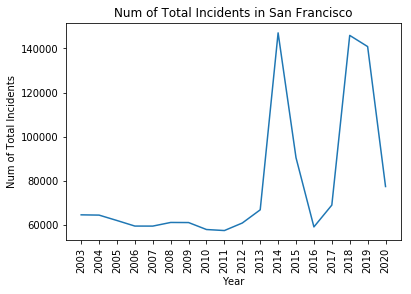

In [330]:
#Plot the number of total incidents in San Francisco over time
sf_incidents = neighborhood_incident_counter_df.query("Neighborhood == 'All'")
sf_incidents_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Total Incidents')
plt.xticks(rotation = 'vertical')
sf_incidents_plot.set_title('Num of Total Incidents in San Francisco')

The y-axis limit of the following graphs is set to 13,000 so that graphs can be easily compared side-by-side. The only graphs that have different limits are Larceny/Theft (45,000), Non-Criminal Offenses (20,000), and each of the Incident Severity Categories (75,000) because they have a much higher occurence rate than the other incident categories.

Text(0.5,1,'Num of Assaults in San Francisco')

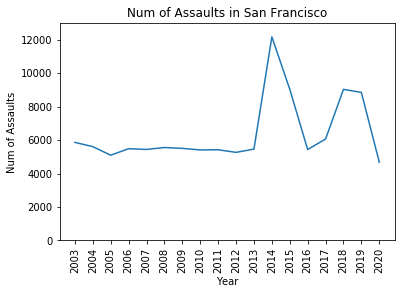

In [350]:
#Plot the number of assaults in San Francisco over time
sf_assaults_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Assaults')
plt.xticks(rotation = 'vertical')
sf_assaults_plot.set_ylim(0, 13000)
sf_assaults_plot.set_title('Num of Assaults in San Francisco')

Text(0.5,1,'Num of Burglaries in San Francisco')

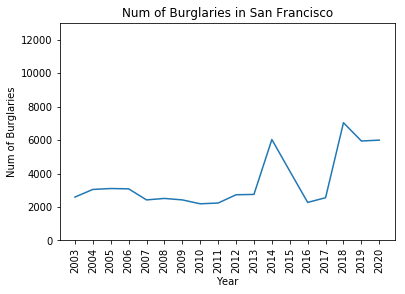

In [351]:
#Plot the number of burglaries in San Francisco over time
sf_burglaries_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Burglaries')
plt.xticks(rotation = 'vertical')
sf_burglaries_plot.set_ylim(0, 13000)
sf_burglaries_plot.set_title('Num of Burglaries in San Francisco')

Text(0.5,1,'Num of Disorderly Conduct Offenses in San Francisco')

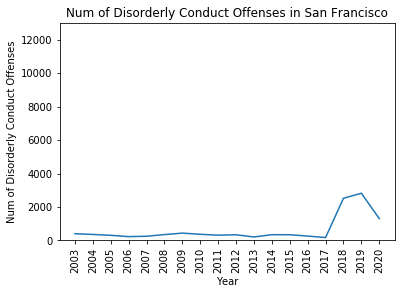

In [352]:
#Plot the number of disorderly conduct offenses in San Francisco over time
sf_dis_cond_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Disorderly Conduct Offenses')
plt.xticks(rotation = 'vertical')
sf_dis_cond_plot.set_ylim(0, 13000)
sf_dis_cond_plot.set_title('Num of Disorderly Conduct Offenses in San Francisco')

Text(0.5,1,'Num of Drug/Narcotic Offenses in San Francisco')

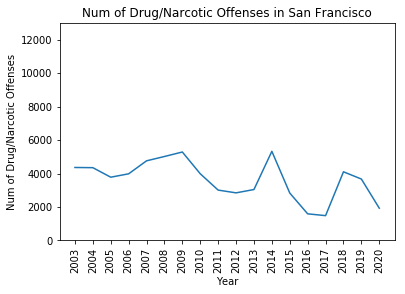

In [353]:
#Plot the number of drug/narcotic offenses in San Francisco over time
sf_drug_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Drug/Narcotic Offenses')
plt.xticks(rotation = 'vertical')
sf_drug_plot.set_ylim(0, 13000)
sf_drug_plot.set_title('Num of Drug/Narcotic Offenses in San Francisco')

Text(0.5,1,'Num of Fraud Offenses in San Francisco')

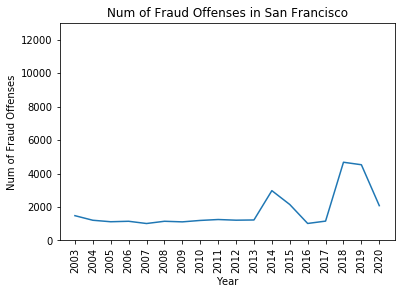

In [354]:
#Plot the number of fraud offenses in San Francisco over time
sf_fraud_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Fraud Offenses')
plt.xticks(rotation = 'vertical')
sf_fraud_plot.set_ylim(0, 13000)
sf_fraud_plot.set_title('Num of Fraud Offenses in San Francisco')

Text(0.5,1,'Num of Larceny/Theft Offenses in San Francisco')

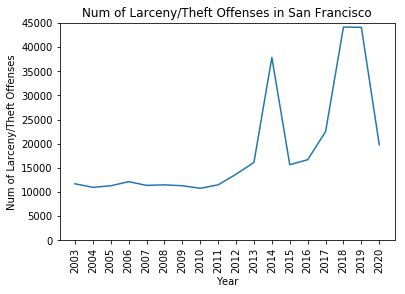

In [343]:
#Plot the number of larceny/theft offenses in San Francisco over time
sf_larceny_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Larceny/Theft Offenses')
plt.xticks(rotation = 'vertical')
sf_larceny_plot.set_ylim(0, 45000)
sf_larceny_plot.set_title('Num of Larceny/Theft Offenses in San Francisco')

Text(0.5,1,'Num of Malicious Mischief Offenses in San Francisco')

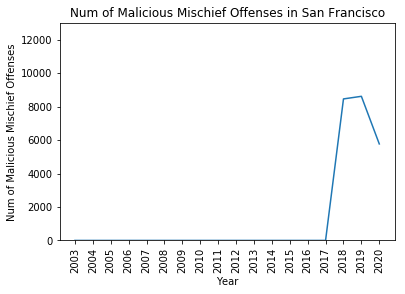

In [355]:
#Plot the number of malicious mischief offenses in San Francisco over time
sf_mischief_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Malicious Mischief Offenses')
plt.xticks(rotation = 'vertical')
sf_mischief_plot.set_ylim(0, 13000)
sf_mischief_plot.set_title('Num of Malicious Mischief Offenses in San Francisco')

Text(0.5,1,'Num of Missing Persons in San Francisco')

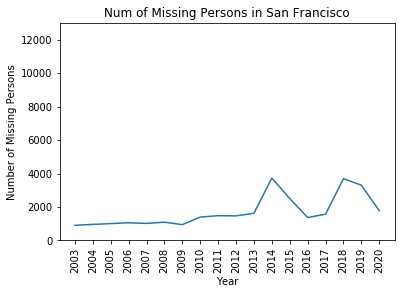

In [356]:
#Plot the number of missing persons in San Francisco over time
sf_missing_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Number of Missing Persons')
plt.xticks(rotation = 'vertical')
sf_missing_plot.set_ylim(0, 13000)
sf_missing_plot.set_title('Num of Missing Persons in San Francisco')

Text(0.5,1,'Num of Motor Vehicle Thefts in San Francisco')

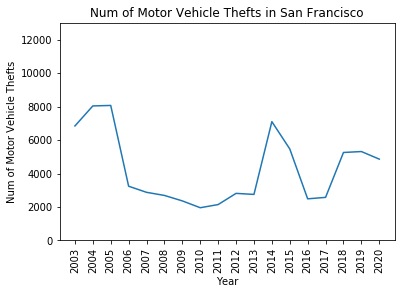

In [357]:
#Plot the number of motor vehicle thefts in San Francisco over time
sf_mv_theft_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Motor Vehicle Thefts')
plt.xticks(rotation = 'vertical')
sf_mv_theft_plot.set_ylim(0, 13000)
sf_mv_theft_plot.set_title('Num of Motor Vehicle Thefts in San Francisco')

Text(0.5,1,'Num of Non-Criminal Offenses in San Francisco')

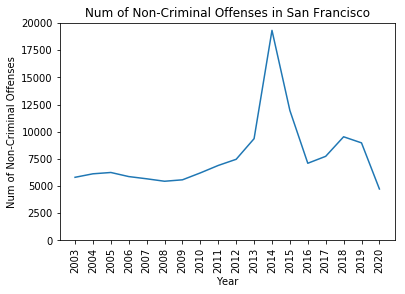

In [363]:
#Plot the number of non-criminal offenses in San Francisco over time
sf_noncrim_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Non-Criminal Offenses')
plt.xticks(rotation = 'vertical')
sf_noncrim_plot.set_ylim(0, 20000)
sf_noncrim_plot.set_title('Num of Non-Criminal Offenses in San Francisco')

Text(0.5,1,'Num of Robberies in San Francisco')

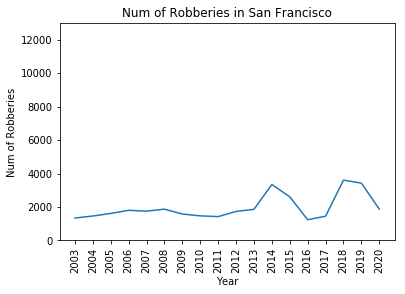

In [364]:
#Plot the number of robberies in San Francisco over time
sf_robbery_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Robberies')
plt.xticks(rotation = 'vertical')
sf_robbery_plot.set_ylim(0, 13000)
sf_robbery_plot.set_title('Num of Robberies in San Francisco')

Text(0.5,1,'Num of Suspicious Occurrences in San Francisco')

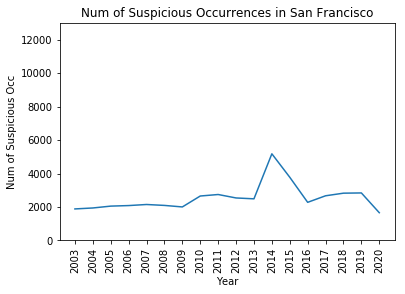

In [365]:
#Plot the number of suspicious occurrences in San Francisco over time
sf_sus_occ_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Suspicious Occ')
plt.xticks(rotation = 'vertical')
sf_sus_occ_plot.set_ylim(0, 13000)
sf_sus_occ_plot.set_title('Num of Suspicious Occurrences in San Francisco')

Text(0.5,1,'Num of Vandalism Offenses in San Francisco')

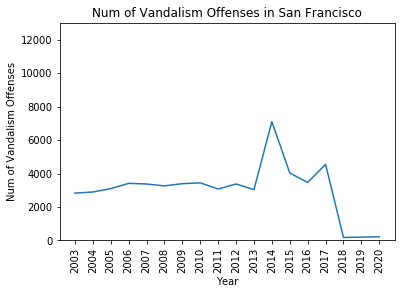

In [366]:
#Plot the number of vandalism offenses in San Francisco over time
sf_vand_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Vandalism Offenses')
plt.xticks(rotation = 'vertical')
sf_vand_plot.set_ylim(0, 13000)
sf_vand_plot.set_title('Num of Vandalism Offenses in San Francisco')

Text(0.5,1,'Num of Warrants in San Francisco')

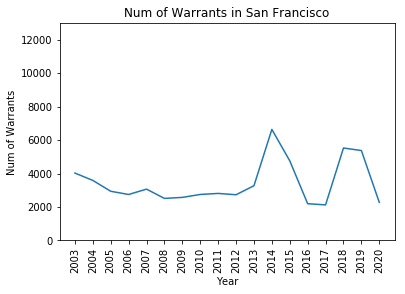

In [367]:
#Plot the number of warrants in San Francisco over time
sf_warrant_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Warrants')
plt.xticks(rotation = 'vertical')
sf_warrant_plot.set_ylim(0, 13000)
sf_warrant_plot.set_title('Num of Warrants in San Francisco')

Text(0.5,1,'Num of Weapons Offenses in San Francisco')

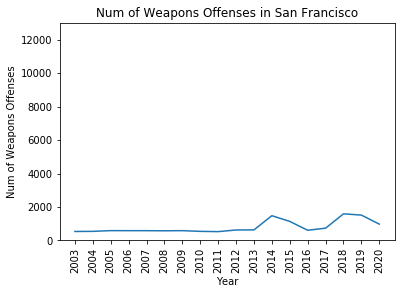

In [368]:
#Plot the number of weapons offenses in San Francisco over time
sf_weapons_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Weapons Offenses')
plt.xticks(rotation = 'vertical')
sf_weapons_plot.set_ylim(0, 13000)
sf_weapons_plot.set_title('Num of Weapons Offenses in San Francisco')

Text(0.5,1,"Num of Severity Category 0's in San Francisco")

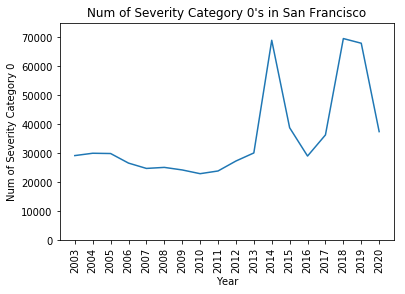

In [373]:
#Plot the number of severity category 0's in San Francisco over time
sf_sev_cat0_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Severity Category 0')
plt.xticks(rotation = 'vertical')
sf_sev_cat0_plot.set_ylim(0, 75000)
sf_sev_cat0_plot.set_title("Num of Severity Category 0's in San Francisco")

Text(0.5,1,"Num of Severity Category 1's in San Francisco")

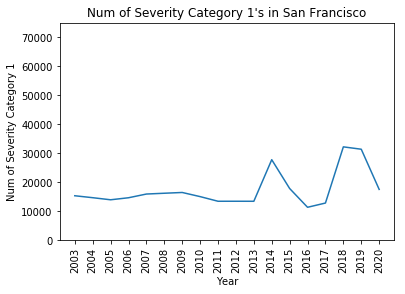

In [374]:
#Plot the number of severity category 1's in San Francisco over time
sf_sev_cat1_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Severity Category 1')
plt.xticks(rotation = 'vertical')
sf_sev_cat1_plot.set_ylim(0, 75000)
sf_sev_cat1_plot.set_title("Num of Severity Category 1's in San Francisco")

Text(0.5,1,"Num of Severity Category 2's in San Francisco")

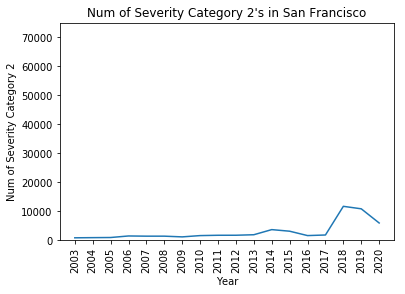

In [375]:
#Plot the number of severity category 2's in San Francisco over time
sf_sev_cat2_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Severity Category 2')
plt.xticks(rotation = 'vertical')
sf_sev_cat2_plot.set_ylim(0, 75000)
sf_sev_cat2_plot.set_title("Num of Severity Category 2's in San Francisco")

Text(0.5,1,"Num of Severity Category 3's in San Francisco")

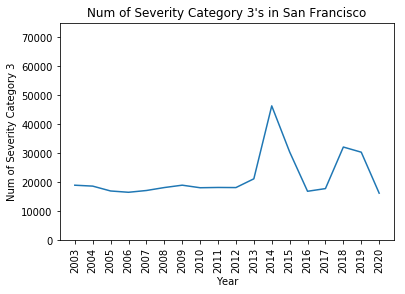

In [376]:
#Plot the number of severity category 3's in San Francisco over time
sf_sev_cat3_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Severity Category 3')
plt.xticks(rotation = 'vertical')
sf_sev_cat3_plot.set_ylim(0, 75000)
sf_sev_cat3_plot.set_title("Num of Severity Category 3's in San Francisco")

Text(0.5,1,'Num of Pit Stops in San Francisco')

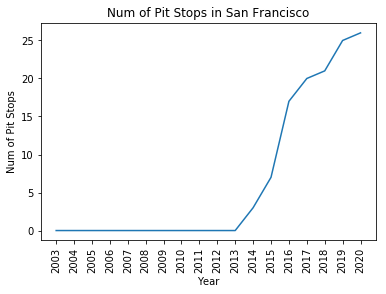

In [407]:
#Plot the number of pit stops in San Francisco over time
sf_pit_stops_plot = sns.lineplot(data = sf_incidents, x = 'Year', y = 'Num of Pit Stops')
plt.xticks(rotation = 'vertical')
#sf_pit_stops_plot.set_ylim(0, 75000)
sf_pit_stops_plot.set_title('Num of Pit Stops in San Francisco')

In [589]:
#Make a new dataframe that does not include "All" - meaning San Francisco as a whole
ps_neighborhoods_incident_counter_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] != 'All']

In [590]:
ps_neighborhoods_incident_counter_df.head()

Neighborhood  Year  Num of Total Incidents  \
1           Bayview Hunters Point  2003                  4385.0   
2             Castro/Upper Market  2003                  1670.0   
3  Financial District/South Beach  2003                  4011.0   
4                Golden Gate Park  2003                   564.0   
5                  Haight Ashbury  2003                  1088.0   

   Num of Assaults  Num of Burglaries  Num of Disorderly Conduct Offenses  \
1            565.0              185.0                                10.0   
2            142.0               97.0                                 6.0   
3            266.0              219.0                                22.0   
4             38.0                1.0                                 1.0   
5             65.0               56.0                                17.0   

   Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
1                          312.0                   45.0   
2                           68.0                   51.0   
3                           74.0                  145.0   
4                           52.0                    1.0   
5                           82.0                   19.0   

   Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
1                          398.0                                 0.0   
2                          345.0                                 0.0   
3                         1440.0                                 0.0   
4                          152.0                                 0.0   
5                          215.0                                 0.0   

      ...       Num of Weapons Offenses  Num of Severity Category 0  \
1     ...                          69.0                      1866.0   
2     ...                          11.0                       866.0   
3     ...                          12.0                      2263.0   
4     ...                           6.0                       276.0   
5     ...                          11.0                       534.0   

   Num of Severity Category 1  Num of Severity Category 2  \
1                       901.0                        75.0   
2                       362.0                        16.0   
3                       742.0                        33.0   
4                        99.0                         3.0   
5                       271.0                        25.0   

   Num of Severity Category 3  Num of Pit Stops         Location Coordinates  \
1                      1543.0               0.0     [-122.380062, 37.752064]   
2                       426.0               0.0     [-122.428262, 37.769541]   
3                       973.0               0.0     [-122.392429, 37.793835]   
4                       186.0               0.0  [-122.4700014, 37.76961699]   
5                       258.0               0.0  [-122.4430863, 37.76906862]   

    Latitude   Longitude  Location ID  
1  37.731721 -122.390829        94124  
2  37.762279 -122.434780        94114  
3  37.789125 -122.401342        94111  
4  37.769617 -122.470001        94121  
5  37.769069 -122.443086        94117  

[5 rows x 27 columns]

Text(0.5,1,'Number of Total Incidents in Each Neighborhood')

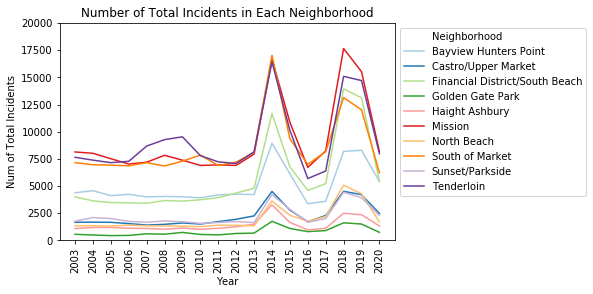

In [811]:
#Plot the number of total incidents in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_all_inc_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Total Incidents', 
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1, 1))
all_nb_all_inc_plot.set_ylim(0, 20000)
all_nb_all_inc_plot.set_title('Number of Total Incidents in Each Neighborhood')

#All neighborhoods follow same basic pattern over time

Text(0.5,1,'Number of Assaults in Each Neighborhood')

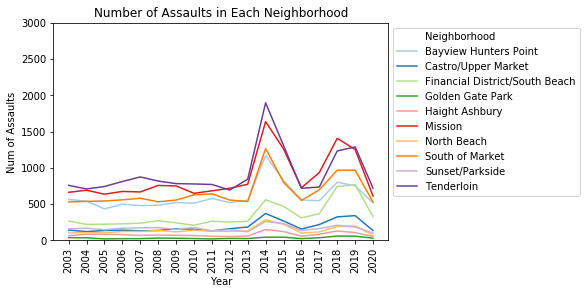

In [812]:
#Plot the number of assaults in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_assaults_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Assaults', 
                                    hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_assaults_plot.set_ylim(0, 3000)
all_nb_assaults_plot.set_title('Number of Assaults in Each Neighborhood')

Text(0.5,1,'Number of Burglaries in Each Neighborhood')

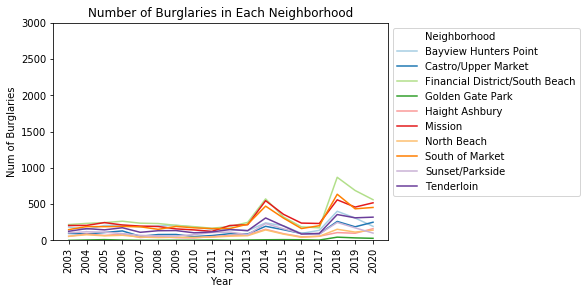

In [813]:
#Plot the number of burglaries in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_burglaries_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Burglaries', 
                                      hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_burglaries_plot.set_ylim(0, 3000)
all_nb_burglaries_plot.set_title('Number of Burglaries in Each Neighborhood')

Text(0.5,1,'Number of Disorderly Conduct Offenses in Each Neighborhood')

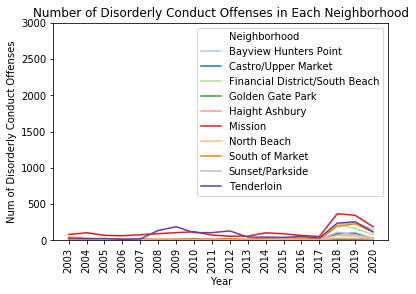

In [816]:
#Plot the number of disorderly conduct offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_dis_conduct_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', 
                                       y = 'Num of Disorderly Conduct Offenses', 
                                       hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_dis_conduct_plot.set_ylim(0, 3000)
all_nb_dis_conduct_plot.set_title('Number of Disorderly Conduct Offenses in Each Neighborhood')

Text(0.5,1,'Number of Drug/Narcotic Offenses in Each Neighborhood')

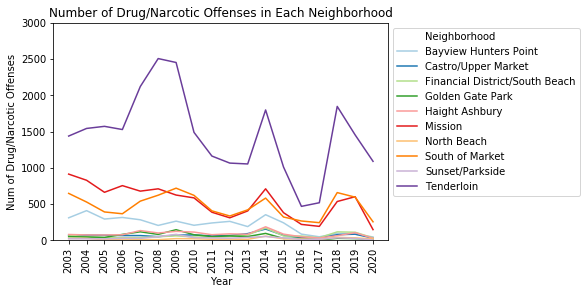

In [817]:
#Plot the number of drug/narcotic offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_drug_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Drug/Narcotic Offenses', 
                                hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_drug_plot.set_ylim(0, 3000)
all_nb_drug_plot.set_title('Number of Drug/Narcotic Offenses in Each Neighborhood')

Text(0.5,1,'Number of Fraud Offenses in Each Neighborhood')

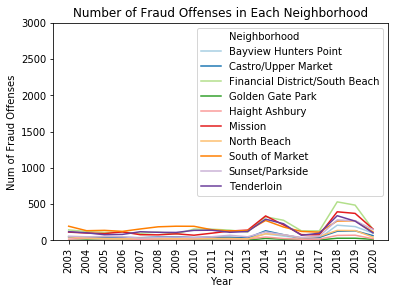

In [818]:
#Plot the number of fraud offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_fraud_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Fraud Offenses', 
                                 hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_fraud_plot.set_ylim(0, 3000)
all_nb_fraud_plot.set_title('Number of Fraud Offenses in Each Neighborhood')

Text(0.5,1,'Number of Larceny/Theft Offenses in Each Neighborhood')

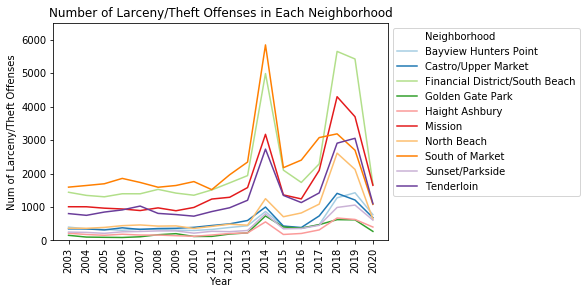

In [819]:
#Plot the number of larceny/theft offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_larceny_theft_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', 
                                         y = 'Num of Larceny/Theft Offenses', hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_larceny_theft_plot.set_ylim(0, 6500)
all_nb_larceny_theft_plot.set_title('Number of Larceny/Theft Offenses in Each Neighborhood')

Text(0.5,1,'Number of Malicious Mischief Offenses in Each Neighborhood')

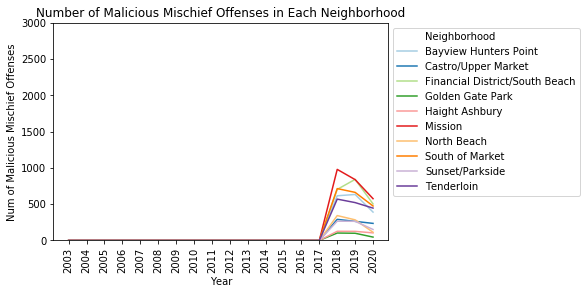

In [820]:
#Plot the number of malicious mischief offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_mischief_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', 
                                    y = 'Num of Malicious Mischief Offenses', hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_mischief_plot.set_ylim(0, 3000)
all_nb_mischief_plot.set_title('Number of Malicious Mischief Offenses in Each Neighborhood')

Text(0.5,1,'Number of Missing Persons in Each Neighborhood')

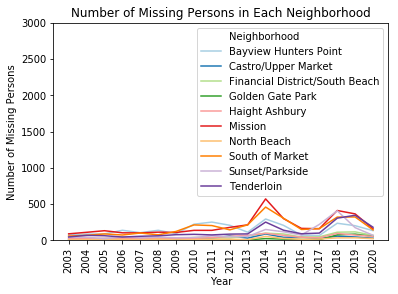

In [821]:
#Plot the number of missing persons in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_missing_p_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Number of Missing Persons',
                                     hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_missing_p_plot.set_ylim(0, 3000)
all_nb_missing_p_plot.set_title('Number of Missing Persons in Each Neighborhood')

Text(0.5,1,'Number of Motor Vehicle Thefts in Each Neighborhood')

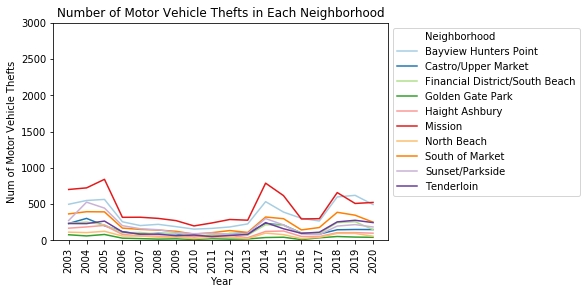

In [822]:
#Plot the number of motor vehicle thefts in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_mv_theft_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Motor Vehicle Thefts',
                                    hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_mv_theft_plot.set_ylim(0, 3000)
all_nb_mv_theft_plot.set_title('Number of Motor Vehicle Thefts in Each Neighborhood')

Text(0.5,1,'Number of Non-Criminal Offenses in Each Neighborhood')

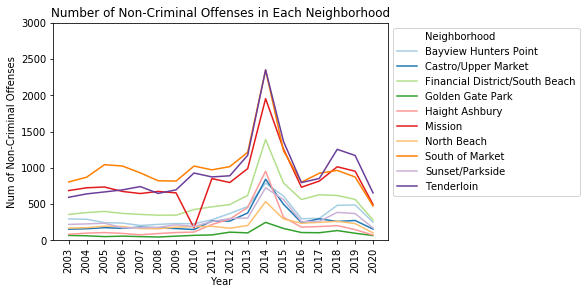

In [823]:
#Plot the number of non-criminal offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_noncriminal_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', 
                                       y = 'Num of Non-Criminal Offenses', hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_noncriminal_plot.set_ylim(0, 3000)
all_nb_noncriminal_plot.set_title('Number of Non-Criminal Offenses in Each Neighborhood')

Text(0.5,1,'Number of Robberies in Each Neighborhood')

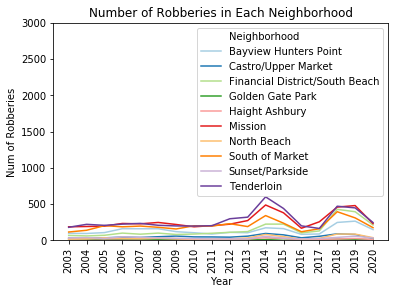

In [824]:
#Plot the number of robberies in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_robbery_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Robberies', 
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_robbery_plot.set_ylim(0, 3000)
all_nb_robbery_plot.set_title('Number of Robberies in Each Neighborhood')

Text(0.5,1,'Number of Suspicious Occurrence Offenses in Each Neighborhood')

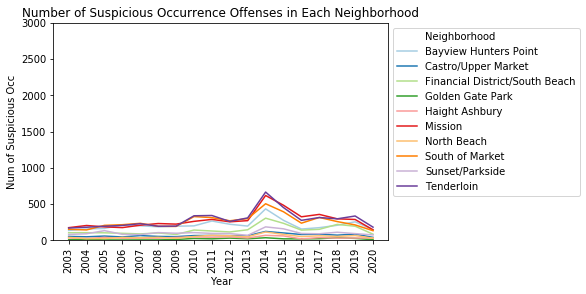

In [825]:
#Plot the number of suspicious occurrence offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_sus_occ_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Suspicious Occ',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_sus_occ_plot.set_ylim(0, 3000)
all_nb_sus_occ_plot.set_title('Number of Suspicious Occurrence Offenses in Each Neighborhood')

Text(0.5,1,'Number of Vandalism Offenses in Each Neighborhood')

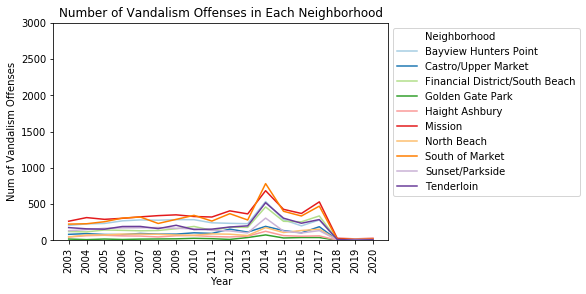

In [826]:
#Plot the number of vandalism offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_vandalism_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Vandalism Offenses',
                                     hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_vandalism_plot.set_ylim(0, 3000)
all_nb_vandalism_plot.set_title('Number of Vandalism Offenses in Each Neighborhood')

Text(0.5,1,'Number of Warrants in Each Neighborhood')

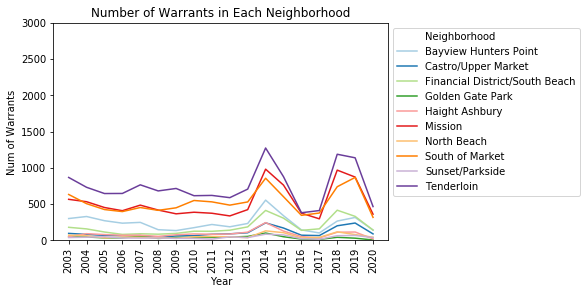

In [827]:
#Plot the number of warrants in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_warrant_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Warrants',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_warrant_plot.set_ylim(0, 3000)
all_nb_warrant_plot.set_title('Number of Warrants in Each Neighborhood')

Text(0.5,1,'Number of Weapons Offenses in Each Neighborhood')

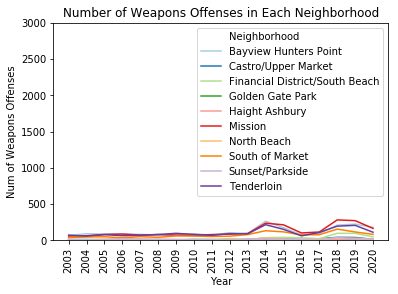

In [828]:
#Plot the number of weapons offenses in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_weapons_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Weapons Offenses',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_weapons_plot.set_ylim(0, 3000)
all_nb_weapons_plot.set_title('Number of Weapons Offenses in Each Neighborhood')

Text(0.5,1,"Number of Severity Category 0's in Each Neighborhood")

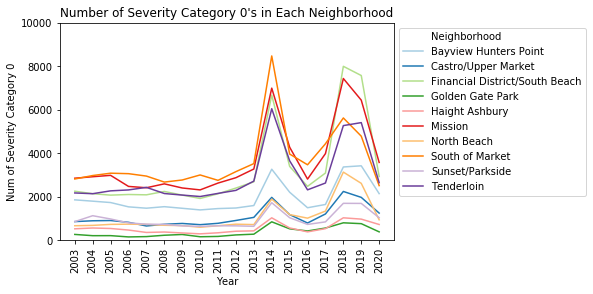

In [829]:
#Plot the number of severity category 0's in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_sev_cat_0_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Severity Category 0',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_sev_cat_0_plot.set_ylim(0, 10000)
all_nb_sev_cat_0_plot.set_title("Number of Severity Category 0's in Each Neighborhood")

Text(0.5,1,"Number of Severity Category 1's in Each Neighborhood")

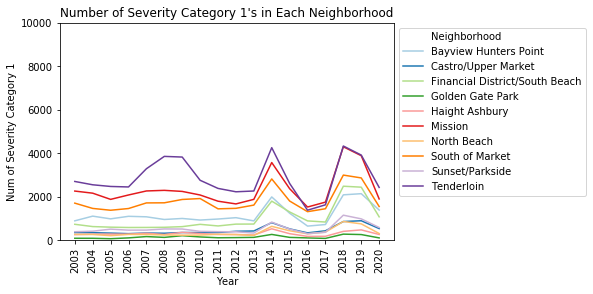

In [830]:
#Plot the number of severity category 1's in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_sev_cat_1_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Severity Category 1',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_sev_cat_1_plot.set_ylim(0, 10000)
all_nb_sev_cat_1_plot.set_title("Number of Severity Category 1's in Each Neighborhood")

Text(0.5,1,"Number of Severity Category 2's in Each Neighborhood")

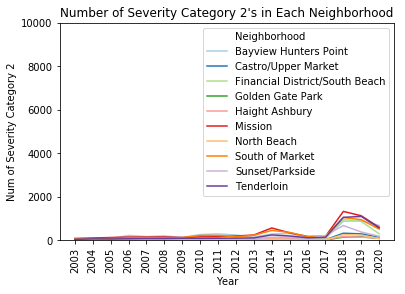

In [831]:
#Plot the number of severity category 2's in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_sev_cat_2_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Severity Category 2',
                                   hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_sev_cat_2_plot.set_ylim(0, 10000)
all_nb_sev_cat_2_plot.set_title("Number of Severity Category 2's in Each Neighborhood")

Text(0.5,1,"Number of Severity Category 3's in Each Neighborhood")

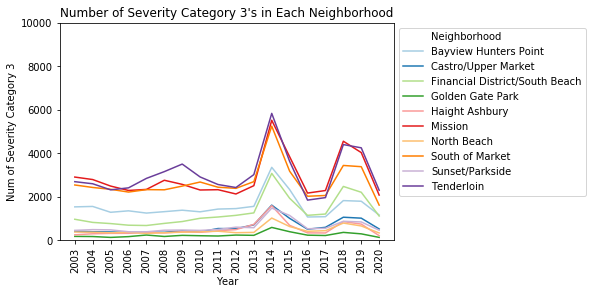

In [832]:
#Plot the number of severity category 3's in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_sev_cat_3_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Severity Category 3',
                                     hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor = (1,1))
all_nb_sev_cat_3_plot.set_ylim(0, 10000)
all_nb_sev_cat_3_plot.set_title("Number of Severity Category 3's in Each Neighborhood")

Text(0.5,1,'Number of Pit Stops in Each Neighborhood')

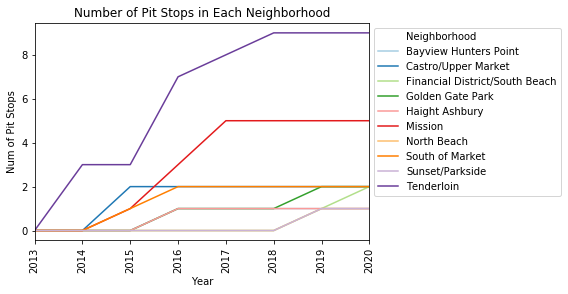

In [809]:
#Plot number of pit stops in each neighborhood over time
palette = sns.color_palette('Paired', n_colors = 10)
all_nb_pit_stop_plot = sns.lineplot(data = ps_neighborhoods_incident_counter_df, x = 'Year', y = 'Num of Pit Stops',
                                    hue = 'Neighborhood', palette = palette)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1,1))
all_nb_pit_stop_plot.set_xlim('2013', '2020')
all_nb_pit_stop_plot.set_title("Number of Pit Stops in Each Neighborhood")

### Plotly Maps

In [839]:
num_of_incidents = px.scatter_mapbox(ps_neighborhoods_incident_counter_df,
                                     lat = 'Latitude',
                                     lon = 'Longitude',
                                     size = 'Num of Total Incidents',
                                     color = 'Neighborhood',
                                     hover_name = 'Neighborhood',
                                     hover_data = ['Num of Total Incidents'],
                                     labels = 'Num of Total Incidents',
                                     animation_frame = 'Year', 
                                     color_discrete_sequence = px.colors.cyclical.IceFire,
                                     mapbox_style = 'open-street-map',
                                     zoom = 10.5,
                                     width = 750,)

num_of_incidents.update_layout(title="Num of Incidents In Pit Stop Neighborhoods from 2003-2020")
num_of_incidents.show()

In [840]:
#Save map as an html file
pio.write_html(num_of_incidents, 
               file='C:/Users/Becky/Documents/MPS Data Science/DATA 606/Plotly maps/Phase 2/Incidents_in_SF_PitStop_Neighborhoods.html', auto_open=True)

In [469]:
#I attempted to use geojson for a choropleth map below, but I couldn't get it to work
from urllib.request import urlopen
import json

In [470]:
with urlopen('https://gist.githubusercontent.com/cdolek/d08cac2fa3f6338d84ea/raw/ebe3d2a4eda405775a860d251974e1f08cbe4f48/SanFrancisco.Neighborhoods.json') as response:
     neighborhoods = json.load(response)         

In [548]:
neighborhoods["features"][0]

{'geometry': {'geometries': [{'type': 'Polygon',
    'coordinates': [[[-122.391701, 37.794113],
      [-122.39198, 37.793906],
      [-122.391614, 37.793571],
      [-122.391714, 37.793459],
      [-122.388816, 37.791005],
      [-122.388932, 37.790919],
      [-122.388616, 37.790348],
      [-122.388076, 37.790518],
      [-122.388375, 37.790334],
      [-122.388225, 37.790032],
      [-122.385852, 37.790951],
      [-122.385496, 37.790559],
      [-122.387589, 37.789838],
      [-122.387289, 37.789347],
      [-122.385303, 37.789838],
      [-122.38512, 37.789313],
      [-122.387174, 37.788807],
      [-122.387032, 37.788255],
      [-122.385261, 37.788537],
      [-122.385136, 37.788156],
      [-122.38739, 37.787736],
      [-122.387415, 37.787269],
      [-122.3845, 37.787437],
      [-122.384342, 37.785728],
      [-122.387577, 37.785485],
      [-122.38765, 37.784929],
      [-122.385546, 37.785009],
      [-122.385455, 37.784711],
      [-122.387477, 37.784493],
      [-122.38

In [842]:
#geojson = ps_neighborhoods_incident_counter_df_geojson()

incident_scatter_fig = px.scatter_mapbox(ps_neighborhoods_incident_counter_df,
                                         lat = 'Latitude',
                                         lon = 'Longitude',
                                         color = 'Num of Total Incidents',
                                         #geojson = neighborhoods,
                                         #featureidkey = 'neighborhoods.id',
                                         #projection = 'mercator',
                                         animation_frame = 'Year',
                                         #animation_group = 'Neighborhood',
                                         hover_name = 'Neighborhood',
                                         hover_data = ['Num of Total Incidents', 'Year'],
                                         color_continuous_scale = px.colors.sequential.YlOrRd,
                                         #scope = 'usa',
                                         center = {'lon': -122.4194, 'lat': 37.7749},
                                         size = 'Num of Pit Stops',
                                         zoom = 10.8,
                                         width = 750,)
incident_scatter_fig.update_layout(mapbox_style = "open-street-map",
                                   title="Number of Incidents after Pit Stops Were Built")
incident_scatter_fig.show()

In [843]:
#Save map as an html file
pio.write_html(incident_scatter_fig, 
               file='C:/Users/Becky/Documents/MPS Data Science/DATA 606/Plotly maps/Phase 2/Incidents_after_PitStops_Built.html', auto_open=True)

## Mann-Kendall and Pearson Correlation Coefficient Tests

I'm going to make new dataframes that include only one neighborhood so that I can dive deeper into possible correlations. I will be using Mann-Kendall tests and Pearson correlation tests. 

In [7]:
#Install and import pymannkendall

#Installation instructions from: https://pypi.org/project/pymannkendall/
#Citation: Hussain et al., (2019). pyMannKendall: a python package for non parametric Mann Kendall family of trend tests. 
           #Journal of Open Source Software, 4(39), 1556, https://doi.org/10.21105/joss.01556
!pip install pymannkendall
import pymannkendall as mk

You should consider upgrading via the 'c:\users\becky\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
#Make sure Year column's datatype is integer. Mann-Kendall test only allows integers and floats in dataframe
neighborhood_incident_counter_df['Year'] = neighborhood_incident_counter_df['Year'].astype(float)

#### Bayview Hunters Point  

In [9]:
#Make a dataframe that includes only Bayview Hunters Point
bayview_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Bayview Hunters Point']

In [10]:
#Change the neighborhood name to a float (1) because Mann-Kendall test does not allow strings to be passed into it
bayview_incidents_df = bayview_incidents_df.replace(to_replace = {'Neighborhood': {'Bayview Hunters Point': float(1)}})

In [11]:
#Drop Location Coordinates, Latitude, and Longitude columns
bayview_incidents_df = bayview_incidents_df.drop(['Location Coordinates'], axis = 1)
bayview_incidents_df = bayview_incidents_df.drop(['Latitude'], axis = 1)
bayview_incidents_df = bayview_incidents_df.drop(['Longitude'], axis = 1)

In [12]:
#Drop row that includes 2020 data because it may skew the results of the correlation
#The data for 2020 is not complete yet because the year isn't over. There may be fewer incidents because of this. I don't want 
#the correlation to be biased because the data isn't complete.
bayview_incidents_df = bayview_incidents_df[bayview_incidents_df['Year'] != 2020.0]

In [13]:
#Drop Location ID column
bayview_incidents_df = bayview_incidents_df.drop(['Location ID'], axis = 1)

In [14]:
bayview_incidents_df

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
1             1.0  2003.0                  4385.0            565.0   
13            1.0  2004.0                  4572.0            541.0   
25            1.0  2005.0                  4118.0            435.0   
37            1.0  2006.0                  4243.0            500.0   
49            1.0  2007.0                  4003.0            480.0   
61            1.0  2008.0                  4046.0            487.0   
73            1.0  2009.0                  4018.0            522.0   
85            1.0  2010.0                  3923.0            513.0   
97            1.0  2011.0                  4190.0            579.0   
109           1.0  2012.0                  4250.0            523.0   
121           1.0  2013.0                  4224.0            555.0   
133           1.0  2014.0                  8933.0           1172.0   
145           1.0  2015.0                  6125.0            828.0   
157           1.0  2016.0                  3373.0            558.0   
169           1.0  2017.0                  3601.0            548.0   
181           1.0  2018.0                  8188.0            803.0   
193           1.0  2019.0                  8291.0            753.0   

     Num of Burglaries  Num of Disorderly Conduct Offenses  \
1                185.0                                10.0   
13               152.0                                 7.0   
25               206.0                                19.0   
37               211.0                                13.0   
49               186.0                                 3.0   
61               201.0                                 4.0   
73               208.0                                11.0   
85               185.0                                 7.0   
97               154.0                                 6.0   
109              153.0                                 6.0   
121              134.0                                 9.0   
133              242.0                                30.0   
145              202.0                                16.0   
157               97.0                                12.0   
169              139.0                                 7.0   
181              402.0                               219.0   
193              309.0                               246.0   

     Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
1                            312.0                   45.0   
13                           411.0                   44.0   
25                           295.0                   41.0   
37                           317.0                   43.0   
49                           285.0                   36.0   
61                           207.0                   46.0   
73                           266.0                   35.0   
85                           209.0                   38.0   
97                           241.0                   36.0   
109                          263.0                   48.0   
121                          191.0                   29.0   
133                          355.0                   90.0   
145                          243.0                   60.0   
157                           87.0                   30.0   
169                           50.0                   31.0   
181                           98.0                  210.0   
193                           87.0                  191.0   

     Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
1                            398.0                                 0.0   
13                           347.0                                 0.0   
25                           328.0                                 0.0   
37                           303.0                                 0.0   
49                           340.0                                 0.0   
61                           329.0                                 0.0   
73        

In [15]:
bayview_incidents_df.shape

(17, 23)

In [16]:
#Perform Mann-Kendall test
mk.seasonal_test(bayview_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=5.855467222204425e-10, z=6.1942729621446, Tau=0.21962915601023017, s=687.0, var_s=12265.000000000002, slope=1.0, intercept=225.52173913043478)

We see that the overall trend in incidents in Bayview Hunters Point is increasing, and that the trend is statistically significant (p-value < 0.05).

In [158]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
#The results of pearsonr are (correlation coefficient, p-value)
#a p-value < 0.05 is statistically significant
total_incidents_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                                bayview_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                         bayview_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                         bayview_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                         bayview_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                     bayview_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                      bayview_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                         bayview_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                         bayview_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                     bayview_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                       bayview_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(bayview_incidents_df['Num of Pit Stops'], 
                                        bayview_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.28882264842466243, 0.2608808116265859)
Correlation between Num of Pit Stops and Num of Assaults: (0.17454553355712313, 0.5028415586022983)
Correlation between Num of Pit Stops and Num of Burglaries: (0.3122289694121071, 0.22243152180027154)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6498962969759483, 0.004742829760762307)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.8419915724339481, 2.2445634754059782e-05)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.5654369393243726, 0.01800584333773424)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.6231129011319687, 0.007536408189533889)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.6582032516329382, 0.004072090475240294)
Correlation between Num of Pit Stops and Num of Missing Persons: (-0.06698038692103506, 0.7984004121076331)
Corr

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 9
positive correlation, statistically significant: 5
negative correlation, not statistically significant: 4
negative correlation, statistically significant: 2 (Vandalism and Drug/Narcotic)

Text(0.5,1,'Num of Vandalism Offenses vs. Num of Pit Stops in Bayview Hunters Point')

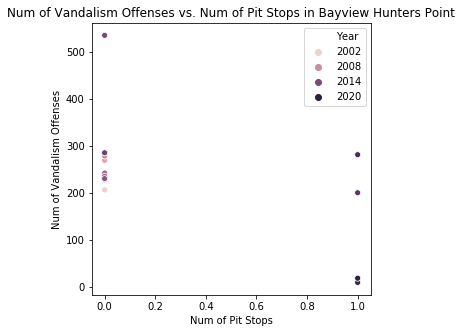

In [661]:
#Plot Num of Pit Stops vs Num of Vandalism Offenses because it is a statistically significant negative correlation
fig = plt.figure(figsize=(5,5))
vandalism_scatter = sns.scatterplot(data = bayview_incidents_df, x = 'Num of Pit Stops', 
                                    y = 'Num of Vandalism Offenses', hue = 'Year')
plt.legend(bbox_to_anchor=(1, 1))
vandalism_scatter.set_title('Num of Vandalism Offenses vs. Num of Pit Stops in Bayview Hunters Point')

Text(0.5,1,'Num of Drug/Narcotic Offenses vs. Num of Pit Stops in Bayview Hunters Point')

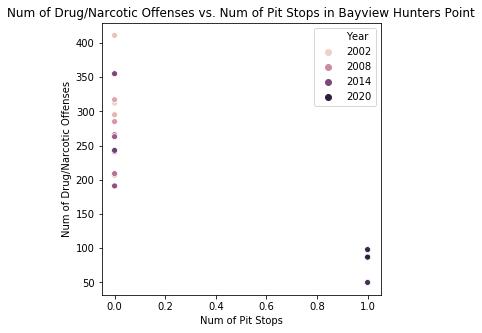

In [662]:
#Plot Num of Pit Stops vs. Num of Drug/Narcotic Offenses because it is a statistically significant negative correlation
fig = plt.figure(figsize=(5,5))
vandalism_scatter = sns.scatterplot(data = bayview_incidents_df, x = 'Num of Pit Stops', 
                                    y = 'Num of Drug/Narcotic Offenses', hue = 'Year')
plt.legend(bbox_to_anchor=(1, 1))
vandalism_scatter.set_title('Num of Drug/Narcotic Offenses vs. Num of Pit Stops in Bayview Hunters Point')

#### Castro/Upper Market

In [17]:
#Make a dataframe that includes only Castro/Upper Market
castro_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Castro/Upper Market']

In [18]:
#Change the neighborhood name to a float (2) because Mann-Kendall test does not allow strings to be passed into it
castro_incidents_df = castro_incidents_df.replace(to_replace = {'Neighborhood': {'Castro/Upper Market': float(2)}})

In [19]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
castro_incidents_df = castro_incidents_df.drop(['Location Coordinates'], axis = 1)
castro_incidents_df = castro_incidents_df.drop(['Latitude'], axis = 1)
castro_incidents_df = castro_incidents_df.drop(['Longitude'], axis = 1)
castro_incidents_df = castro_incidents_df.drop(['Location ID'], axis = 1)

In [20]:
#Drop row that includes 2020 data because it may skew the results of the correlation
castro_incidents_df = castro_incidents_df[castro_incidents_df['Year'] != 2020.0]
castro_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
2            2.0  2003.0                  1670.0            142.0   
14           2.0  2004.0                  1679.0            122.0   
26           2.0  2005.0                  1666.0            137.0   
38           2.0  2006.0                  1547.0            142.0   
50           2.0  2007.0                  1413.0            133.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
2                97.0                                 6.0   
14               89.0                                 6.0   
26              109.0                                10.0   
38              131.0                                 6.0   
50               57.0                                 7.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
2                            68.0                   51.0   
14                           74.0                   38.0   
26                           72.0                   44.0   
38                           67.0                   39.0   
50                           67.0                   38.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
2                           345.0                                 0.0   
14                          344.0                                 0.0   
26                          314.0                                 0.0   
38                          377.0                                 0.0   
50                          329.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
2         ...                     31.0                   55.0   
14        ...                     27.0                   50.0   
26        ...                     36.0                   60.0   
38        ...                     45.0                   48.0   
50        ...                     41.0                   67.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
2                        84.0             97.0                     11.0   
14                       94.0             83.0                     11.0   
26                       82.0             70.0                      6.0   
38                       80.0             65.0                      9.0   
50                       96.0             67.0                     13.0   

    Num of Severity Category 0  Num of Severity Category 1  \
2                        866.0                       362.0   
14                       904.0                       357.0   
26                       915.0                       337.0   
38                       833.0                       312.0   
50                       664.0                       340.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
2                         16.0                       426.0               0.0  
14                        19.0                       399.0               0.0  
26                        26.0                       388.0               0.0  
38                        37.0                       365.0               0.0  
50                        26.0                       383.0               0.0  

[5 rows x 23 columns]

In [21]:
#Perform Mann-Kendall test
mk.seasonal_test(castro_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.890936127725652, Tau=0.4216751918158568, s=1319.0, var_s=12285.666666666668, slope=2.0, intercept=70.04347826086956)

We see that the overall trend in incidents in Castro/Upper Market is increasing, and that the trend is statistically significant (p-value < 0.05).

In [165]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                                castro_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                         castro_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                         castro_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                         castro_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                     castro_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                      castro_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                         castro_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                         castro_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                     castro_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                       castro_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(castro_incidents_df['Num of Pit Stops'], 
                                        castro_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.5152047812677518, 0.03430307993560582)
Correlation between Num of Pit Stops and Num of Assaults: (0.5597572945990232, 0.019460818886137803)
Correlation between Num of Pit Stops and Num of Burglaries: (0.5180004111904081, 0.03317358391800379)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5448090880153966, 0.023731179587354476)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.2827830914783672, 0.2714297524628318)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.4327659490076555, 0.08272534903736464)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.5448518733664652, 0.023718000088572926)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.5648683583378357, 0.018147538010523614)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.28262788231970454, 0.27170424410505256)
Correla

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 6
positive correlation, statistically significant: 11
negative correlation, not statistically significant: 3
negative correlation, statistically significant: 0

#### Financial District/South Beach

In [22]:
#Make a dataframe that includes only Financial District/South Beach
fd_sb_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Financial District/South Beach']

In [23]:
#Change the neighborhood name to a float (3) because Mann-Kendall test does not allow strings to be passed into it
fd_sb_incidents_df = fd_sb_incidents_df.replace(to_replace = {'Neighborhood': {'Financial District/South Beach': float(3)}})

In [24]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
fd_sb_incidents_df = fd_sb_incidents_df.drop(['Location Coordinates'], axis = 1)
fd_sb_incidents_df = fd_sb_incidents_df.drop(['Latitude'], axis = 1)
fd_sb_incidents_df = fd_sb_incidents_df.drop(['Longitude'], axis = 1)
fd_sb_incidents_df = fd_sb_incidents_df.drop(['Location ID'], axis = 1)

In [25]:
#Drop row that includes 2020 data because it may skew the results of the correlation
fd_sb_incidents_df = fd_sb_incidents_df[fd_sb_incidents_df['Year'] != 2020.0]
fd_sb_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
3            3.0  2003.0                  4011.0            266.0   
15           3.0  2004.0                  3637.0            222.0   
27           3.0  2005.0                  3487.0            223.0   
39           3.0  2006.0                  3453.0            229.0   
51           3.0  2007.0                  3416.0            237.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
3               219.0                                22.0   
15              235.0                                26.0   
27              246.0                                 5.0   
39              265.0                                 3.0   
51              238.0                                 7.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
3                            74.0                  145.0   
15                           50.0                  123.0   
27                           38.0                  111.0   
39                           37.0                  115.0   
51                           39.0                   98.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
3                          1440.0                                 0.0   
15                         1346.0                                 0.0   
27                         1304.0                                 0.0   
39                         1395.0                                 0.0   
51                         1394.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
3         ...                     69.0                  106.0   
15        ...                     62.0                  107.0   
27        ...                     71.0                  105.0   
39        ...                    101.0                   98.0   
51        ...                     86.0                   90.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
3                       122.0            181.0                     12.0   
15                      118.0            159.0                     16.0   
27                      144.0            116.0                     14.0   
39                      139.0             83.0                     16.0   
51                      133.0             92.0                     12.0   

    Num of Severity Category 0  Num of Severity Category 1  \
3                       2263.0                       742.0   
15                      2149.0                       637.0   
27                      2083.0                       610.0   
39                      2112.0                       595.0   
51                      2097.0                       597.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
3                         33.0                       973.0               0.0  
15                        22.0                       829.0               0.0  
27                        19.0                       775.0               0.0  
39                        46.0                       700.0               0.0  
51                        36.0                       686.0               0.0  

[5 rows x 23 columns]

In [26]:
#Perform Mann-Kendall test
mk.seasonal_test(fd_sb_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.076229457419393, Tau=0.4587595907928389, s=1435.0, var_s=12026.333333333334, slope=4.732142857142858, intercept=116.87965838509317)

We see that the overall trend in incidents in Financial District/South Beach is increasing, and that the trend is statistically significant (p-value < 0.05).

In [176]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                                fd_sb_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                         fd_sb_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                         fd_sb_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                         fd_sb_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                     fd_sb_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                      fd_sb_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                         fd_sb_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                         fd_sb_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                     fd_sb_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                       fd_sb_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(fd_sb_incidents_df['Num of Pit Stops'], 
                                        fd_sb_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.5363224213985932, 0.026459831313326222)
Correlation between Num of Pit Stops and Num of Assaults: (0.6038066872415615, 0.010268120966994946)
Correlation between Num of Pit Stops and Num of Burglaries: (0.48334366294712094, 0.04935122300109091)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5419717355604526, 0.02461794986722487)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (0.33070453444094755, 0.19479697107908703)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.564926532496372, 0.01813300061040552)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.5409825175055866, 0.024933075378835864)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.7505345362328318, 0.0005182404606479811)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.5147416110232804, 0.03449301411039566)
Correl

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 6
positive correlation, statistically significant: 13
negative correlation, not statistically significant: 1
negative correlation, statistically significant: 0

#### Golden Gate Park

In [27]:
#Make a dataframe that includes only Golden Gate Park
ggpark_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Golden Gate Park']

In [28]:
#Change the neighborhood name to a float (4) because Mann-Kendall test does not allow strings to be passed into it
ggpark_incidents_df = ggpark_incidents_df.replace(to_replace = {'Neighborhood': {'Golden Gate Park': float(4)}})

In [29]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
ggpark_incidents_df = ggpark_incidents_df.drop(['Location Coordinates'], axis = 1)
ggpark_incidents_df = ggpark_incidents_df.drop(['Latitude'], axis = 1)
ggpark_incidents_df = ggpark_incidents_df.drop(['Longitude'], axis = 1)
ggpark_incidents_df = ggpark_incidents_df.drop(['Location ID'], axis = 1)

In [30]:
#Drop row that includes 2020 data because it may skew the results of the correlation
ggpark_incidents_df = ggpark_incidents_df[ggpark_incidents_df['Year'] != 2020.0]
ggpark_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
4            4.0  2003.0                   564.0             38.0   
16           4.0  2004.0                   500.0             36.0   
28           4.0  2005.0                   441.0             21.0   
40           4.0  2006.0                   464.0             24.0   
52           4.0  2007.0                   607.0             25.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
4                 1.0                                 1.0   
16                6.0                                 3.0   
28               11.0                                 0.0   
40                5.0                                 1.0   
52                2.0                                 4.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
4                            52.0                    1.0   
16                           48.0                    6.0   
28                           42.0                    2.0   
40                           83.0                    3.0   
52                          119.0                    5.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
4                           152.0                                 0.0   
16                          100.0                                 0.0   
28                           93.0                                 0.0   
40                           88.0                                 0.0   
52                          109.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
4         ...                      6.0                    9.0   
16        ...                      8.0                   16.0   
28        ...                      8.0                    7.0   
40        ...                     10.0                    6.0   
52        ...                     10.0                    7.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
4                        19.0             48.0                      6.0   
16                       11.0             48.0                      7.0   
28                       19.0             35.0                      3.0   
40                       13.0             36.0                      4.0   
52                       18.0             58.0                      7.0   

    Num of Severity Category 0  Num of Severity Category 1  \
4                        276.0                        99.0   
16                       218.0                        98.0   
28                       220.0                        79.0   
40                       161.0                       117.0   
52                       176.0                       177.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
4                          3.0                       186.0               0.0  
16                         5.0                       179.0               0.0  
28                         3.0                       139.0               0.0  
40                        11.0                       175.0               0.0  
52                         6.0                       248.0               0.0  

[5 rows x 23 columns]

In [31]:
#Perform Mann-Kendall test
mk.seasonal_test(ggpark_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.862557629899818, Tau=0.3481457800511509, s=1089.0, var_s=12169.66666666667, slope=0.8708333333333333, intercept=17.616847826086957)

We see that the overall trend in incidents in Golden Gate Park is increasing, and that the trend is statistically significant (p-value < 0.05).

In [189]:
#Calculate Pearson's correlation coefficient between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                                ggpark_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                         ggpark_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                         ggpark_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                         ggpark_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                     ggpark_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                      ggpark_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                         ggpark_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                         ggpark_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                     ggpark_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                       ggpark_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(ggpark_incidents_df['Num of Pit Stops'], 
                                        ggpark_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.5659505422815602, 0.01787859575096994)
Correlation between Num of Pit Stops and Num of Assaults: (0.6132971278657426, 0.008841090111863525)
Correlation between Num of Pit Stops and Num of Burglaries: (0.7207263169571257, 0.0010981482269380193)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6278536590561548, 0.006964136272731658)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.5480023304176478, 0.02276303790651458)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.6513041583466228, 0.004623269249411093)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.6426032952845803, 0.005402850965141622)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.7671997879982642, 0.0003253157386072482)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.8003364535595235, 0.0001141209920199638)
C

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 6
positive correlation, statistically significant: 10
negative correlation, not statistically significant: 3
negative correlation, statistically significant: 1 (Drug/Narcotic)

Text(0.5,1,'Num of Drug/Narcotic Offenses vs. Num of Pit Stops in Golden Gate Park')

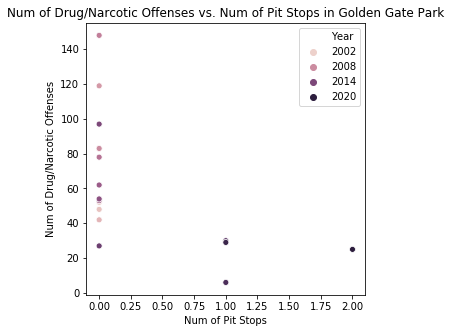

In [445]:
#Plot Num of Pit Stops vs Num of Drug/Narcotic Offenses because it is a statistically significant negative correlation
fig = plt.figure(figsize=(5,5))
drug_scatter = sns.scatterplot(data = ggpark_incidents_df, x = 'Num of Pit Stops', 
                                    y = 'Num of Drug/Narcotic Offenses', hue = 'Year')
plt.legend(bbox_to_anchor=(1, 1))
drug_scatter.set_title('Num of Drug/Narcotic Offenses vs. Num of Pit Stops in Golden Gate Park')

#### Haight Ashbury

In [32]:
#Make a dataframe that includes only Haight Ashbury
haight_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Haight Ashbury']

In [33]:
#Change the neighborhood name to a float (5) because Mann-Kendall test does not allow strings to be passed into it
haight_incidents_df = haight_incidents_df.replace(to_replace = {'Neighborhood': {'Haight Ashbury': float(5)}})

In [34]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
haight_incidents_df = haight_incidents_df.drop(['Location Coordinates'], axis = 1)
haight_incidents_df = haight_incidents_df.drop(['Latitude'], axis = 1)
haight_incidents_df = haight_incidents_df.drop(['Longitude'], axis = 1)
haight_incidents_df = haight_incidents_df.drop(['Location ID'], axis = 1)

In [35]:
#Drop row that includes 2020 data because it may skew the results of the correlation
haight_incidents_df = haight_incidents_df[haight_incidents_df['Year'] != 2020.0]
haight_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
5            5.0  2003.0                  1088.0             65.0   
17           5.0  2004.0                  1192.0             85.0   
29           5.0  2005.0                  1192.0             84.0   
41           5.0  2006.0                  1122.0             80.0   
53           5.0  2007.0                  1101.0             69.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
5                56.0                                17.0   
17               89.0                                21.0   
29               69.0                                18.0   
41               88.0                                16.0   
53               40.0                                15.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
5                            82.0                   19.0   
17                           76.0                   29.0   
29                           75.0                   21.0   
41                           78.0                   26.0   
53                          136.0                    9.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
5                           215.0                                 0.0   
17                          177.0                                 0.0   
29                          154.0                                 0.0   
41                          185.0                                 0.0   
53                          161.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
5         ...                     22.0                   34.0   
17        ...                     25.0                   27.0   
29        ...                     22.0                   41.0   
41        ...                     23.0                   31.0   
53        ...                     23.0                   31.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
5                        47.0             52.0                     11.0   
17                       65.0             93.0                      7.0   
29                       71.0             81.0                     10.0   
41                       62.0             71.0                     16.0   
53                       60.0             72.0                     14.0   

    Num of Severity Category 0  Num of Severity Category 1  \
5                        534.0                       271.0   
17                       571.0                       286.0   
29                       549.0                       291.0   
41                       477.0                       288.0   
53                       367.0                       328.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
5                         25.0                       258.0               0.0  
17                        30.0                       305.0               0.0  
29                        28.0                       324.0               0.0  
41                        30.0                       327.0               0.0  
53                        36.0                       370.0               0.0  

[5 rows x 23 columns]

In [36]:
#Perform Mann-Kendall test
mk.seasonal_test(haight_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=1.2754686196103648e-10, z=6.430067982836887, Tau=0.22762148337595908, s=712.0, var_s=12226.666666666668, slope=0.6666666666666666, intercept=59.34782608695652)

We see that the overall trend in incidents in Haight Ashbury is increasing, and that the trend is statistically significant (p-value < 0.05).

In [199]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                                haight_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                         haight_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                         haight_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                         haight_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                     haight_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                      haight_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                         haight_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                         haight_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                     haight_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                       haight_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(haight_incidents_df['Num of Pit Stops'], 
                                        haight_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.2543248114229129, 0.3245946157595386)
Correlation between Num of Pit Stops and Num of Assaults: (0.24541325471376044, 0.34240656480242576)
Correlation between Num of Pit Stops and Num of Burglaries: (0.11949095763587544, 0.647822258180265)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.11400556859548998, 0.6630702531512122)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.4636620905398207, 0.0608439694397208)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.5039098971092316, 0.03916823218872881)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.6261157391766888, 0.007169727914629286)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.6582746677359186, 0.004066677303752953)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.34657811234967834, 0.172938771509504)
Correlation 

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 9
positive correlation, statistically significant: 4
negative correlation, not statistically significant: 6
negative correlation, statistically significant: 1 (Vandalism)

Text(0.5,1,'Num of Vandalism Offenses vs. Num of Pit Stops in Haight Ashbury')

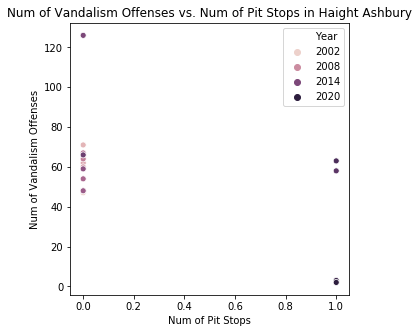

In [665]:
#Plot Num of Pit Stops vs Num of Vandalism Offenses because it is a statistically significant negative correlation
fig = plt.figure(figsize=(5,5))
vand_scatter = sns.scatterplot(data = haight_incidents_df, x = 'Num of Pit Stops', 
                               y = 'Num of Vandalism Offenses', hue = 'Year')
plt.legend(bbox_to_anchor=(1, 1))
vand_scatter.set_title('Num of Vandalism Offenses vs. Num of Pit Stops in Haight Ashbury')

#### Mission

In [37]:
#Make a dataframe that includes only Mission
mission_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Mission']

In [38]:
#Change the neighborhood name to a float (6) because Mann-Kendall test does not allow strings to be passed into it
mission_incidents_df = mission_incidents_df.replace(to_replace = {'Neighborhood': {'Mission': float(6)}})

In [39]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
mission_incidents_df = mission_incidents_df.drop(['Location Coordinates'], axis = 1)
mission_incidents_df = mission_incidents_df.drop(['Latitude'], axis = 1)
mission_incidents_df = mission_incidents_df.drop(['Longitude'], axis = 1)
mission_incidents_df = mission_incidents_df.drop(['Location ID'], axis = 1)

In [40]:
#Drop row that includes 2020 data because it may skew the results of the correlation
mission_incidents_df = mission_incidents_df[mission_incidents_df['Year'] != 2020.0]
mission_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
7            6.0  2003.0                  8136.0            664.0   
19           6.0  2004.0                  8014.0            693.0   
31           6.0  2005.0                  7515.0            638.0   
43           6.0  2006.0                  7027.0            676.0   
55           6.0  2007.0                  7195.0            669.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
7               206.0                                82.0   
19              207.0                               106.0   
31              246.0                                70.0   
43              213.0                                64.0   
55              198.0                                79.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
7                           915.0                  115.0   
19                          830.0                  102.0   
31                          664.0                   94.0   
43                          756.0                  118.0   
55                          680.0                   79.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
7                          1007.0                                 0.0   
19                         1006.0                                 0.0   
31                          964.0                                 0.0   
43                          940.0                                 0.0   
55                          893.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
7         ...                    188.0                  176.0   
19        ...                    192.0                  206.0   
31        ...                    197.0                  187.0   
43        ...                    234.0                  177.0   
55        ...                    229.0                  210.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
7                       265.0            567.0                     60.0   
19                      315.0            534.0                     65.0   
31                      291.0            454.0                     82.0   
43                      305.0            410.0                     88.0   
55                      325.0            487.0                     73.0   

    Num of Severity Category 0  Num of Severity Category 1  \
7                       2861.0                      2270.0   
19                      2929.0                      2173.0   
31                      2993.0                      1888.0   
43                      2484.0                      2090.0   
55                      2422.0                      2275.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
7                         91.0                      2914.0               0.0  
19                       112.0                      2800.0               0.0  
31                       134.0                      2500.0               0.0  
43                       155.0                      2298.0               0.0  
55                       153.0                      2345.0               0.0  

[5 rows x 23 columns]

In [41]:
#Perform Mann-Kendall test
mk.seasonal_test(mission_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.050504380504021, Tau=0.32161125319693096, s=1006.0, var_s=12330.66666666667, slope=3.5, intercept=336.32608695652175)

We see that the overall trend in incidents in Mission is increasing, and that the trend is statistically significant (p-value < 0.05).

In [217]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                                mission_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                         mission_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                         mission_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                         mission_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                     mission_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                      mission_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                         mission_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                         mission_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                     mission_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                       mission_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(mission_incidents_df['Num of Pit Stops'], 
                                        mission_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.5316677096392551, 0.028055945057260997)
Correlation between Num of Pit Stops and Num of Assaults: (0.4802931687792689, 0.05101628291976587)
Correlation between Num of Pit Stops and Num of Burglaries: (0.5382665364097724, 0.02581435481266978)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6577471843549967, 0.004106797213217886)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.4357178864091615, 0.08041855130452007)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.5105367610241195, 0.03625429439107816)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.7251265660075465, 0.000988768405295912)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.7294994330846357, 0.0008891457590818839)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.38961548052526823, 0.1221285985580637)
Correl

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 7
positive correlation, statistically significant: 10
negative correlation, not statistically significant: 2
negative correlation, statistically significant: 0

#### North Beach

In [42]:
#Make a dataframe that includes only North Beach
nbeach_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'North Beach']

In [43]:
#Change the neighborhood name to a float (7) because Mann-Kendall test does not allow strings to be passed into it
nbeach_incidents_df = nbeach_incidents_df.replace(to_replace = {'Neighborhood': {'North Beach': float(7)}})

In [44]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
nbeach_incidents_df = nbeach_incidents_df.drop(['Location Coordinates'], axis = 1)
nbeach_incidents_df = nbeach_incidents_df.drop(['Latitude'], axis = 1)
nbeach_incidents_df = nbeach_incidents_df.drop(['Longitude'], axis = 1)
nbeach_incidents_df = nbeach_incidents_df.drop(['Location ID'], axis = 1)

In [45]:
#Drop row that includes 2020 data because it may skew the results of the correlation
nbeach_incidents_df = nbeach_incidents_df[nbeach_incidents_df['Year'] != 2020.0]
nbeach_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
8            7.0  2003.0                  1343.0            104.0   
20           7.0  2004.0                  1353.0            107.0   
32           7.0  2005.0                  1324.0            105.0   
44           7.0  2006.0                  1411.0            123.0   
56           7.0  2007.0                  1343.0            124.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
8                57.0                                13.0   
20               78.0                                25.0   
32               63.0                                 8.0   
44               71.0                                 9.0   
56               47.0                                13.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
8                            27.0                   50.0   
20                           28.0                   34.0   
32                            9.0                   27.0   
44                           18.0                   20.0   
56                           15.0                   33.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
8                           365.0                                 0.0   
20                          363.0                                 0.0   
32                          389.0                                 0.0   
44                          441.0                                 0.0   
56                          463.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
8         ...                     18.0                   42.0   
20        ...                     22.0                   25.0   
32        ...                     38.0                   26.0   
44        ...                     29.0                   41.0   
56        ...                     26.0                   36.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
8                        49.0             72.0                      9.0   
20                       75.0             65.0                      8.0   
32                       76.0             35.0                     17.0   
44                       87.0             47.0                     15.0   
56                       87.0             43.0                     13.0   

    Num of Severity Category 0  Num of Severity Category 1  \
8                        675.0                       274.0   
20                       692.0                       273.0   
32                       738.0                       219.0   
44                       748.0                       276.0   
56                       737.0                       271.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
8                          9.0                       385.0               0.0  
20                        11.0                       377.0               0.0  
32                        16.0                       351.0               0.0  
44                        14.0                       373.0               0.0  
56                        11.0                       324.0               0.0  

[5 rows x 23 columns]

In [47]:
#Perform Mann-Kendall test
mk.seasonal_test(nbeach_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.831331434124884, Tau=0.34494884910485935, s=1079.0, var_s=12023.000000000004, slope=1.0, intercept=48.52173913043478)

We see that the overall trend in incidents in North Beach is increasing, and that the trend is statistically significant (p-value < 0.05).

In [225]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                                nbeach_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                         nbeach_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                         nbeach_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                         nbeach_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                     nbeach_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                      nbeach_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                         nbeach_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                         nbeach_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                     nbeach_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                       nbeach_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(nbeach_incidents_df['Num of Pit Stops'], 
                                        nbeach_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.4993855440655239, 0.041257556956189496)
Correlation between Num of Pit Stops and Num of Assaults: (0.28530445089363676, 0.26699449907415734)
Correlation between Num of Pit Stops and Num of Burglaries: (0.32024606243291154, 0.21014778761810227)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6120899109122698, 0.009013270672968362)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (0.23700765227142603, 0.3597087094139384)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.5768626073542307, 0.015337556678669153)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.5275152578896156, 0.029541555770186564)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.6085920293766581, 0.009527314400062615)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.3461538461538462, 0.17350062979779782)
Corre

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 9 
positive correlation, statistically significant: 10
negative correlation, not statistically significant: 1
negative correlation, statistically significant: 0 

#### South of Market

In [48]:
#Make a dataframe that includes only South of Market
som_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'South of Market']

In [49]:
#Change the neighborhood name to a float (8) because Mann-Kendall test does not allow strings to be passed into it
som_incidents_df = som_incidents_df.replace(to_replace = {'Neighborhood': {'South of Market': float(8)}})

In [50]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
som_incidents_df = som_incidents_df.drop(['Location Coordinates'], axis = 1)
som_incidents_df = som_incidents_df.drop(['Latitude'], axis = 1)
som_incidents_df = som_incidents_df.drop(['Longitude'], axis = 1)
som_incidents_df = som_incidents_df.drop(['Location ID'], axis = 1)

In [51]:
#Drop row that includes 2020 data because it may skew the results of the correlation
som_incidents_df = som_incidents_df[som_incidents_df['Year'] != 2020.0]
som_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
9            8.0  2003.0                  7150.0            531.0   
21           8.0  2004.0                  6962.0            539.0   
33           8.0  2005.0                  6921.0            544.0   
45           8.0  2006.0                  6866.0            560.0   
57           8.0  2007.0                  7152.0            582.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
9               149.0                                46.0   
21              191.0                                29.0   
33              190.0                                18.0   
45              193.0                                19.0   
57              188.0                                20.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
9                           649.0                  196.0   
21                          530.0                  134.0   
33                          393.0                  139.0   
45                          368.0                  125.0   
57                          542.0                  158.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
9                          1593.0                                 0.0   
21                         1642.0                                 0.0   
33                         1694.0                                 0.0   
45                         1854.0                                 0.0   
57                         1733.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
9         ...                    116.0                  154.0   
21        ...                    140.0                  145.0   
33        ...                    204.0                  208.0   
45        ...                    188.0                  217.0   
57        ...                    198.0                  236.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
9                       225.0            634.0                     40.0   
21                      230.0            507.0                     47.0   
33                      258.0            426.0                     51.0   
45                      308.0            398.0                     35.0   
57                      323.0            454.0                     52.0   

    Num of Severity Category 0  Num of Severity Category 1  \
9                       2825.0                      1715.0   
21                      2984.0                      1472.0   
33                      3092.0                      1388.0   
45                      3070.0                      1467.0   
57                      2959.0                      1725.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
9                         60.0                      2550.0               0.0  
21                        70.0                      2436.0               0.0  
33                        90.0                      2351.0               0.0  
45                       105.0                      2224.0               0.0  
57                       132.0                      2336.0               0.0  

[5 rows x 23 columns]

In [52]:
#Perform Mann-Kendall test
mk.seasonal_test(som_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.187948949492647, Tau=0.3618925831202046, s=1132.0, var_s=12324.000000000002, slope=4.183333333333334, intercept=287.5326086956522)

We see that the overall trend in incidents in South of Market is increasing, and that the trend is statistically significant (p-value < 0.05).

In [233]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                                som_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                         som_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                         som_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                         som_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                     som_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                      som_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                         som_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                         som_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                     som_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                       som_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(som_incidents_df['Num of Pit Stops'], 
                                        som_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.31906869404416943, 0.21192358289989116)
Correlation between Num of Pit Stops and Num of Assaults: (0.3772609851325998, 0.1354853817418317)
Correlation between Num of Pit Stops and Num of Burglaries: (0.49813097735381295, 0.041851589397225136)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.6402314811773684, 0.00563278440326924)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.2500252155482119, 0.333119760862947)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.21679097992155397, 0.4032813612920978)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.29712557538294154, 0.24679934053341013)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.6324519656360645, 0.006442903909660574)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.3672069946863005, 0.14707532444324142)
Correlati

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 12
positive correlation, statistically significant: 5
negative correlation, not statistically significant: 3
negative correlation, statistically significant: 0

#### Sunset/Parkside

In [53]:
#Make a dataframe that includes only Sunset/Parkside
sun_park_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Sunset/Parkside']

In [54]:
#Change the neighborhood name to a float (9) because Mann-Kendall test does not allow strings to be passed into it
sun_park_incidents_df = sun_park_incidents_df.replace(to_replace = {'Neighborhood': {'Sunset/Parkside': float(9)}})

In [55]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
sun_park_incidents_df = sun_park_incidents_df.drop(['Location Coordinates'], axis = 1)
sun_park_incidents_df = sun_park_incidents_df.drop(['Latitude'], axis = 1)
sun_park_incidents_df = sun_park_incidents_df.drop(['Longitude'], axis = 1)
sun_park_incidents_df = sun_park_incidents_df.drop(['Location ID'], axis = 1)

In [56]:
#Drop row that includes 2020 data because it may skew the results of the correlation
sun_park_incidents_df = sun_park_incidents_df[sun_park_incidents_df['Year'] != 2020.0]
sun_park_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
10           9.0  2003.0                  1770.0            161.0   
22           9.0  2004.0                  2102.0            168.0   
34           9.0  2005.0                  2014.0            148.0   
46           9.0  2006.0                  1746.0            169.0   
58           9.0  2007.0                  1671.0            174.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
10              104.0                                 6.0   
22              119.0                                 6.0   
34              114.0                                 9.0   
46               94.0                                12.0   
58               70.0                                12.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
10                           23.0                   58.0   
22                           22.0                   50.0   
34                           22.0                   54.0   
46                           29.0                   50.0   
58                           29.0                   32.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
10                          249.0                                 0.0   
22                          240.0                                 0.0   
34                          212.0                                 0.0   
46                          257.0                                 0.0   
58                          268.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
10        ...                     34.0                   82.0   
22        ...                     39.0                   92.0   
34        ...                     27.0                  135.0   
46        ...                     50.0                   84.0   
58        ...                     42.0                   81.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
10                      134.0             40.0                     14.0   
22                      149.0             44.0                      9.0   
34                      167.0             51.0                     11.0   
46                      173.0             33.0                     21.0   
58                      174.0             32.0                     18.0   

    Num of Severity Category 0  Num of Severity Category 1  \
10                       865.0                       399.0   
22                      1137.0                       424.0   
34                       986.0                       519.0   
46                       807.0                       472.0   
58                       747.0                       475.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
10                        43.0                       463.0               0.0  
22                        44.0                       497.0               0.0  
34                        23.0                       486.0               0.0  
46                        68.0                       399.0               0.0  
58                        52.0                       397.0               0.0  

[5 rows x 23 columns]

In [57]:
#Perform Mann-Kendall test
mk.seasonal_test(sun_park_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=4.1354430990736546e-10, z=6.248827906739342, Tau=0.21930946291560102, s=686.0, var_s=12016.666666666668, slope=1.0, intercept=89.52173913043478)

We see that the overall trend in incidents in Sunset/Parkside is increasing, and that the trend is statistically significant (p-value < 0.05).

In [242]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                                sun_park_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                         sun_park_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                         sun_park_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                         sun_park_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                     sun_park_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                      sun_park_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                         sun_park_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                         sun_park_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                     sun_park_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                       sun_park_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(sun_park_incidents_df['Num of Pit Stops'], 
                                        sun_park_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.4422120404893727, 0.0755088319430995)
Correlation between Num of Pit Stops and Num of Assaults: (0.08903438645238733, 0.733997953668043)
Correlation between Num of Pit Stops and Num of Burglaries: (0.2569643149596294, 0.31942473315503184)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.5247499444794482, 0.030563963877603205)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.10098634226315009, 0.6997556338215116)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.6426900533143822, 0.0053945861070779245)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.624777876246391, 0.0073312862318961145)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.6831850076201176, 0.0025027020703237437)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.2088235906008441, 0.4211971096342061)
Correlat

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 10
positive correlation, statistically significant: 7
negative correlation, not statistically significant: 2 
negative correlation, statistically significant: 1 (Vandalism)

Text(0.5,1,'Num of Vandalism Offenses vs. Num of Pit Stops in Sunset/Parkside')

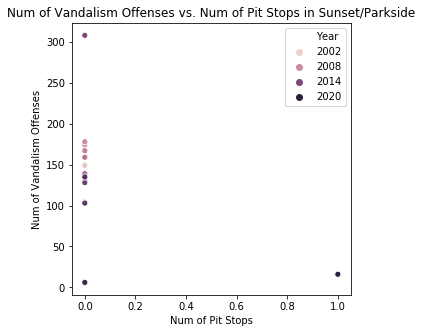

In [666]:
#Plot Num of Pit Stops vs Num of Vandalism Offenses because it is a statistically significant negative correlation
fig = plt.figure(figsize=(5,5))
vand_scatter = sns.scatterplot(data = sun_park_incidents_df, x = 'Num of Pit Stops', 
                               y = 'Num of Vandalism Offenses', hue = 'Year')
plt.legend(bbox_to_anchor=(1, 1))
vand_scatter.set_title('Num of Vandalism Offenses vs. Num of Pit Stops in Sunset/Parkside')

#### Tenderloin

In [58]:
#Make a dataframe that includes only Tenderloin
tenderloin_incidents_df = neighborhood_incident_counter_df[neighborhood_incident_counter_df['Neighborhood'] == 'Tenderloin']

In [59]:
#Change the neighborhood name to a float (10) because Mann-Kendall test does not allow strings to be passed into it
tenderloin_incidents_df = tenderloin_incidents_df.replace(to_replace = {'Neighborhood': {'Tenderloin': float(10)}})

In [60]:
#Drop Location Coordinates, Latitude, Longitude, and Location ID columns
tenderloin_incidents_df = tenderloin_incidents_df.drop(['Location Coordinates'], axis = 1)
tenderloin_incidents_df = tenderloin_incidents_df.drop(['Latitude'], axis = 1)
tenderloin_incidents_df = tenderloin_incidents_df.drop(['Longitude'], axis = 1)
tenderloin_incidents_df = tenderloin_incidents_df.drop(['Location ID'], axis = 1)

In [61]:
#Drop row that includes 2020 data because it may skew the results of the correlation
tenderloin_incidents_df = tenderloin_incidents_df[tenderloin_incidents_df['Year'] != 2020.0]
tenderloin_incidents_df.head()

Neighborhood    Year  Num of Total Incidents  Num of Assaults  \
11          10.0  2003.0                  7645.0            760.0   
23          10.0  2004.0                  7384.0            710.0   
35          10.0  2005.0                  7153.0            744.0   
47          10.0  2006.0                  7276.0            813.0   
59          10.0  2007.0                  8679.0            876.0   

    Num of Burglaries  Num of Disorderly Conduct Offenses  \
11              126.0                                27.0   
23              163.0                                24.0   
35              146.0                                26.0   
47              175.0                                15.0   
59              112.0                                21.0   

    Num of Drug/Narcotic Offenses  Num of Fraud Offenses  \
11                         1440.0                  120.0   
23                         1545.0                  105.0   
35                         1574.0                   79.0   
47                         1530.0                   83.0   
59                         2123.0                  120.0   

    Num of Larceny/Theft Offenses  Num of Malicious Mischief Offenses  \
11                          802.0                                 0.0   
23                          750.0                                 0.0   
35                          848.0                                 0.0   
47                          912.0                                 0.0   
59                         1027.0                                 0.0   

          ...         Num of Robberies  Num of Suspicious Occ  \
11        ...                    181.0                  171.0   
23        ...                    222.0                  182.0   
35        ...                    208.0                  196.0   
47        ...                    225.0                  207.0   
59        ...                    235.0                  231.0   

    Num of Vandalism Offenses  Num of Warrants  Num of Weapons Offenses  \
11                      177.0            869.0                     73.0   
23                      160.0            733.0                     60.0   
35                      155.0            647.0                     80.0   
47                      192.0            648.0                     65.0   
59                      193.0            767.0                     71.0   

    Num of Severity Category 0  Num of Severity Category 1  \
11                      2183.0                      2712.0   
23                      2149.0                      2559.0   
35                      2280.0                      2482.0   
47                      2322.0                      2459.0   
59                      2441.0                      3297.0   

    Num of Severity Category 2  Num of Severity Category 3  Num of Pit Stops  
11                        48.0                      2702.0               0.0  
23                        70.0                      2606.0               0.0  
35                        65.0                      2326.0               0.0  
47                        77.0                      2418.0               0.0  
59                        88.0                      2853.0               0.0  

[5 rows x 23 columns]

In [62]:
#Perform Mann-Kendall test
mk.seasonal_test(tenderloin_incidents_df, period = 18)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.649864442005999, Tau=0.3436700767263427, s=1075.0, var_s=12387.000000000004, slope=3.7817460317460316, intercept=265.93737060041406)

We see that the overall trend in incidents in Tenderloin is increasing, and that the trend is statistically significant (p-value < 0.05).

In [250]:
#Calculate Pearson's correlation between Num of Pit Stops and each Incident Category
total_incidents_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                                tenderloin_incidents_df['Num of Total Incidents'])
print('Correlation between Num of Pit Stops and Num of Total Incidents:', total_incidents_pitstops_correlation)
assaults_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                         tenderloin_incidents_df['Num of Assaults'])
print('Correlation between Num of Pit Stops and Num of Assaults:', assaults_pitstops_correlation)
burglary_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                         tenderloin_incidents_df['Num of Burglaries'])
print('Correlation between Num of Pit Stops and Num of Burglaries:', burglary_pitstops_correlation)
dis_cond_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                         tenderloin_incidents_df['Num of Disorderly Conduct Offenses'])
print('Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses:', dis_cond_pitstops_correlation)
drug_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                     tenderloin_incidents_df['Num of Drug/Narcotic Offenses'])
print('Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses:', drug_pitstops_correlation)
fraud_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                      tenderloin_incidents_df['Num of Fraud Offenses'])
print('Correlation between Num of Pit Stops and Num of Fraud Offenses:', fraud_pitstops_correlation)
larceny_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Larceny/Theft Offenses'])
print('Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses:', larceny_pitstops_correlation)
mischief_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                         tenderloin_incidents_df['Num of Malicious Mischief Offenses'])
print('Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses:', mischief_pitstops_correlation)
missing_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Number of Missing Persons'])
print('Correlation between Num of Pit Stops and Num of Missing Persons:', missing_pitstops_correlation)
mv_theft_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                         tenderloin_incidents_df['Num of Motor Vehicle Thefts'])
print('Correlation between Num of Pit Stops and Num of Motor Vehicle Thefts:', mv_theft_pitstops_correlation)
noncrim_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Non-Criminal Offenses'])
print('Correlation between Num of Pit Stops and Num of Non-Criminal Offenses:', noncrim_pitstops_correlation)
robbery_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Robberies'])
print('Correlation between Num of Pit Stops and Num of Robberies:', robbery_pitstops_correlation)
sus_occ_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Suspicious Occ'])
print('Correlation between Num of Pit Stops and Num of Suspicious Occ Offenses:', sus_occ_pitstops_correlation)
vand_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                     tenderloin_incidents_df['Num of Vandalism Offenses'])
print('Correlation between Num of Pit Stops and Num of Vandalism Offenses:', vand_pitstops_correlation)
warrant_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Warrants'])
print('Correlation between Num of Pit Stops and Num of Warrants:', warrant_pitstops_correlation)
weapon_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                       tenderloin_incidents_df['Num of Weapons Offenses'])
print('Correlation between Num of Pit Stops and Num of Weapons Offenses:', weapon_pitstops_correlation)
sevcat0_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Severity Category 0'])
print("Correlation between Num of Pit Stops and Num of Severity Category 0's:", sevcat0_pitstops_correlation)
sevcat1_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Severity Category 1'])
print("Correlation between Num of Pit Stops and Num of Severity Category 1's:", sevcat1_pitstops_correlation)
sevcat2_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Severity Category 2'])
print("Correlation between Num of Pit Stops and Num of Severity Category 2's:", sevcat2_pitstops_correlation)
sevcat3_pitstops_correlation = pearsonr(tenderloin_incidents_df['Num of Pit Stops'], 
                                        tenderloin_incidents_df['Num of Severity Category 3'])
print("Correlation between Num of Pit Stops and Num of Severity Category 3's:", sevcat3_pitstops_correlation)

Correlation between Num of Pit Stops and Num of Total Incidents: (0.4480191022445105, 0.07130728238020126)
Correlation between Num of Pit Stops and Num of Assaults: (0.38428939887704355, 0.12776861343665588)
Correlation between Num of Pit Stops and Num of Burglaries: (0.5144668504024709, 0.03460606548140484)
Correlation between Num of Pit Stops and Num of Disorderly Conduct Offenses: (0.4303778735987941, 0.08462633917808361)
Correlation between Num of Pit Stops and Num of Drug/Narcotic Offenses: (-0.36142559184543627, 0.15403849701066458)
Correlation between Num of Pit Stops and Num of Fraud Offenses: (0.5390408472858311, 0.025560689899179413)
Correlation between Num of Pit Stops and Num of Larceny/Theft Offenses: (0.7595261167725397, 0.0004049301015556003)
Correlation between Num of Pit Stops and Num of Malicious Mischief Offenses: (0.7069052247797732, 0.0015085539976613127)
Correlation between Num of Pit Stops and Num of Missing Persons: (0.7444912850059265, 0.0006083067649451635)
Co

We see that the correlation between number of pit stops and many incident categories is a positive correlation.
positive correlation, not statistically significant: 10
positive correlation, statistically significant: 8
negative correlation, not statistically significant: 2
negative correlation, statistically significant: 0